# Telecom Customer Churn Prediction

## Business Context:
A leading telecom provider wants to reduce customer churn by identifying high - value customers at risk of leaving. The company has historical data covering four months of customer usage behaviour, including call details, internet usage, and recharge history.

Customer churn is defined a suser who stops using the service in the last month. The goal is to develop a machine learning model that can predict whether a high-value customer will churn in the upcoming month baed on usage patterns.

## Business Objectives:
- Predict churn in advance to take preventive actions like offering discounts or personalized plans.
- Identify Key drivers of churn to improve customer relations strategies.
- Minimize revenue loss by targeting high-value customers who are likely to leave.

## Data Dictionary:

| **Acronyms**      | **Descriptions**  |
|------------------|------------------|
| **MOBILE_NUMBER** | Customer phone number  |
| **CIRCLE_ID** | Telecom circle area to which the customer belongs to  |
| **LOC** | Local calls - within same telecom circle  |
| **STD** | STD calls - outside the calling circle  |
| **IC** | Incoming calls  |
| **OG** | Outgoing calls  |
| **T2T** | Operator T to T, i.e., within same operator (mobile to mobile)  |
| **T2M** | Operator T to other operator mobile  |
| **T2O** | Operator T to other operator fixed line  |
| **T2F** | Operator T to fixed lines of T  |
| **T2C** | Operator T to its own call center  |
| **ARPU** | Average revenue per user  |
| **MOU** | Minutes of usage - voice calls  |
| **AON** | Age on network - number of days the customer is using the operator T network  |
| **ONNET** | All kinds of calls within the same operator network  |
| **OFFNET** | All kinds of calls outside the operator T network  |
| **ROAM** | Indicates that customer is in roaming zone during the call  |
| **SPL** | Special calls  |
| **ISD** | ISD calls  |
| **RECH** | Recharge  |
| **NUM** | Number  |
| **AMT** | Amount in local currency  |
| **MAX** | Maximum  |
| **DATA** | Mobile internet  |
| **3G** | 3G network  |
| **AV** | Average  |
| **VOL** | Mobile internet usage volume (in MB)  |
| **2G** | 2G network  |
| **PCK** | Prepaid service schemes called - PACKS  |
| **NIGHT** | Scheme to use during specific night hours only  |
| **MONTHLY** | Service schemes with validity equivalent to a month  |
| **SACHET** | Service schemes with validity smaller than a month  |
| **\*.6** | KPI for the month of June  |
| **\*.7** | KPI for the month of July  |
| **\*.8** | KPI for the month of August  |
| **\*.9** | KPI for the month of September  |
| **FB_USER** | Service scheme to avail services of Facebook and similar social networking sites  |
| **VBC** | Volume-based cost - when no specific scheme is purchased and paid as per usage |

## Technical Goals
- **Data Preprocessing:** Clean the dataset, handle missing values, filter high-value customers.
- **Feature Engineering:** Remove churn-phase attributes, derive new insights from usage behavior.
- **Class Imbalance Handling:** Use techniques like SMOTE, undersampling or weighted models.
- **Model Building & Selection:** Train different ML models (Logistic Regression, Decision Trees, Boosting models, etc.)
- **Model Evaluation:** Use Precision, Recall, F1-score and ROC-AUC to measure performance.
- **Insights & Recommendations:** Provide business recommendation based on feature importance analysis.

## Expected Outcomes:
A deployable ML model that accurately predicts churn, helps optimize customer retention strategies, and reduces revenue loss for the telecom company.

## Data Analysis:

In [1]:
# Import necessary Libraries for Data Analysis
import pandas as pd
import datetime
import scipy.stats as stats
import pickle

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, precision_recall_curve, roc_curve
from sklearn.model_selection import train_test_split, RandomizedSearchCV,GridSearchCV, StratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler, PowerTransformer
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read the Dataset
df = pd.read_csv("../data/raw/telecom_churn_data.csv")
df.head(10)

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   
5     7000286308        109             0.0             0.0             0.0   
6     7001051193        109             0.0             0.0             0.0   
7     7000701601        109             0.0             0.0             0.0   
8     7001524846        109             0.0             0.0             0.0   
9     7001864400        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   
5            6/30/2014            7/31/2014            8/31/2014   
6            6/30/2014            7/31/2014            8/31/2014   
7            6/30/2014            7/31/2014            8/31/2014   
8            6/30/2014            7/31/2014            8/31/2014   
9            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9    arpu_6  ...  sachet_3g_9  fb_user_6  fb_user_7  \
0            9/30/2014   197.385  ...            0        1.0        1.0   
1            9/30/2014    34.047  ...            0        NaN        1.0   
2            9/30/2014   167.690  ...            0        NaN        NaN   
3            9/30/2014   221.338  ...            0        NaN        NaN   
4            9/30/2014   261.636  ...            0        0.0        NaN   
5            9/30/2014    50.258  ...            0        NaN        NaN   
6            9/30/2014   429.023  ...            0        NaN        NaN   
7            9/30/2014  1069.180  ...            0        NaN        NaN   
8            9/30/2014   378.721  ...            0        NaN        1.0   
9            9/30/2014   119.518  ...            0        NaN        1.0   

   fb_user_8  fb_user_9   aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  sep_vbc_3g  
0        1.0        NaN   968       30.40        0.00      101.20        3.58  
1        1.0        NaN  1006        0.00        0.00        0.00        0.00  
2        NaN        1.0  1103        0.00        0.00        4.17        0.00  
3        NaN        NaN  2491        0.00        0.00        0.00        0.00  
4        NaN        NaN  1526        0.00        0.00        0.00        0.00  
5        NaN        NaN  1471        0.00        0.00        0.00        0.00  
6        NaN        NaN  1673        0.00        0.00        0.00        0.00  
7        NaN        NaN   802       57.74       19.38       18.74        0.00  
8        1.0        NaN   315       21.03      910.65      122.16        0.00  
9        NaN        NaN   902        0.00        0.00        0.00        0.00  

[10 rows x 226 columns]

In [3]:
print(df.columns)

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6',
       ...
       'sachet_3g_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'],
      dtype='object', length=226)


In [4]:
for col in df.columns:
    print(col)

mobile_number
circle_id
loc_og_t2o_mou
std_og_t2o_mou
loc_ic_t2o_mou
last_date_of_month_6
last_date_of_month_7
last_date_of_month_8
last_date_of_month_9
arpu_6
arpu_7
arpu_8
arpu_9
onnet_mou_6
onnet_mou_7
onnet_mou_8
onnet_mou_9
offnet_mou_6
offnet_mou_7
offnet_mou_8
offnet_mou_9
roam_ic_mou_6
roam_ic_mou_7
roam_ic_mou_8
roam_ic_mou_9
roam_og_mou_6
roam_og_mou_7
roam_og_mou_8
roam_og_mou_9
loc_og_t2t_mou_6
loc_og_t2t_mou_7
loc_og_t2t_mou_8
loc_og_t2t_mou_9
loc_og_t2m_mou_6
loc_og_t2m_mou_7
loc_og_t2m_mou_8
loc_og_t2m_mou_9
loc_og_t2f_mou_6
loc_og_t2f_mou_7
loc_og_t2f_mou_8
loc_og_t2f_mou_9
loc_og_t2c_mou_6
loc_og_t2c_mou_7
loc_og_t2c_mou_8
loc_og_t2c_mou_9
loc_og_mou_6
loc_og_mou_7
loc_og_mou_8
loc_og_mou_9
std_og_t2t_mou_6
std_og_t2t_mou_7
std_og_t2t_mou_8
std_og_t2t_mou_9
std_og_t2m_mou_6
std_og_t2m_mou_7
std_og_t2m_mou_8
std_og_t2m_mou_9
std_og_t2f_mou_6
std_og_t2f_mou_7
std_og_t2f_mou_8
std_og_t2f_mou_9
std_og_t2c_mou_6
std_og_t2c_mou_7
std_og_t2c_mou_8
std_og_t2c_mou_9
std_og_mou_

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


## Insights

large Dataset with around 99999 and around 226 columns.

In [6]:
# Check for Duplicate Records
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
99994    False
99995    False
99996    False
99997    False
99998    False
Length: 99999, dtype: bool

In [7]:
# Drop Duplicates if available
df.drop_duplicates(inplace=True)

In [8]:
df.shape

(99999, 226)

In [9]:
# Dropping Irrelevant Columns
df.drop(columns=["mobile_number", "circle_id"], inplace=True)
df.head(10)

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou last_date_of_month_6  \
0             0.0             0.0             0.0            6/30/2014   
1             0.0             0.0             0.0            6/30/2014   
2             0.0             0.0             0.0            6/30/2014   
3             0.0             0.0             0.0            6/30/2014   
4             0.0             0.0             0.0            6/30/2014   
5             0.0             0.0             0.0            6/30/2014   
6             0.0             0.0             0.0            6/30/2014   
7             0.0             0.0             0.0            6/30/2014   
8             0.0             0.0             0.0            6/30/2014   
9             0.0             0.0             0.0            6/30/2014   

  last_date_of_month_7 last_date_of_month_8 last_date_of_month_9    arpu_6  \
0            7/31/2014            8/31/2014            9/30/2014   197.385   
1            7/31/2014            8/31/2014            9/30/2014    34.047   
2            7/31/2014            8/31/2014            9/30/2014   167.690   
3            7/31/2014            8/31/2014            9/30/2014   221.338   
4            7/31/2014            8/31/2014            9/30/2014   261.636   
5            7/31/2014            8/31/2014            9/30/2014    50.258   
6            7/31/2014            8/31/2014            9/30/2014   429.023   
7            7/31/2014            8/31/2014            9/30/2014  1069.180   
8            7/31/2014            8/31/2014            9/30/2014   378.721   
9            7/31/2014            8/31/2014            9/30/2014   119.518   

     arpu_7    arpu_8  ...  sachet_3g_9  fb_user_6  fb_user_7  fb_user_8  \
0   214.816   213.803  ...            0        1.0        1.0        1.0   
1   355.074   268.321  ...            0        NaN        1.0        1.0   
2   189.058   210.226  ...            0        NaN        NaN        NaN   
3   251.102   508.054  ...            0        NaN        NaN        NaN   
4   309.876   238.174  ...            0        0.0        NaN        NaN   
5    58.810    83.386  ...            0        NaN        NaN        NaN   
6   190.704   255.114  ...            0        NaN        NaN        NaN   
7  1349.850  3171.480  ...            0        NaN        NaN        NaN   
8   492.223   137.362  ...            0        NaN        1.0        1.0   
9   247.435   170.231  ...            0        NaN        1.0        NaN   

   fb_user_9   aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  sep_vbc_3g  
0        NaN   968       30.40        0.00      101.20        3.58  
1        NaN  1006        0.00        0.00        0.00        0.00  
2        1.0  1103        0.00        0.00        4.17        0.00  
3        NaN  2491        0.00        0.00        0.00        0.00  
4        NaN  1526        0.00        0.00        0.00        0.00  
5        NaN  1471        0.00        0.00        0.00        0.00  
6        NaN  1673        0.00        0.00        0.00        0.00  
7        NaN   802       57.74       19.38       18.74        0.00  
8        NaN   315       21.03      910.65      122.16        0.00  
9        NaN   902        0.00        0.00        0.00        0.00  

[10 rows x 224 columns]

## Data Preparation (Filtering out the High Value customers)

In [10]:
# high value customers
X = df[['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8']].mean(axis=1)
threshold = X.quantile(0.70)  # 70th percentile
df_high_value = df[X >= threshold]

In [11]:
df_high_value.head()

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou last_date_of_month_6  \
3              0.0             0.0             0.0            6/30/2014   
7              0.0             0.0             0.0            6/30/2014   
8              0.0             0.0             0.0            6/30/2014   
13             0.0             0.0             0.0            6/30/2014   
15             0.0             0.0             0.0            6/30/2014   

   last_date_of_month_7 last_date_of_month_8 last_date_of_month_9    arpu_6  \
3             7/31/2014            8/31/2014            9/30/2014   221.338   
7             7/31/2014            8/31/2014            9/30/2014  1069.180   
8             7/31/2014            8/31/2014            9/30/2014   378.721   
13            7/31/2014            8/31/2014            9/30/2014   492.846   
15            7/31/2014            8/31/2014            9/30/2014    31.000   

      arpu_7    arpu_8  ...  sachet_3g_9  fb_user_6  fb_user_7  fb_user_8  \
3    251.102   508.054  ...            0        NaN        NaN        NaN   
7   1349.850  3171.480  ...            0        NaN        NaN        NaN   
8    492.223   137.362  ...            0        NaN        1.0        1.0   
13   205.671   593.260  ...            0        NaN        NaN        1.0   
15   510.465   590.643  ...            0        NaN        NaN        NaN   

    fb_user_9   aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  sep_vbc_3g  
3         NaN  2491        0.00        0.00        0.00         0.0  
7         NaN   802       57.74       19.38       18.74         0.0  
8         NaN   315       21.03      910.65      122.16         0.0  
13        NaN  2607        0.00        0.00        0.00         0.0  
15        NaN   270        0.00        0.00        0.00         0.0  

[5 rows x 224 columns]

In [12]:
# reset index
df_high_value.reset_index(drop=True ,inplace=True)
df_high_value.shape

(30024, 224)

**Why 9th month was not considered?**

> we are assuming, that the 9th month (**September**) is reffered to as the churn phase in this project. Thats why it must be dropped before training the model.

In [13]:
# tag the Churners (Target Variable)
df_high_value["churn"] = ((df_high_value["total_ic_mou_9"]==0) &
                          (df_high_value["total_og_mou_9"]==0) &
                          (df_high_value["vol_2g_mb_9"]==0) &
                          (df_high_value["vol_3g_mb_9"]==0)
                          ).astype(int)

In [14]:
# Target Variable
df_high_value.head(30)

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou last_date_of_month_6  \
0              0.0             0.0             0.0            6/30/2014   
1              0.0             0.0             0.0            6/30/2014   
2              0.0             0.0             0.0            6/30/2014   
3              0.0             0.0             0.0            6/30/2014   
4              0.0             0.0             0.0            6/30/2014   
5              0.0             0.0             0.0            6/30/2014   
6              0.0             0.0             0.0            6/30/2014   
7              0.0             0.0             0.0            6/30/2014   
8              0.0             0.0             0.0            6/30/2014   
9              0.0             0.0             0.0            6/30/2014   
10             0.0             0.0             0.0            6/30/2014   
11             0.0             0.0             0.0            6/30/2014   
12             0.0             0.0             0.0            6/30/2014   
13             0.0             0.0             0.0            6/30/2014   
14             0.0             0.0             0.0            6/30/2014   
15             0.0             0.0             0.0            6/30/2014   
16             0.0             0.0             0.0            6/30/2014   
17             0.0             0.0             0.0            6/30/2014   
18             0.0             0.0             0.0            6/30/2014   
19             0.0             0.0             0.0            6/30/2014   
20             0.0             0.0             0.0            6/30/2014   
21             0.0             0.0             0.0            6/30/2014   
22             0.0             0.0             0.0            6/30/2014   
23             0.0             0.0             0.0            6/30/2014   
24             0.0             0.0             0.0            6/30/2014   
25             0.0             0.0             0.0            6/30/2014   
26             0.0             0.0             0.0            6/30/2014   
27             0.0             0.0             0.0            6/30/2014   
28             0.0             0.0             0.0            6/30/2014   
29             0.0             0.0             0.0            6/30/2014   

   last_date_of_month_7 last_date_of_month_8 last_date_of_month_9    arpu_6  \
0             7/31/2014            8/31/2014            9/30/2014   221.338   
1             7/31/2014            8/31/2014            9/30/2014  1069.180   
2             7/31/2014            8/31/2014            9/30/2014   378.721   
3             7/31/2014            8/31/2014            9/30/2014   492.846   
4             7/31/2014            8/31/2014            9/30/2014    31.000   
5             7/31/2014            8/31/2014            9/30/2014   271.699   
6             7/31/2014            8/31/2014            9/30/2014   514.453   
7             7/31/2014            8/31/2014            9/30/2014   422.050   
8             7/31/2014            8/31/2014            9/30/2014   977.020   
9             7/31/2014            8/31/2014            9/30/2014   363.987   
10            7/31/2014            8/31/2014            9/30/2014   482.832   
11            7/31/2014            8/31/2014            9/30/2014  1873.271   
12            7/31/2014            8/31/2014            9/30/2014   978.077   
13            7/31/2014            8/31/2014            9/30/2014    82.866   
14            7/31/2014            8/31/2014            9/30/2014   452.624   
15            7/31/2014            8/31/2014            9/30/2014  1201.298   
16            7/31/2014            8/31/2014            9/30/2014   410.261   
17            7/31/2014            8/31/2014            9/30/2014   565.516   
18            7/31/2014            8/31/2014                  NaN   218.818   
19            7/31/2014            8/31/2014            9/30/2014   809.518   
20            7/31/

In [15]:
# Dropping all columns related to September (_9 suffix)
df_final =df_high_value.drop(columns=[col for col in df_high_value.columns if col.endswith('_9')])

# Dropping the 'sep_vbc_3g' column separately
df_final.drop(columns=["sep_vbc_3g"], inplace=True)

# Checking the final DataFrame info
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30024 entries, 0 to 30023
Columns: 170 entries, loc_og_t2o_mou to churn
dtypes: float64(135), int64(26), object(9)
memory usage: 38.9+ MB


In [16]:
df_final.head(30)

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou last_date_of_month_6  \
0              0.0             0.0             0.0            6/30/2014   
1              0.0             0.0             0.0            6/30/2014   
2              0.0             0.0             0.0            6/30/2014   
3              0.0             0.0             0.0            6/30/2014   
4              0.0             0.0             0.0            6/30/2014   
5              0.0             0.0             0.0            6/30/2014   
6              0.0             0.0             0.0            6/30/2014   
7              0.0             0.0             0.0            6/30/2014   
8              0.0             0.0             0.0            6/30/2014   
9              0.0             0.0             0.0            6/30/2014   
10             0.0             0.0             0.0            6/30/2014   
11             0.0             0.0             0.0            6/30/2014   
12             0.0             0.0             0.0            6/30/2014   
13             0.0             0.0             0.0            6/30/2014   
14             0.0             0.0             0.0            6/30/2014   
15             0.0             0.0             0.0            6/30/2014   
16             0.0             0.0             0.0            6/30/2014   
17             0.0             0.0             0.0            6/30/2014   
18             0.0             0.0             0.0            6/30/2014   
19             0.0             0.0             0.0            6/30/2014   
20             0.0             0.0             0.0            6/30/2014   
21             0.0             0.0             0.0            6/30/2014   
22             0.0             0.0             0.0            6/30/2014   
23             0.0             0.0             0.0            6/30/2014   
24             0.0             0.0             0.0            6/30/2014   
25             0.0             0.0             0.0            6/30/2014   
26             0.0             0.0             0.0            6/30/2014   
27             0.0             0.0             0.0            6/30/2014   
28             0.0             0.0             0.0            6/30/2014   
29             0.0             0.0             0.0            6/30/2014   

   last_date_of_month_7 last_date_of_month_8    arpu_6    arpu_7    arpu_8  \
0             7/31/2014            8/31/2014   221.338   251.102   508.054   
1             7/31/2014            8/31/2014  1069.180  1349.850  3171.480   
2             7/31/2014            8/31/2014   378.721   492.223   137.362   
3             7/31/2014            8/31/2014   492.846   205.671   593.260   
4             7/31/2014            8/31/2014    31.000   510.465   590.643   
5             7/31/2014            8/31/2014   271.699   421.474   364.251   
6             7/31/2014            8/31/2014   514.453   597.753   637.760   
7             7/31/2014            8/31/2014   422.050   359.730   354.793   
8             7/31/2014            8/31/2014   977.020  2362.833   409.230   
9             7/31/2014            8/31/2014   363.987   486.558   393.909   
10            7/31/2014            8/31/2014   482.832   425.764   229.769   
11            7/31/2014            8/31/2014  1873.271   575.927   179.218   
12            7/31/2014            8/31/2014   978.077  1141.296   706.020   
13            7/31/2014            8/31/2014    82.866   185.157   928.409   
14            7/31/2014            8/31/2014   452.624   320.548   368.807   
15            7/31/2014            8/31/2014  1201.298   687.704   602.052   
16            7/31/2014            8/31/2014   410.261   430.205   289.228   
17            7/31/2014            8/31/2014   565.516   390.307   430.911   
18            7/31/2014            8/31/2014   218.818   386.515   386.502   
19            7/31/2014            8/31/2014   809.518   794.775    33.060   
20            7/31/2014            8/31/

In [17]:
# make a list of the variables that contain missing values
vars_with_na = [var for var in df_final.columns if df_final[var].isnull().sum() > 0]

# determining the percentage of the missing Values
df_final[vars_with_na].isnull().mean().sort_values(ascending=False)

max_rech_data_6             0.626599
count_rech_3g_6             0.626599
arpu_2g_6                   0.626599
date_of_last_rech_data_6    0.626599
total_rech_data_6           0.626599
                              ...   
loc_og_t2o_mou              0.002764
std_og_t2o_mou              0.002764
loc_ic_t2o_mou              0.002764
last_date_of_month_8        0.002698
last_date_of_month_7        0.000366
Length: 125, dtype: float64

Our Dataset contains a good amount of variables with a big proportion of the missing values more than 50%

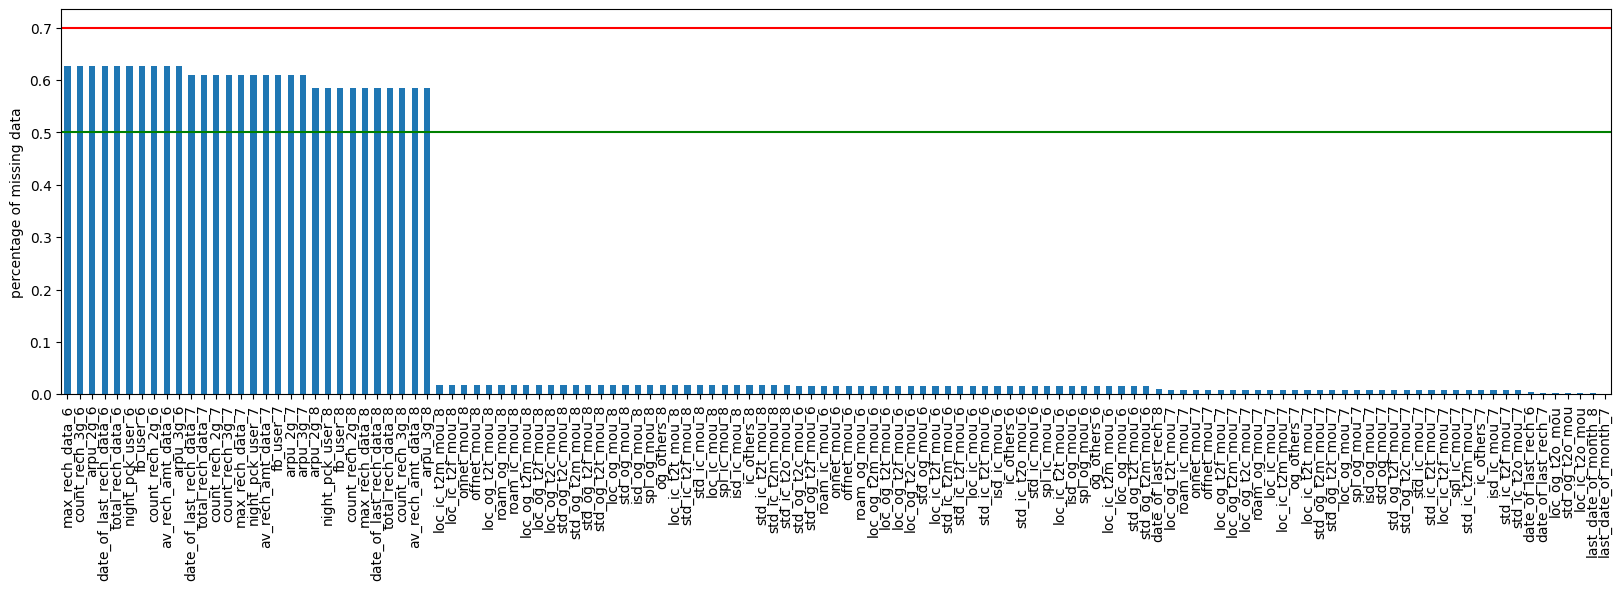

In [18]:
# Visual plot of the missing values
df_final[vars_with_na].isnull().mean().sort_values(ascending=False).plot.bar(figsize=(20,5))
plt.ylabel("percentage of missing data")
plt.axhline(y=0.70, color='r', linestyle='-')
plt.axhline(y=0.50, color='g', linestyle='-')
plt.show()

In [19]:
# Variables to impute by dropping (more than 50%):
drop_missing_values = [var for var in vars_with_na if df_final[var].isnull().mean() > 0.5]

# Varaible to impute by replacing the values with appropiate values(less than 50%):
impute_missing_values = [var for var in vars_with_na if df_final[var].isnull().mean() < 0.5]

In [20]:
drop_missing_values

['date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'arpu_3g_6',
 'arpu_3g_7',
 'arpu_3g_8',
 'arpu_2g_6',
 'arpu_2g_7',
 'arpu_2g_8',
 'night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8']

In [21]:
## Dropping the columns 
df_final.drop(columns=drop_missing_values, inplace = True)

In [22]:
# determining the percentage of the missing Values
nan_var = df_final.isnull().columns

In [23]:
df_final[nan_var].describe()

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou        arpu_6  \
count         29941.0         29941.0         29941.0  30024.000000   
mean              0.0             0.0             0.0    568.129745   
std               0.0             0.0             0.0    452.649161   
min               0.0             0.0             0.0  -2258.709000   
25%               0.0             0.0             0.0    340.461500   
50%               0.0             0.0             0.0    480.031000   
75%               0.0             0.0             0.0    696.185000   
max               0.0             0.0             0.0  27731.088000   

             arpu_7        arpu_8   onnet_mou_6   onnet_mou_7   onnet_mou_8  \
count  30024.000000  30024.000000  29576.000000  29773.000000  29516.000000   
mean     589.348437    581.058044    288.491901    308.195840    297.360197   
std      462.955444    480.973460    458.732578    482.179161    481.437913   
min    -2014.045000   -945.808000      0.000000      0.000000      0.000000   
25%      364.556500    352.345250     39.005000     42.680000     39.430000   
50%      492.622000    489.834500    120.110000    128.790000    121.190000   
75%      699.999500    698.620500    336.700000    367.560000    347.400000   
max    35145.834000  33543.624000   7376.710000   8157.780000  10752.560000   

       offnet_mou_6  ...  monthly_3g_7  monthly_3g_8   sachet_3g_6  \
count  29576.000000  ...  30024.000000  30024.000000  30024.000000   
mean     409.772126  ...      0.184253      0.189715      0.134492   
std      470.850497  ...      0.617466      0.607259      0.863593   
min        0.000000  ...      0.000000      0.000000      0.000000   
25%      130.070000  ...      0.000000      0.000000      0.000000   
50%      273.840000  ...      0.000000      0.000000      0.000000   
75%      513.487500  ...      0.000000      0.000000      0.000000   
max     8362.360000  ...     16.000000     16.000000     29.000000   

        sachet_3g_7   sachet_3g_8           aon    aug_vbc_3g    jul_vbc_3g  \
count  30024.000000  30024.000000  30024.000000  30024.000000  30024.000000   
mean       0.149947      0.152378   1277.949540    137.314584    136.083723   
std        0.967289      1.007084    977.427869    402.036713    408.390228   
min        0.000000      0.000000    180.000000      0.000000      0.000000   
25%        0.000000      0.000000    484.000000      0.000000      0.000000   
50%        0.000000      0.000000    930.000000      0.000000      0.000000   
75%        0.000000      0.000000   1962.000000     14.072500      3.910000   
max       35.000000     41.000000   4321.000000  12916.220000   9165.600000   

         jun_vbc_3g         churn  
count  30024.000000  30024.000000  
mean     120.216369      0.061684  
std      386.203533      0.240585  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        0.000000      0.000000  
max    11166.210000      1.000000  

[8 rows x 134 columns]

### Insights

if we see the min values of the features, most of the features have `0`, so for the missing values we can assume we can replace the NaN with `0`.

In [24]:
df_final.shape

(30024, 140)

In [25]:
cat_cols = df_final.select_dtypes(include="object").columns
num_cols = df_final.select_dtypes(exclude= 'object').columns

In [26]:
# Dictionary to store imputation strategies
imputation_methods ={}

# Iterate hrough each column to beimputed
for var in impute_missing_values:
    if var in num_cols:
        if df_final[var].min() == 0:
            df_final[var].fillna(0,inplace=True)
        else:
            df_final[var].fillna(df_final[var].median(), inplace=True)

In [27]:
df_final.isnull().sum()

loc_og_t2o_mou           0
std_og_t2o_mou           0
loc_ic_t2o_mou           0
last_date_of_month_6     0
last_date_of_month_7    11
                        ..
aon                      0
aug_vbc_3g               0
jul_vbc_3g               0
jun_vbc_3g               0
churn                    0
Length: 140, dtype: int64

Only the Date-time columns are having missing values.It is better to Drop the Date time columns because it will not give much value in our model building and analysis. 

In [28]:
# List of datetime columns
datetime_cols = ['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
                 'date_of_last_rech_6', 'date_of_last_rech_7',
                 'date_of_last_rech_8']

df_final.drop(columns=datetime_cols, inplace=True)

In [29]:
df_final.head(10)

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou    arpu_6    arpu_7  \
0             0.0             0.0             0.0   221.338   251.102   
1             0.0             0.0             0.0  1069.180  1349.850   
2             0.0             0.0             0.0   378.721   492.223   
3             0.0             0.0             0.0   492.846   205.671   
4             0.0             0.0             0.0    31.000   510.465   
5             0.0             0.0             0.0   271.699   421.474   
6             0.0             0.0             0.0   514.453   597.753   
7             0.0             0.0             0.0   422.050   359.730   
8             0.0             0.0             0.0   977.020  2362.833   
9             0.0             0.0             0.0   363.987   486.558   

     arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  ...  \
0   508.054        99.91        54.39       310.98        123.31  ...   
1  3171.480        57.84        54.68        52.29        453.43  ...   
2   137.362       413.69       351.03        35.08         94.66  ...   
3   593.260       501.76       108.39       534.24        413.31  ...   
4   590.643         0.00       246.56       280.31          0.00  ...   
5   364.251        72.41        86.73        71.18        198.84  ...   
6   637.760       102.41       132.11        85.14        757.93  ...   
7   354.793       124.19        55.19       141.11        450.33  ...   
8   409.230         0.00         0.00         0.00          0.00  ...   
9   393.909       248.99       619.96       666.38         88.86  ...   

   monthly_3g_7  monthly_3g_8  sachet_3g_6  sachet_3g_7  sachet_3g_8   aon  \
0             0             0            0            0            0  2491   
1             0             0            0            0            0   802   
2             0             0            0            0            0   315   
3             0             0            0            0            0  2607   
4             0             0            0            0            0   270   
5             0             0            0            0            0  3108   
6             0             0            0            0            0   720   
7             0             0            0            0            0  3072   
8             5             1            1            3            0  1328   
9             0             0            0            0            0  1155   

   aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  churn  
0        0.00        0.00        0.00      0  
1       57.74       19.38       18.74      1  
2       21.03      910.65      122.16      0  
3        0.00        0.00        0.00      0  
4        0.00        0.00        0.00      0  
5        1.11        0.22        0.00      0  
6        0.00        0.00        0.00      0  
7        0.00        0.00        0.00      0  
8      358.10     2706.83     1714.67      0  
9        0.00        0.00        0.00      0  

[10 rows x 134 columns]

In [30]:
# checking for missing values
df_final.isnull().sum()

loc_og_t2o_mou    0
std_og_t2o_mou    0
loc_ic_t2o_mou    0
arpu_6            0
arpu_7            0
                 ..
aon               0
aug_vbc_3g        0
jul_vbc_3g        0
jun_vbc_3g        0
churn             0
Length: 134, dtype: int64

### Unique Values

Many Features is seems to have 0 or only has 1 unique value, maybe potential categorical values.

WE will be dropping the features who only has a 1 unique values as these features will have no value to our analysis

In [31]:
# Identify columns with only one unique value
cols_with_single_value = [col for col in df_final.columns if df_final[col].nunique() == 1]

# Display the columns that will be dropped
print("Columns with only one unique value:")
print(cols_with_single_value)

# Drop these columns from the DataFrame
df_final.drop(columns=cols_with_single_value, inplace=True)


Columns with only one unique value:
['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8']


In [32]:
df_final.shape

(30024, 125)

## Exploratory Data Analysis

In [33]:
df_final.describe()

arpu_6        arpu_7        arpu_8   onnet_mou_6   onnet_mou_7  \
count  30024.000000  30024.000000  30024.000000  30024.000000  30024.000000   
mean     568.129745    589.348437    581.058044    284.187199    305.619329   
std      452.649161    462.955444    480.973460    456.638657    480.978657   
min    -2258.709000  -2014.045000   -945.808000      0.000000      0.000000   
25%      340.461500    364.556500    352.345250     36.340000     41.290000   
50%      480.031000    492.622000    489.834500    116.760000    126.585000   
75%      696.185000    699.999500    698.620500    330.287500    363.265000   
max    27731.088000  35145.834000  33543.624000   7376.710000   8157.780000   

        onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
count  30024.000000  30024.000000  30024.000000  30024.000000   30024.000000   
mean     292.328922    403.657754    425.881328    409.256281      16.990519   
std      478.885641    469.957658    485.742893    487.240223      76.127707   
min        0.000000      0.000000      0.000000      0.000000       0.000000   
25%       36.475000    124.217500    137.670000    123.882500       0.000000   
50%      117.035000    269.310000    284.395000    272.935000       0.000000   
75%      340.737500    508.607500    536.567500    519.860000       0.000000   
max    10752.560000   8362.360000   9667.130000  14007.340000    2613.310000   

       ...  monthly_3g_7  monthly_3g_8   sachet_3g_6   sachet_3g_7  \
count  ...  30024.000000  30024.000000  30024.000000  30024.000000   
mean   ...      0.184253      0.189715      0.134492      0.149947   
std    ...      0.617466      0.607259      0.863593      0.967289   
min    ...      0.000000      0.000000      0.000000      0.000000   
25%    ...      0.000000      0.000000      0.000000      0.000000   
50%    ...      0.000000      0.000000      0.000000      0.000000   
75%    ...      0.000000      0.000000      0.000000      0.000000   
max    ...     16.000000     16.000000     29.000000     35.000000   

        sachet_3g_8           aon    aug_vbc_3g    jul_vbc_3g    jun_vbc_3g  \
count  30024.000000  30024.000000  30024.000000  30024.000000  30024.000000   
mean       0.152378   1277.949540    137.314584    136.083723    120.216369   
std        1.007084    977.427869    402.036713    408.390228    386.203533   
min        0.000000    180.000000      0.000000      0.000000      0.000000   
25%        0.000000    484.000000      0.000000      0.000000      0.000000   
50%        0.000000    930.000000      0.000000      0.000000      0.000000   
75%        0.000000   1962.000000     14.072500      3.910000      0.000000   
max       41.000000   4321.000000  12916.220000   9165.600000  11166.210000   

              churn  
count  30024.000000  
mean       0.061684  
std        0.240585  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000  

[8 rows x 125 columns]

## summary Statistics


## **1. General Overview**
- The dataset contains **30,024** observations.
- It includes customer call, recharge, and internet usage data across **four months (June, July, August, September)**.
- The dataset is used to predict churn in the **ninth month (September)** based on usage behavior from the **first three months (June, July, August).**
- Most of the features are **numeric**, with a few **date-based columns**.

---

## **2. Key Insights from Descriptive Statistics**

### **(A) General Customer Usage**
- **`arpu_6`, `arpu_7`, `arpu_8` (Average Revenue Per User per month)**
  - Mean values range between **₹568 to ₹589**.
  - There are **negative values**, which may indicate refunds, adjustments, or incorrect data.
  - High standard deviation (~₹450), suggesting **high variance in spending patterns**.

- **`onnet_mou`, `offnet_mou` (Minutes of Use - On-net and Off-net calls)**
  - Mean on-net minutes ~ **284 to 305 min/month**.
  - Mean off-net minutes ~ **405 to 426 min/month**.
  - Some users have **zero usage**, while a few have **extremely high call minutes (up to ~10,752 mins in a month).**

- **Roaming Calls (`roam_ic_mou`, `roam_og_mou`)**
  - Mean values are **very low (~16-28 mins)** per month.
  - Most customers do **not use roaming frequently**, but a few have **very high roaming usage (~4,100 mins).**

---

### **(B) Data and Internet Usage**
- **2G and 3G Usage (`vol_2g_mb`, `vol_3g_mb`)**
  - **Very skewed** distribution; most customers have **zero or very low** data usage.
  - Some customers have **extremely high** usage (e.g., **45GB in a month**).
  - Standard deviation is high, indicating **high variance in data consumption.**

- **Recharges (`total_rech_amt`, `total_rech_data`)**
  - Mean recharge amount is around **₹671-₹692 per month**.
  - Some customers have **zero recharge activity** (potential churners).
  - **Maximum recharge amounts exceed ₹40,000**, indicating **outliers or corporate accounts.**
  - Recharge count is also skewed, with **some customers making 138+ recharges per month.**

---

### **(C) Subscription Packs and Special Schemes**
- **Prepaid Plans (`monthly_2g`, `monthly_3g`, `sachet_2g`, `sachet_3g`)**
  - Many users **do not subscribe to monthly data packs**, relying more on **sachet (short-term) data plans.**
  - **Sachet 3G plans are more popular than Monthly 3G plans.**
  - There is **significant variation** in customer subscription patterns.

---

### **(D) Churn Behavior**
- **Churn Rate (`churn` column)**
  - Only **6.1% of customers have churned** (binary 0/1).
  - This is a **highly imbalanced dataset**, which requires **handling techniques like SMOTE, cost-sensitive learning, or stratified sampling**.

---

## **Univariate Analysis | Outlier Analysis**

In [34]:
def plot_univariate_analysis(df, columns):

    # Set plot style
    sns.set(style="whitegrid")

    # Set up the subplot grid
    fig, axes = plt.subplots(len(columns), 2, figsize=(12, 5 * len(columns))) 

    # Loop through each selected column and plot
    for i, col in enumerate(columns):
        # Histogram
        sns.histplot(df[col], bins=80, kde=True, ax=axes[i, 0], color='skyblue')
        axes[i, 0].set_title(f'Histogram of {col}', fontsize=12)
        axes[i, 0].set_xlabel(col, fontsize=10)
        axes[i, 0].set_ylabel('Frequency', fontsize=10)

        # Boxplot
        sns.boxplot(x=df[col], ax=axes[i, 1], color='salmon')
        axes[i, 1].set_title(f'Boxplot of {col}', fontsize=12)
        axes[i, 1].set_xlabel(col, fontsize=10)
        axes[i, 1].set_ylabel('Value Distribution', fontsize=10)

    plt.tight_layout()
    plt.show()

### Age On Network

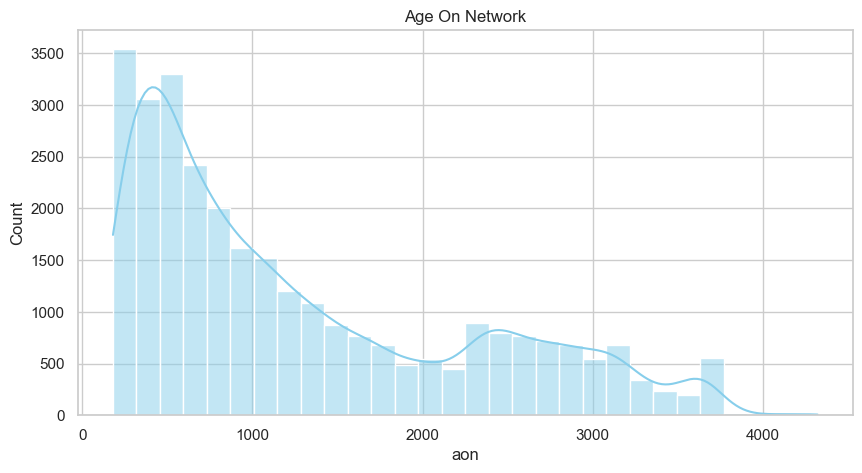

In [35]:
sns.set(style = "whitegrid")
plt.figure(figsize = (10,5))
sns.histplot(df_final['aon'], bins =30, kde = True, color='skyblue')
plt.title("Age On Network")
plt.show()

### insight

The Data is Distributed is highly right skewed (positive skewness) most of the users are withn 1000 (2 years) and some customers are with the service for 4000 days (10 years).

### Recharges

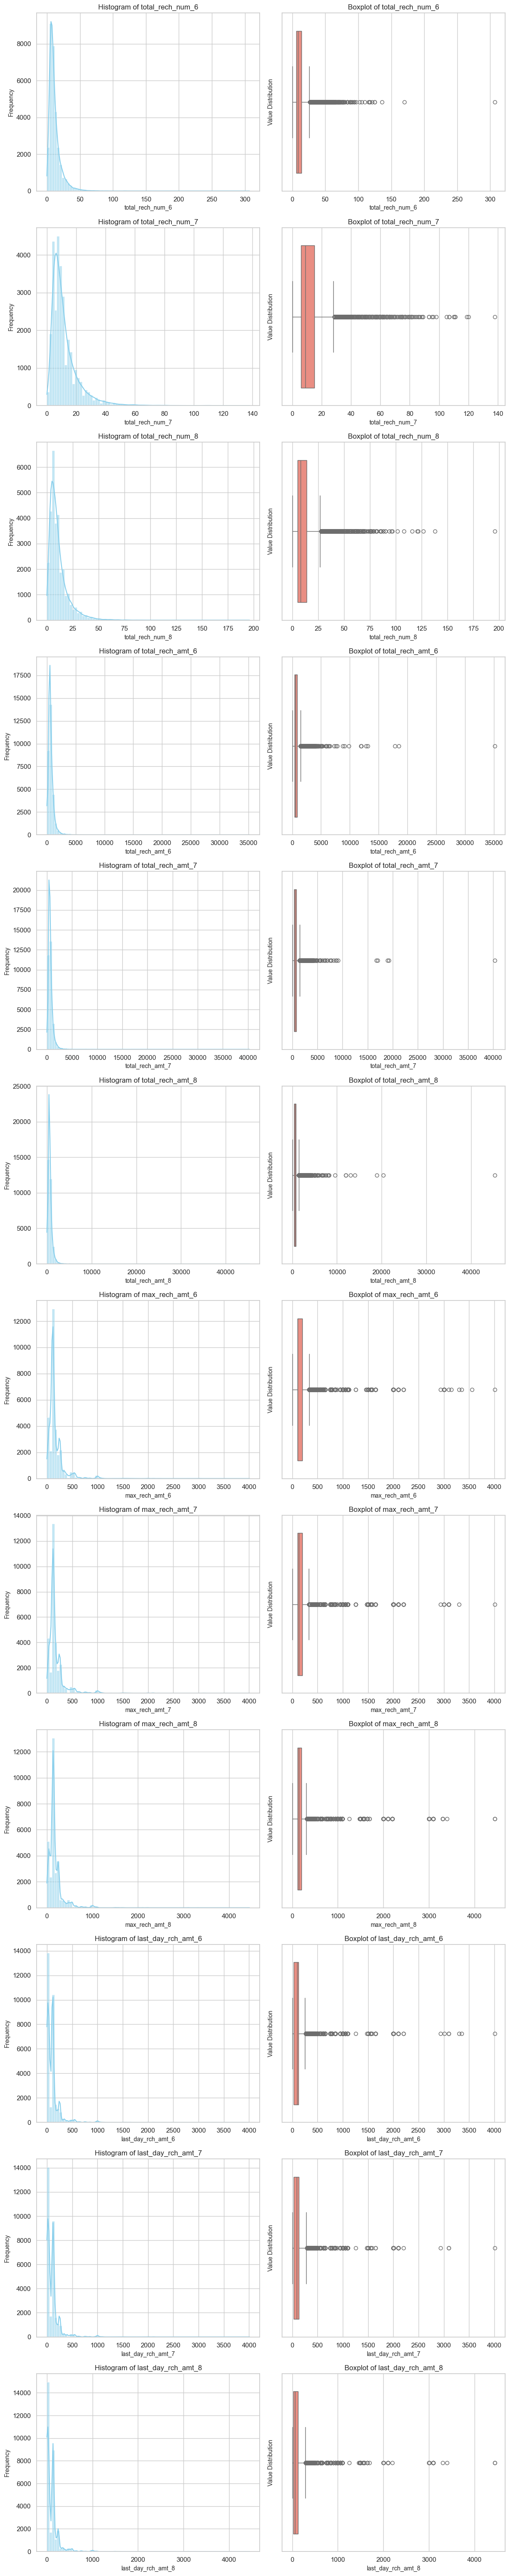

In [36]:
plot_columns = df_final.columns[df_final.columns.str.contains('rech|rch', regex=True)]
plot_univariate_analysis(df_final, plot_columns)

### Insight
### **1. Distribution of Recharge and Usage Features**
- The distributions of `total_rech_num`, `total_rech_amt`, and `max_rech_amt` across different months (6, 7, 8) are **highly skewed to the right**.
- A **large proportion of users have low recharge amounts and frequencies**, indicating that a segment of customers may not be high-value users.
- Some customers exhibit **extreme recharge values**, potentially representing business users or heavy telecom users.

### **2. Last Day Recharge Amount**
- The `last_day_rch_amt` feature, representing the amount of the last recharge made by the customer, is also **highly skewed**.
- Many customers have made **low-value recharges**, which may indicate **cost-conscious behavior**.
- A significant number of customers **did not recharge at all** in certain months, which may signal an **upcoming churn risk**.

### **3. Churn Trend Observations**
- Comparing values across months, a **decreasing trend** in recharge frequency and amount from **month 6 to month 8** is noticeable, which aligns with the **churn phase hypothesis**.
- Customers who **reduce their recharge activity over time are more likely to churn**, suggesting that declining usage trends should be flagged as a risk.

### **4. KDE Analysis Observations**
- The **KDE plots** reveal that recharge amounts and frequencies have a **long tail**, meaning that **a small percentage of users make significantly higher recharges**.
- This tail suggests that **a small number of high-value customers** contribute a significant portion of the revenue.
- Identifying and **retaining high-value customers** is crucial for reducing overall churn.



### Average Revenue Per User

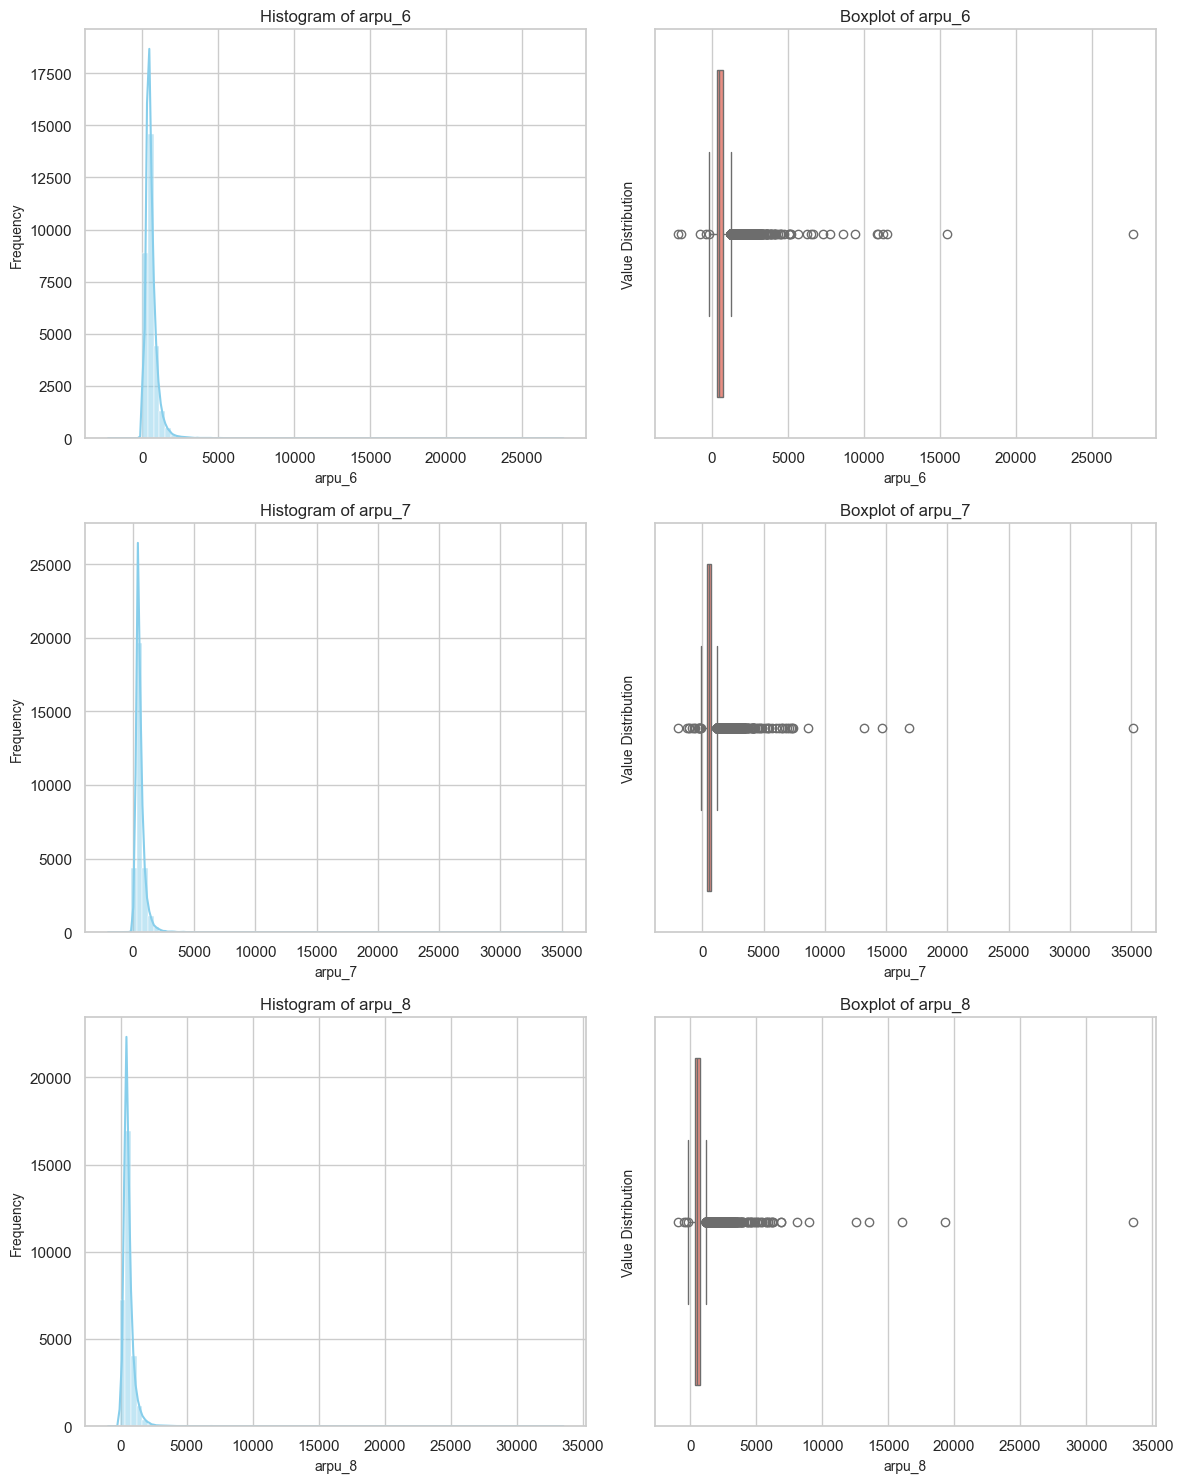

In [37]:
plot_columns = df_final.columns[df_final.columns.str.contains('arpu')]
plot_univariate_analysis(df_final, plot_columns)

### Insight
### **1. Distribution of ARPU Across Months**
- The ARPU (`arpu_6`, `arpu_7`, `arpu_8`) exhibits a **highly skewed distribution**, with the majority of users having **low revenue generation**.
- A **small subset of users contributes significantly higher revenue**, leading to a long-tailed distribution.
- The **KDE plots confirm the extreme right-skewness**, indicating that **most users have a low ARPU, while a few contribute heavily**.

### **2. Trends in ARPU Across Months**
- There is **no drastic fluctuation in ARPU** across the three months, suggesting a stable revenue pattern for most users.
- However, **a few users exhibit an increasing trend in ARPU**, which may indicate **premium customers** who consistently use high-value services.
- The presence of **outliers** (users with exceptionally high ARPU) should be carefully examined, as they could represent **corporate accounts, high-data users, or special plan subscribers**.

### **3. Churn Behavior and ARPU**
- Customers with **low and declining ARPU over time** may be **at risk of churn** as they reduce spending on telecom services.
- Churned users might show a **steep decline in ARPU from month 6 to month 8**, signifying **a shift to alternative service providers or reduced engagement**.
- Identifying users with **gradual ARPU declines** can help in designing **targeted retention strategies**.

## 2G|3G Analysis

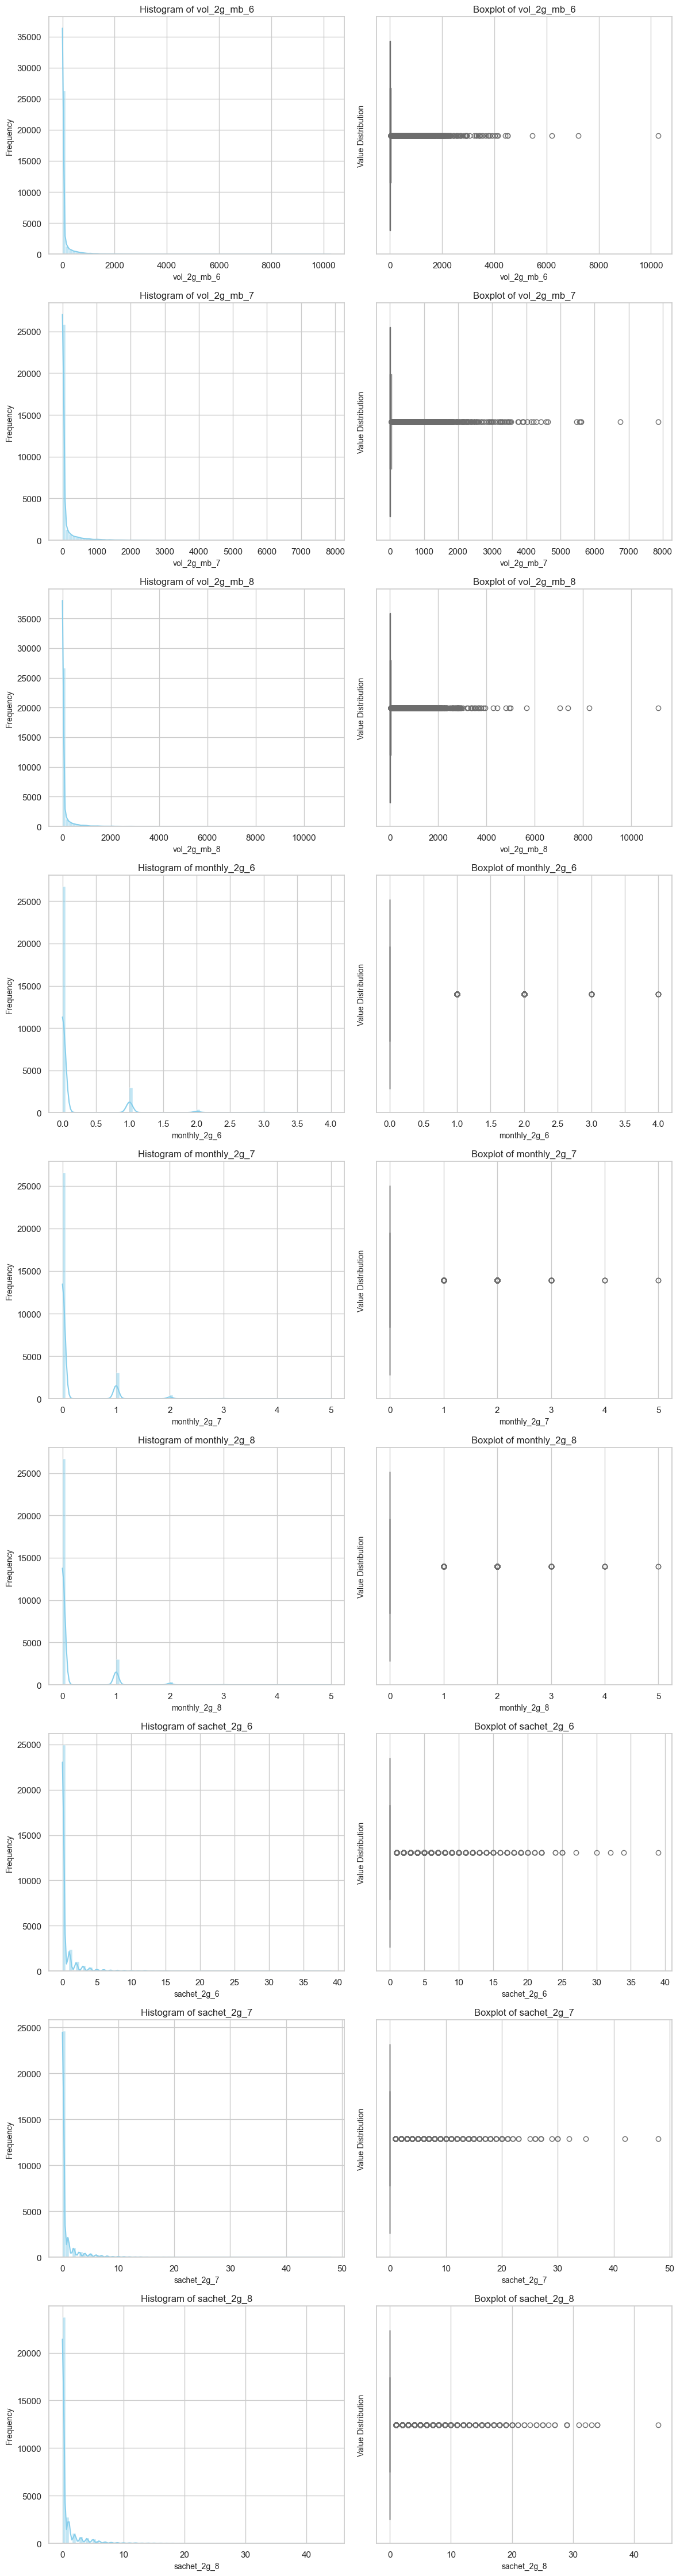

In [38]:
# 2G features
plot_columns=df_final.columns[df_final.columns.str.contains('2g')]
plot_univariate_analysis(df_final, plot_columns)

## Insights

### **1. Distribution of 2G Data Usage Across Months**
  - The **2G data usage (vol_2g_mb_6, vol_2g_mb_7, vol_2g_mb_8)** shows a **highly skewed distribution**, with the majority of users having very low data consumption.
  - A **small group of users contributes significantly to the total data usage**, leading to a **long-tailed distribution**.


### **2. Monthly 2G Data Usage**
- The **monthly_2g features** (monthly_2g_6, monthly_2g_7, monthly_2g_8) indicate that:
  - The majority of users have **very low monthly 2G data usage**.
  - A small number of users **consume 2G data consistently across months**.


### **3. Sachet 2G Data Usage**
- The **sachet_2g features** (sachet_2g_6, sachet_2g_7, sachet_2g_8) reveal that:
  - A majority of users have **very low sachet 2G usage**, confirming that sachet packs are **not widely used**.
  - The density plots show **extremely right-skewed distributions**, with a few users heavily relying on **sachet-based 2G data packs**.
  - Users **who frequently purchase sachet 2G packs** might be **occasional mobile data users or those looking for short-term internet access**.

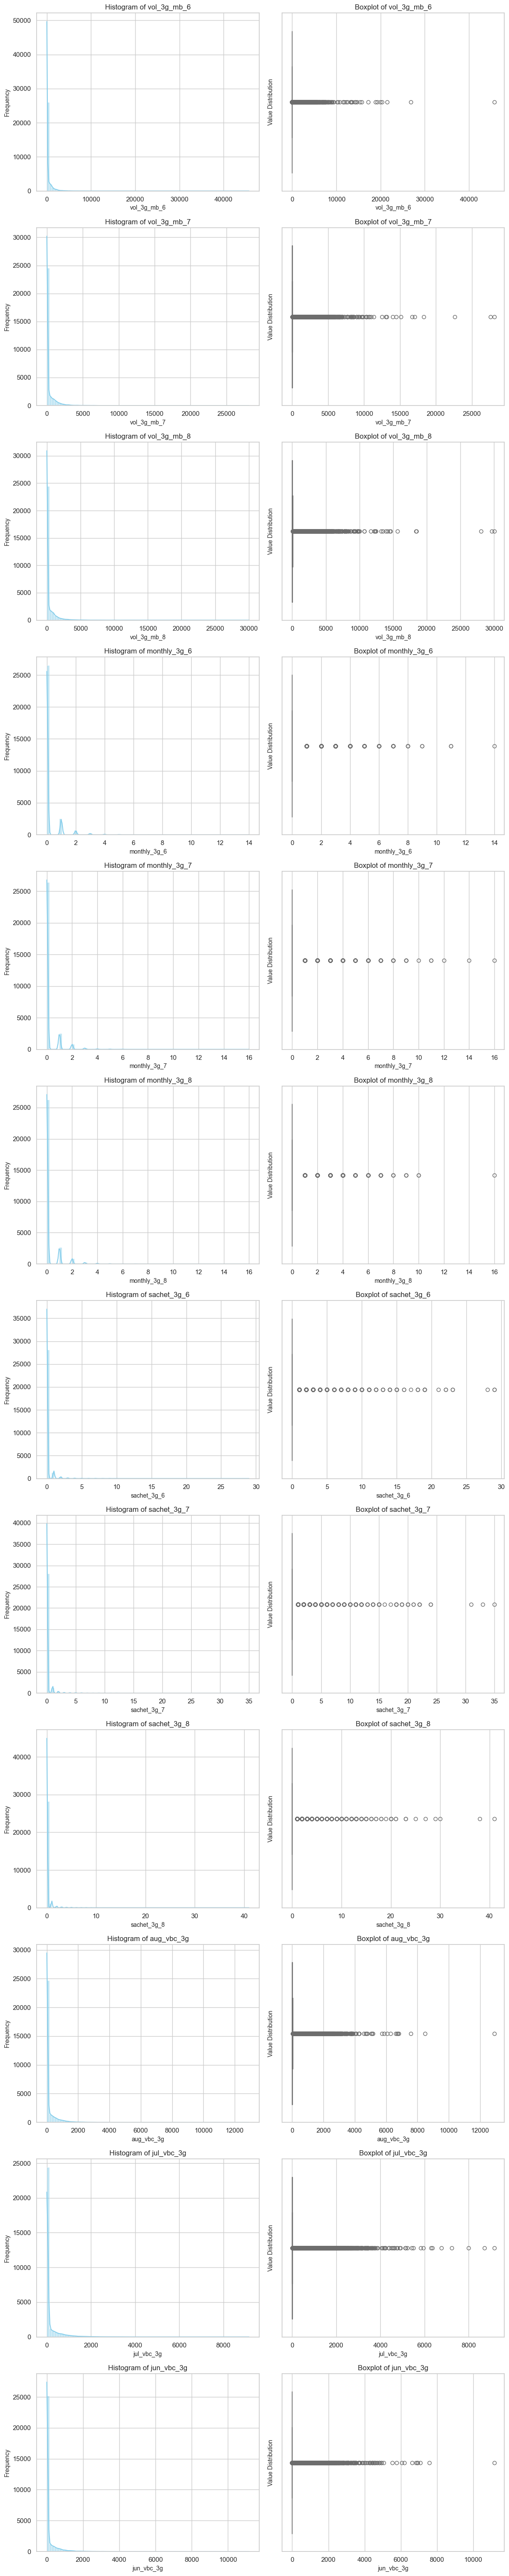

In [39]:
# 3G data analysis
plot_columns=df_final.columns[df_final.columns.str.contains('3g')]
plot_univariate_analysis(df_final, plot_columns)

## Insights

### **1. 3G Data Consumption Over Time**
- The **3G data usage (vol_3g_mb_6, vol_3g_mb_7, vol_3g_mb_8)** is **highly skewed**, with a majority of users having **low usage**.
- A **small fraction of users** contributes significantly to overall data consumption, causing a **long-tail distribution**.

### **2. Monthly 3G Data Trends**
- The **monthly_3g features** (monthly_3g_6, monthly_3g_7, monthly_3g_8) indicate:
  - A **majority of users have minimal 3G usage**.
  - A small **group of users consistently consumes higher amounts of 3G data**, which could represent users in **areas with limited 4G access**.

### **3. Sachet 3G Data Usage**
- The **sachet_3g features** (sachet_3g_6, sachet_3g_7, sachet_3g_8) reveal:
  - A majority of users have **very low sachet 3G usage**, indicating that sachet packs are **not a preferred choice**.
  - The KDE plots indicate that a **few users buy sachet packs repeatedly**.


## Calls (Minutes of Usage) features.

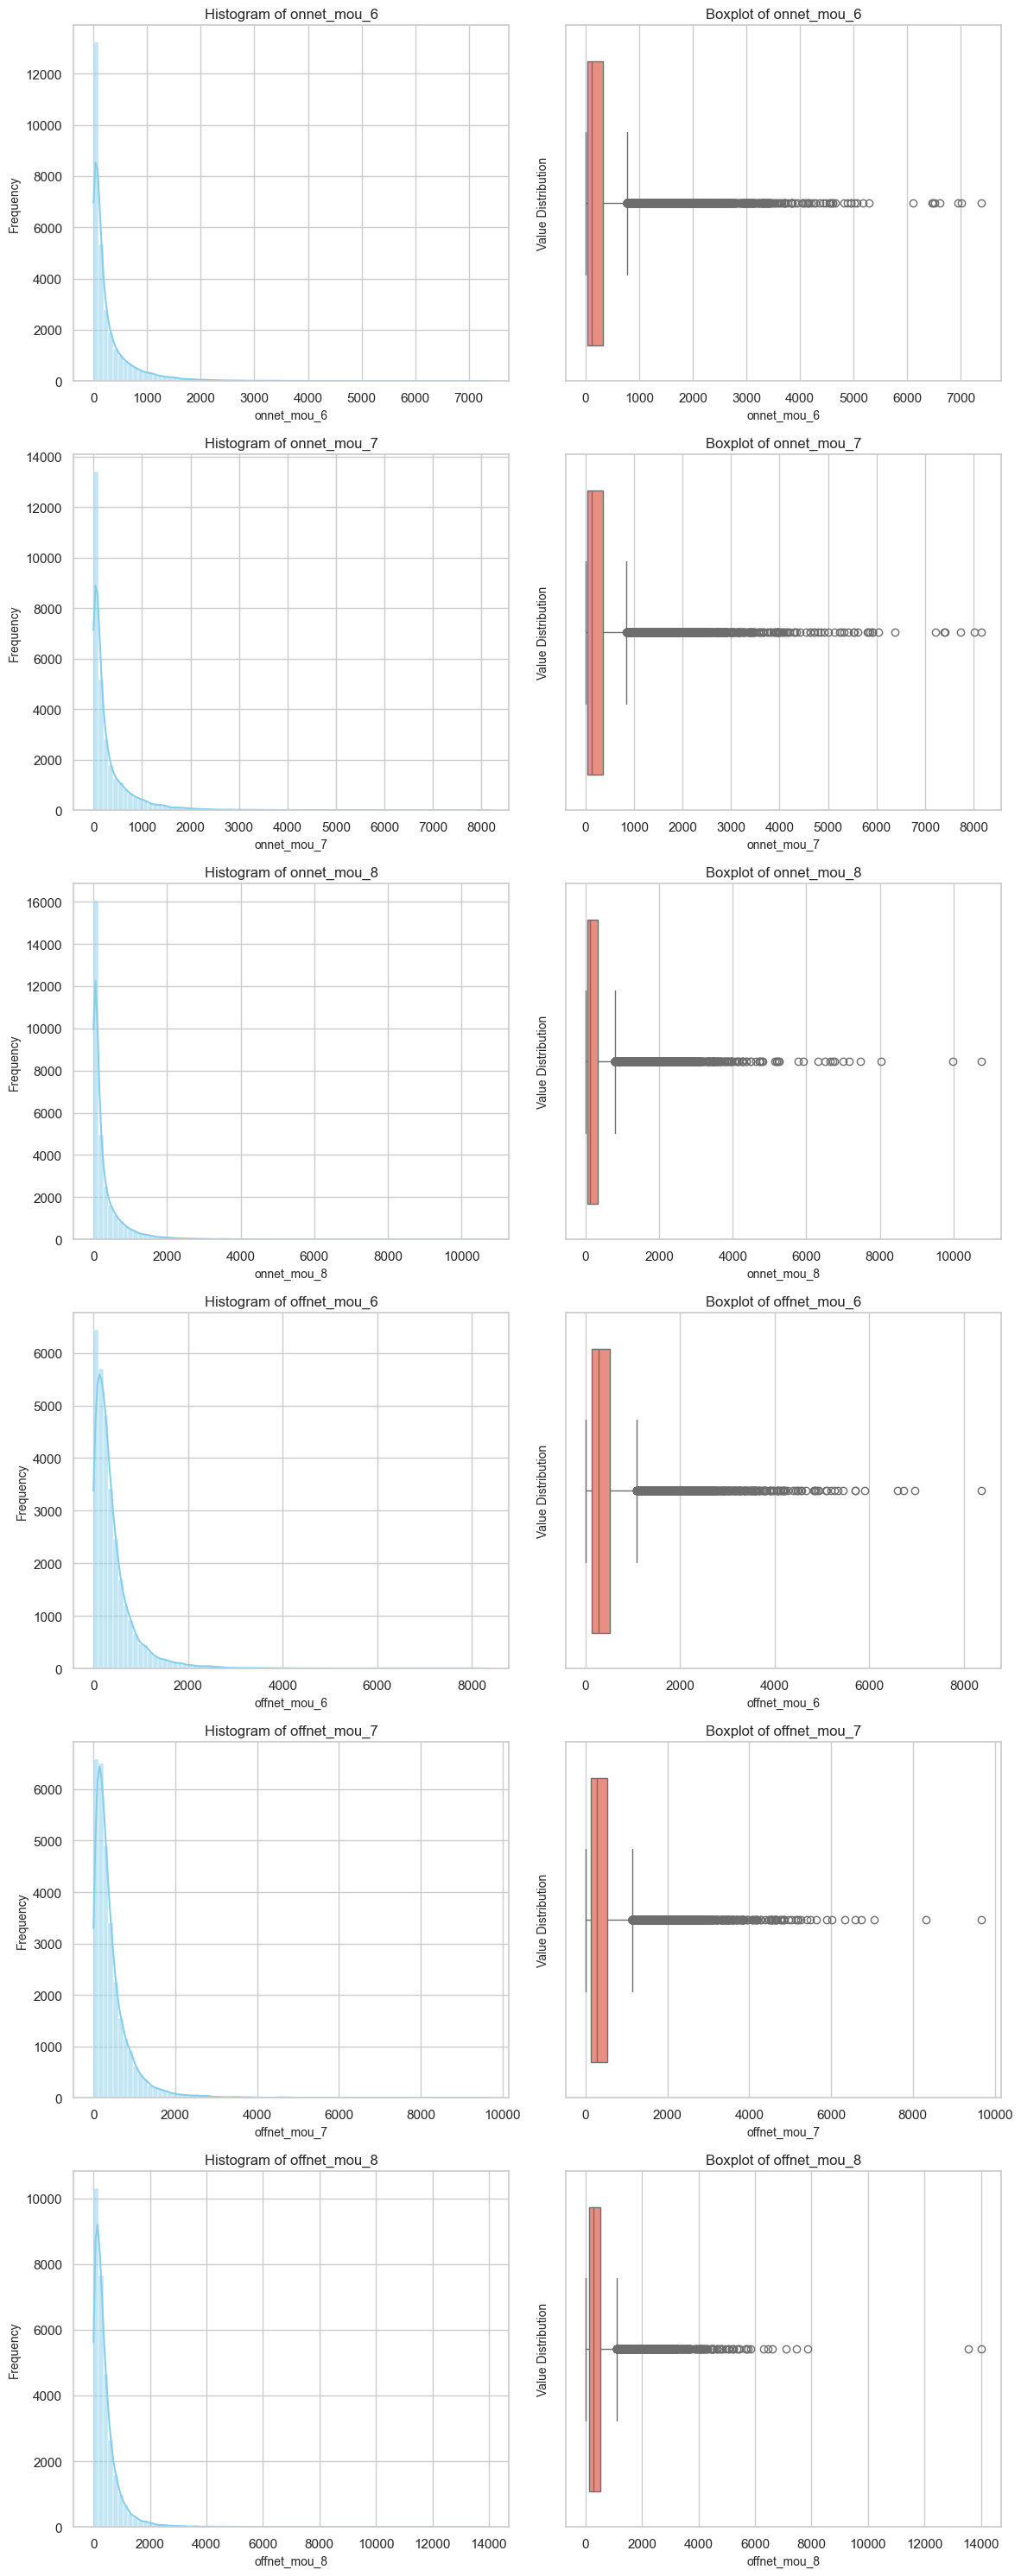

In [40]:
## Onnet and OFFnet minutes of Usage features
plot_columns = df_final.columns[df_final.columns.str.contains('onnet_mou|offnet_mou')]
plot_univariate_analysis(df_final, plot_columns)

## Insights

### **1. On-Net Call Usage Trends**
- The **on-net call minutes (onnet_mou_6, onnet_mou_7, onnet_mou_8)** indicate:
  - A highly **skewed distribution**, where the majority of users have low call usage.
  - A small percentage of users **make a significantly higher number of on-net calls**, contributing to the long tail.
  - KDE plots show a **steep drop-off**, suggesting that most users do not extensively use on-net calls.

### **2. Off-Net Call Usage Trends**
- The **off-net call minutes (offnet_mou_6, offnet_mou_7, offnet_mou_8)** show similar patterns:
  - The majority of users make **very few off-net calls**, while a small subset has extremely high usage.
  - KDE plots confirm the **high right-skew**, indicating an imbalance in call behavior across users.


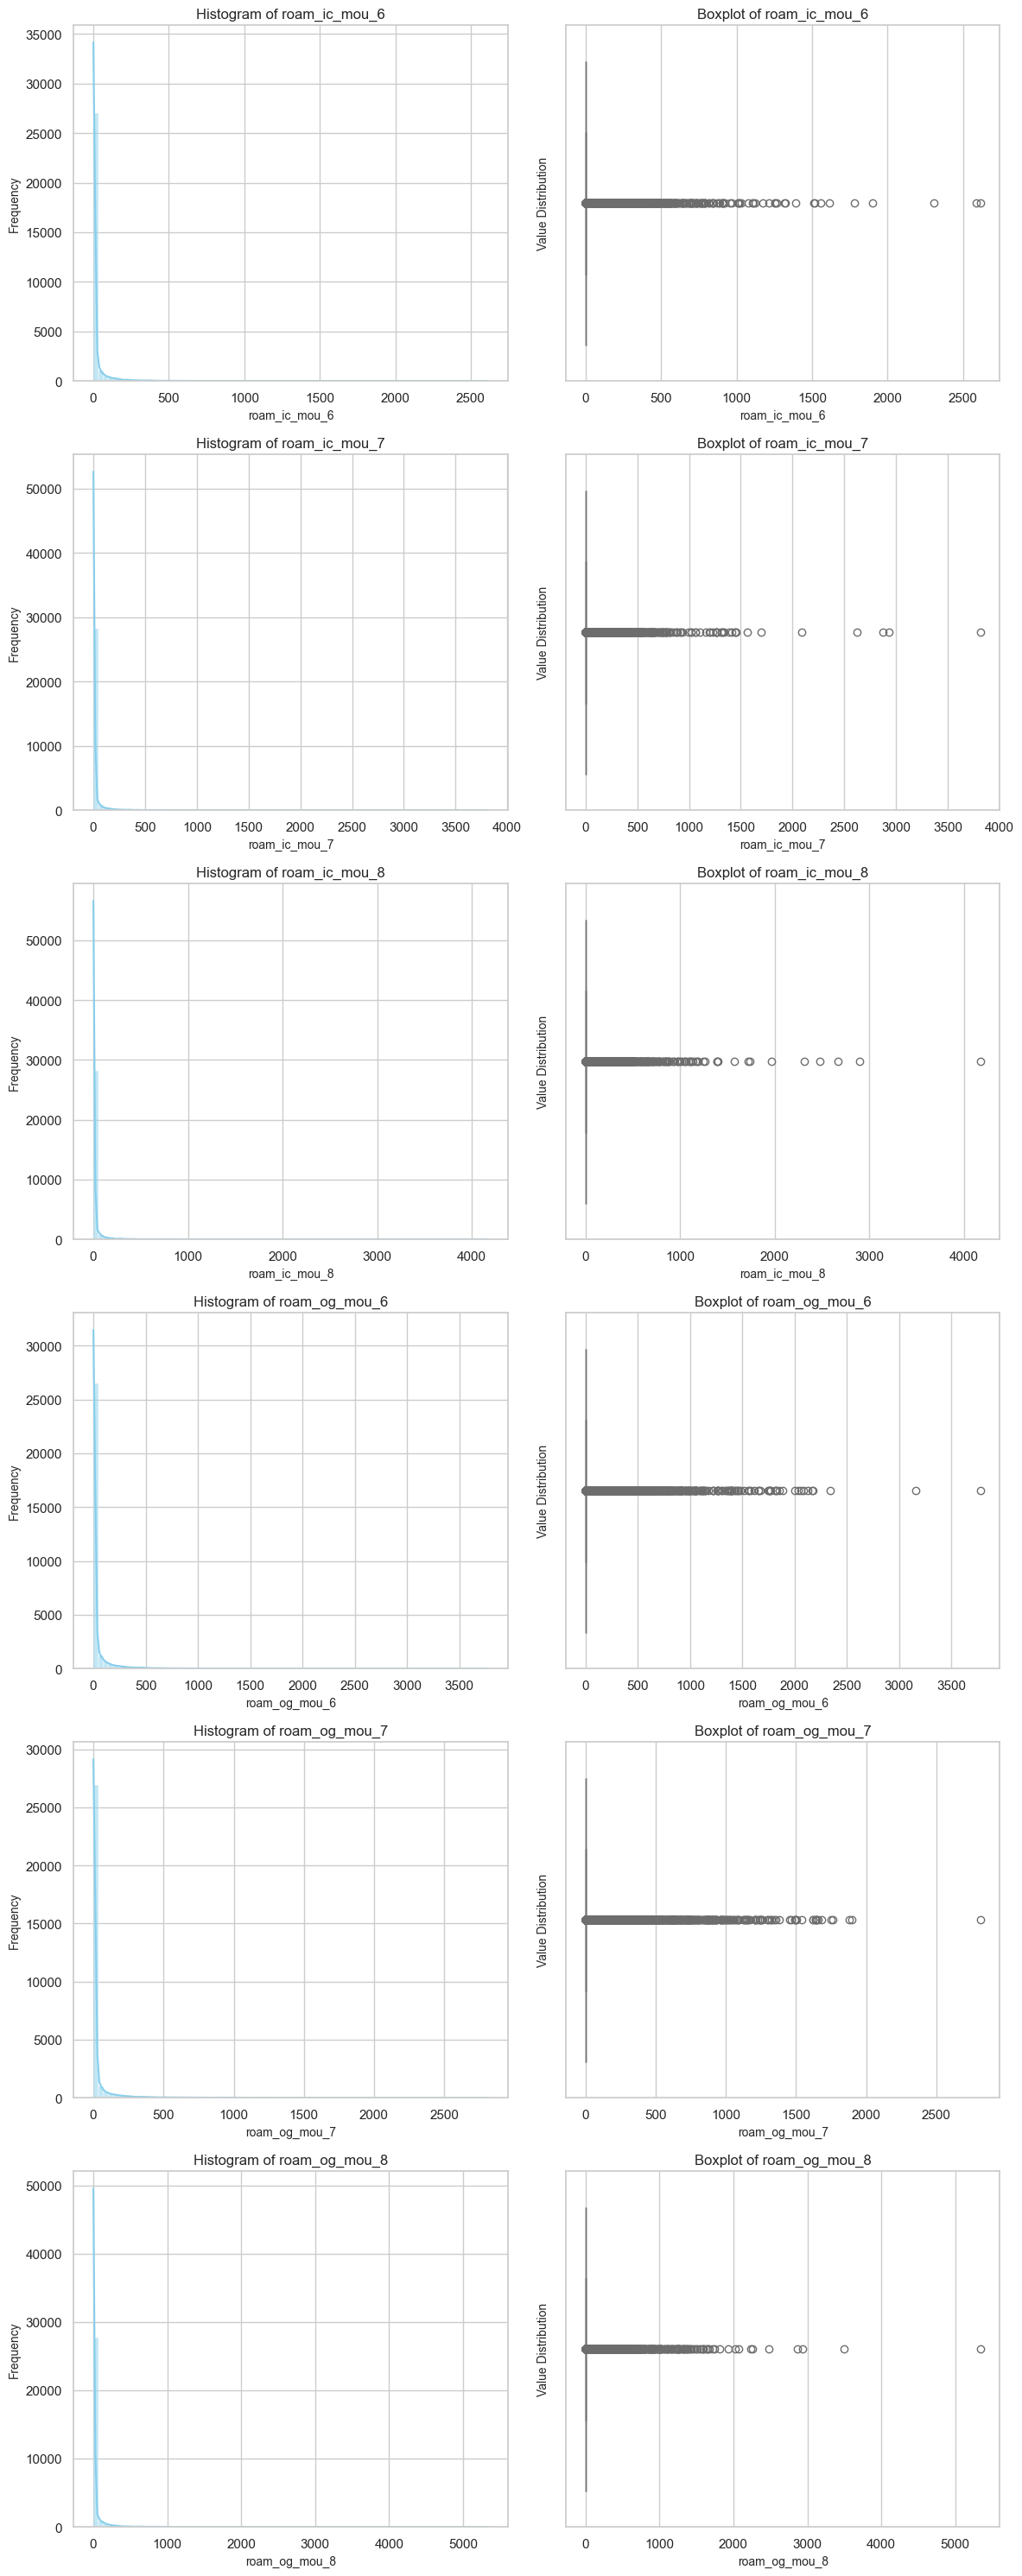

In [41]:
# Roaming minuets of Usage

plot_columns =  df_final.columns[df_final.columns.str.contains('roam_ic|roam_og')]
plot_univariate_analysis(df_final, plot_columns)

## Insights

### **1. Roaming Incoming Call Usage Trends**
- The **roaming incoming call minutes (roam_ic_mou_6, roam_ic_mou_7, roam_ic_mou_8)** show:
  - **Highly skewed distribution**, with most users having little to no roaming incoming calls.
  - A small subset of users utilizes roaming incoming calls significantly.


### **2. Roaming Outgoing Call Usage Trends**
- The **roaming outgoing call minutes (roam_og_mou_6, roam_og_mou_7, roam_og_mou_8)** have a similar pattern:
  - Most users have **low or no outgoing roaming calls**.
  - A few users contribute to high call usage in roaming, forming a **right-skewed distribution**.
  - KDE plots further indicate a **sharp drop-off in density**, reinforcing that only a fraction of users make heavy roaming calls.

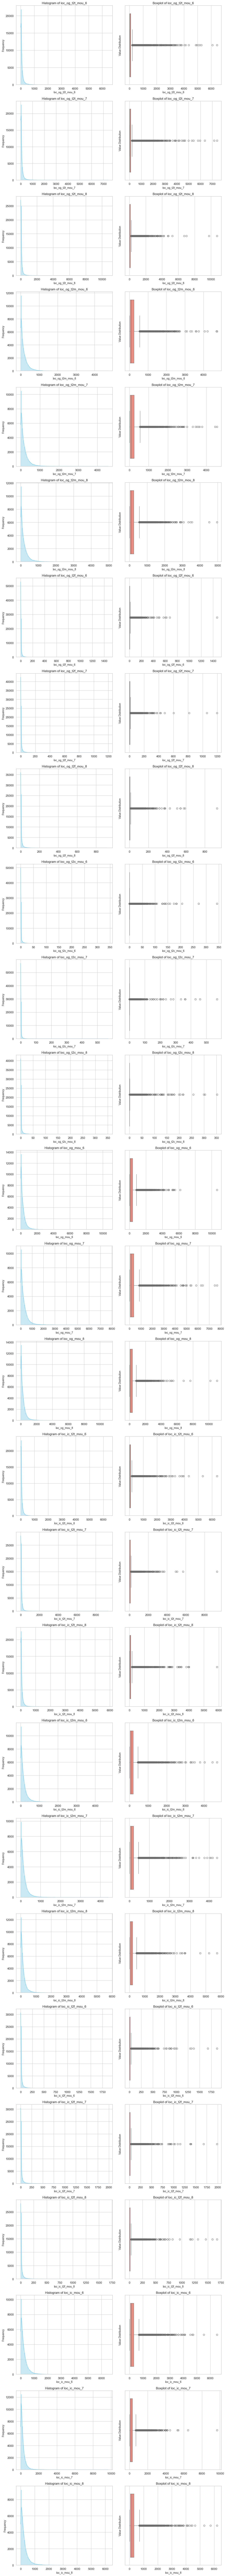

In [42]:
## Local calls incoming and outgoing calls
plot_columns =  df_final.columns[df_final.columns.str.contains('loc_ic|loc_og')]
plot_univariate_analysis(df_final, plot_columns)


### Insights

### **1. Local Incoming Calls (IC)**
- **Features**: `loc_ic_mou_6, loc_ic_mou_7, loc_ic_mou_8`
- **Observations**:
  - The histograms indicate a **highly skewed distribution**, meaning a majority of users have **low local incoming call volume**.
  - A small subset of customers shows **significantly high incoming call minutes**, likely **business users or high-usage customers**.


### **2. Local Outgoing Calls (OG)**
- **Features**: `loc_og_mou_6, loc_og_mou_7, loc_og_mou_8`
- **Observations**:
  - Similar to incoming calls, local outgoing call minutes follow a **skewed distribution**.
  - A majority of users make **low to moderate** local outgoing calls.
  - A **consistent decline in local outgoing call usage** can be an early **indicator of potential churn**.

### **3. Local Incoming call (t2t,t2f,t2m)**
- **Features**: `loc_ic_t2t_mou_`,`loc_ic_t2m_mou_`,`loc_ic_t2f_mou_`
- **Observation**:
  - All the feature categories withn the three months have a skewed Distrivution, means a very less amount of people have a frequent incoming call.
  - incoming call from othe operator are more than incoming call from the same operator.
  - incoming call to fixed line is consistent withn the three months, suggesting fixed lines are used in Businesses.

### **4. Local Outgoing call (t2t, t2f,t2m,t2c)**
- **Feature**: `loc_og_t2t_mou_`,`loc_og_t2m_mou_`,`loc_og_t2f_mou_`, `loc_og_t2c_mou_`
- **Observation**:
  - Same as incoming calls the Distributions ofthe graphs are highly skewed suggesting very less people has very frequent outgoing calls.
  - There are also some outgoing calls to the operator call center and accordingto the Distributions withn the three months the reading shows skewed Distribution and a slight increase in calls in the 7th month.
  

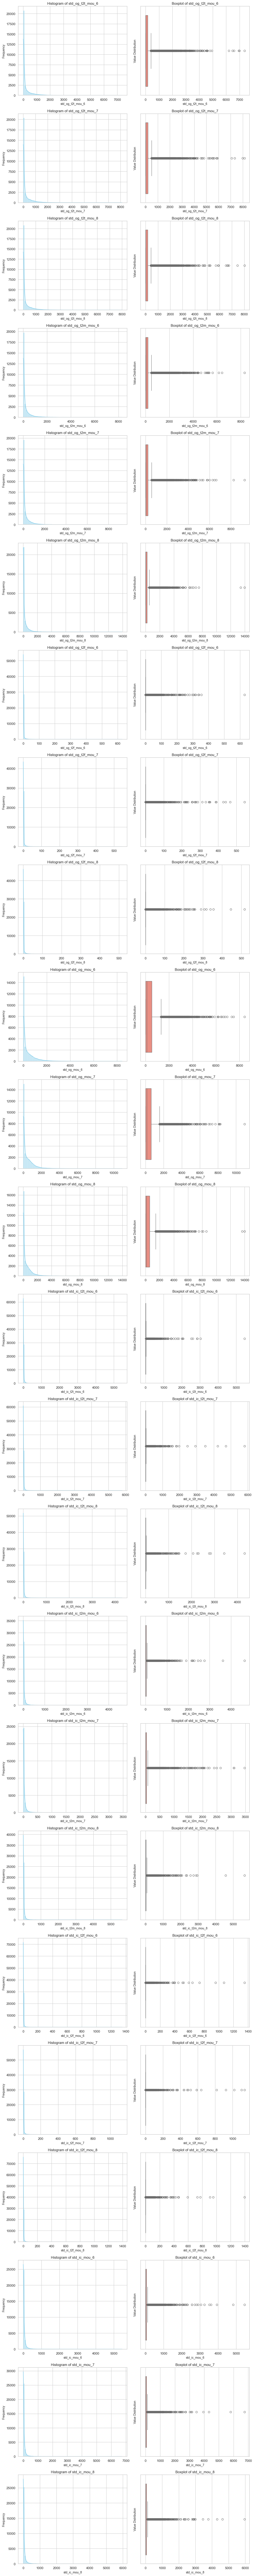

In [43]:
# Standard incoming and Outgoing Call Distributions
plot_columns= df_final.columns[df_final.columns.str.contains("std_ic|std_og")]
plot_univariate_analysis(df_final, plot_columns)

### Insights

1. **Standard outgoing call**
- **Features**: `std_og_mou_6`,`std_og_mou_7`,`std_og_mou_8`
    - The Distribution is **highly skewed** means a very few amount of people makes more htan 2000 calls.
    - If we compare the features The number of people make less than 200 calls increased in the 8th month can be a decreased call usage.

2. **Standard incomng Call**
- **Features**: `std_ic_mou_6`,`std_ic_mou_7`,`std_ic_mou_8`
    - The Distribution is also **highly skewed** a few amount of people recieves an incoming call more than 400 calls.
    
3. **Standard outgoing calls(t2t,t2m,t2f)**
- **Features**: `std_og_t2t_`,`std_og_t2m_`,`std_og_t2f_`
    - High Skewed Distributions among all the categories, 
    - While comparing we have kinda same amount of frequent calls in both `t2t (to the same operator)`, `t2m(to a different operator)` 
    - A very few calls are made to the fixed lines of the same operator, and the Distribution stays consistent withn the three months.

4. **Standard incoming Calls(t2t,t2m,t2f)**
- **Features**: `std_ic_t2t_`,`std_ic_t2m_`,`std_ic_t2f_`
    - High Skewness Distrbution among all the categories,
    - `t2t` only a few people revieve more than 1000 t2t calls and for some reason some more people joins less than 200 calls in the 8th month.
    - `t2m` not much Difference but in the 7th month the usage has decresed to less than 500 calls.

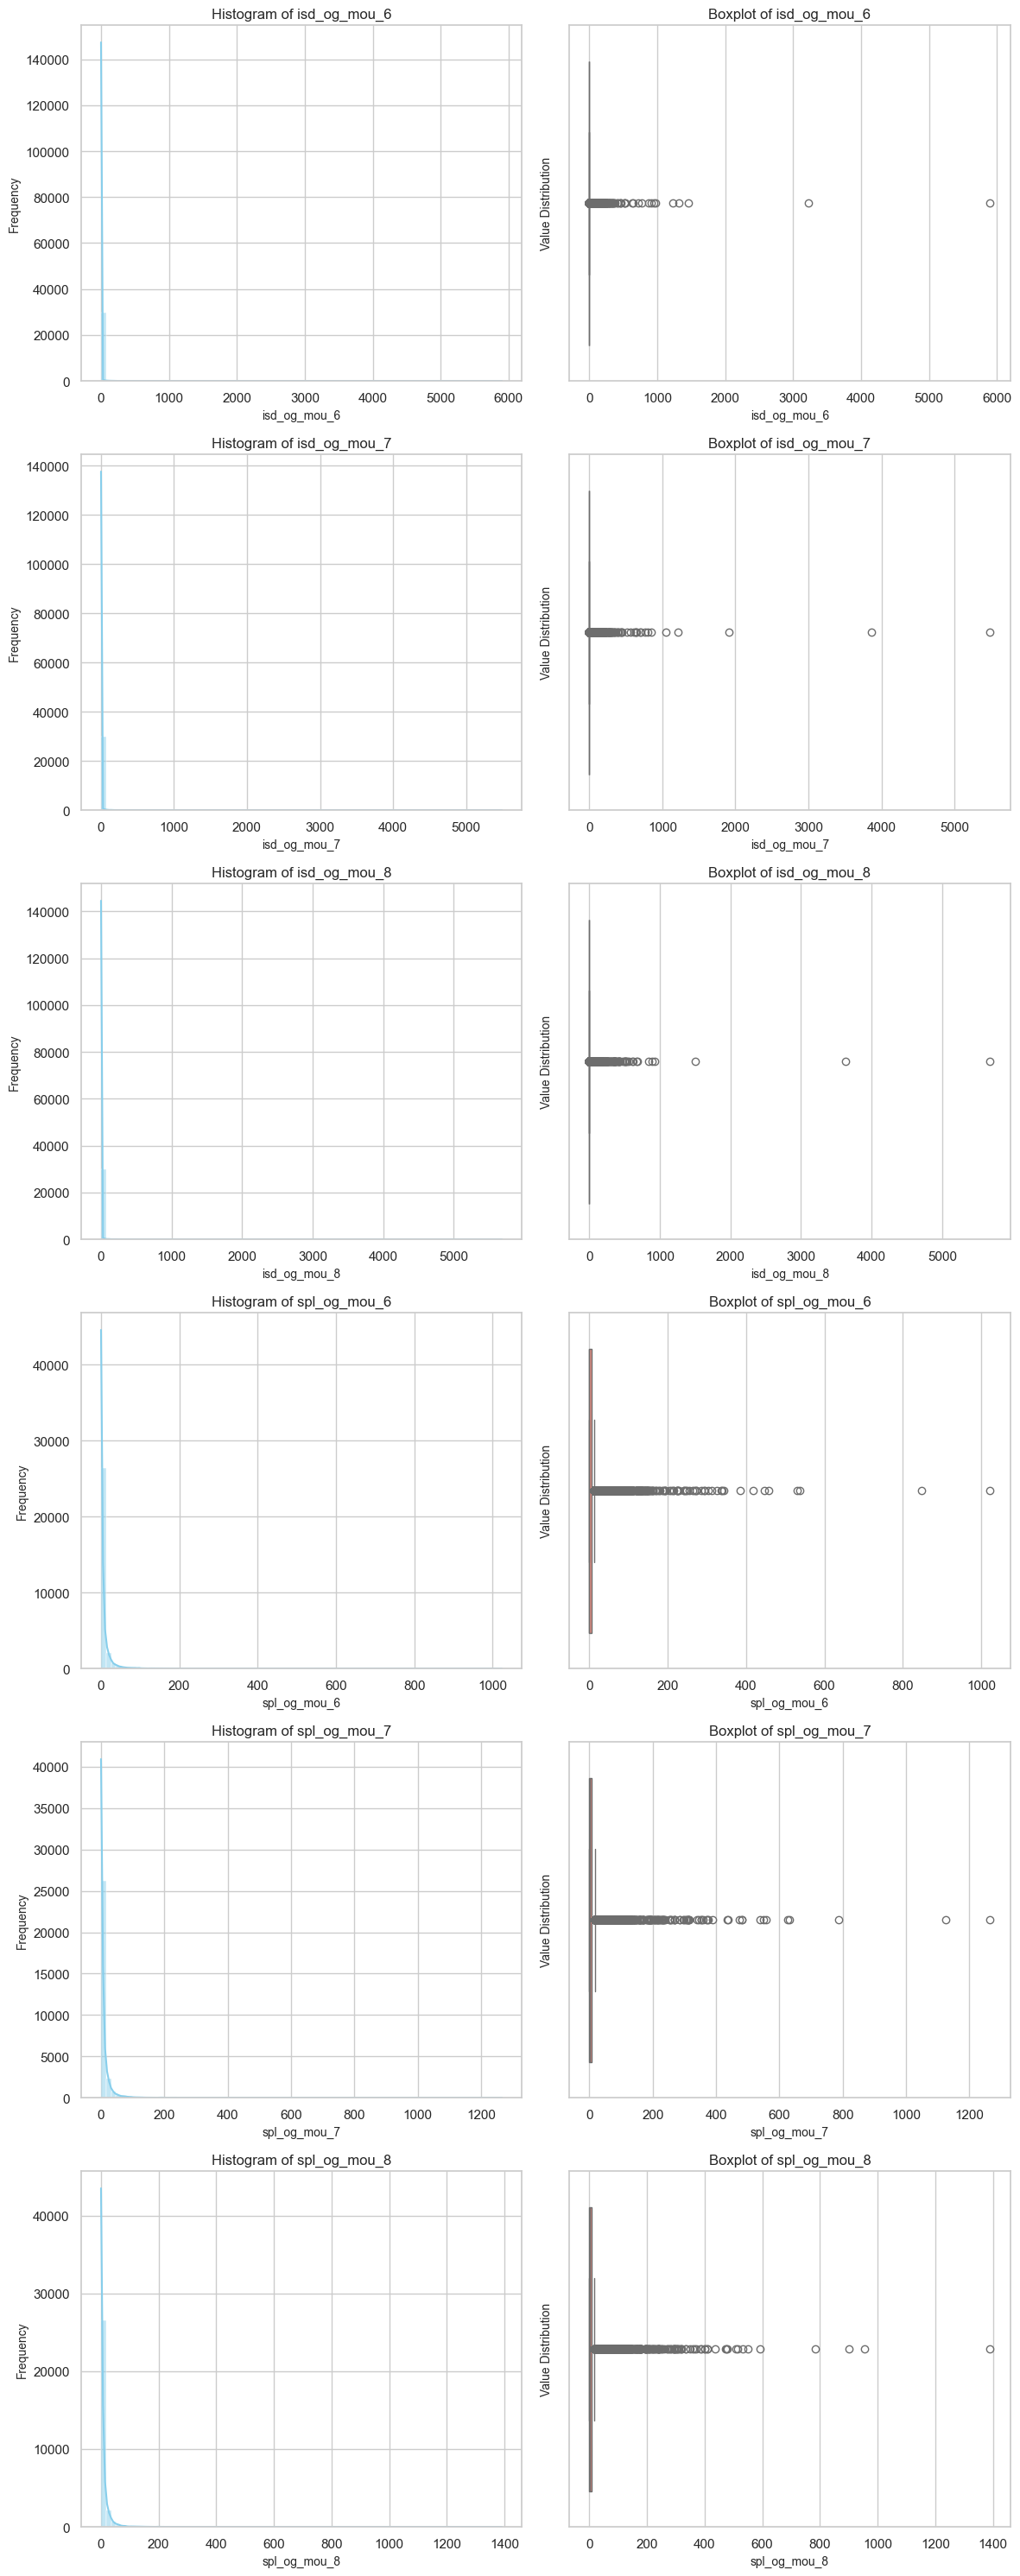

In [44]:
## Special and isd incoming calls
plot_columns = df_final.columns[df_final.columns.str.contains("spl_og|isd_og")]

plot_univariate_analysis(df_final, plot_columns)

### Insights

### **1. International Outgoing Calls (ISD OG MOU)**
- **Features**: `isd_og_mou_6, isd_og_mou_7, isd_og_mou_8`
- **Observations**:
  - The histograms show a **highly skewed distribution**, indicating that **most users make very few or no international calls**.
  - A very small fraction of customers has **high international call volumes**, likely **business users or expatriates**.

### **2. Special Outgoing Calls (SPL OG MOU)**
- **Features**: `spl_og_mou_6, spl_og_mou_7, spl_og_mou_8`
- **Observations**:
  - Similar to ISD calls, special outgoing calls have a **highly skewed** pattern.
  - Most users have **low or no usage**, while a few high-value customers rely on this service.


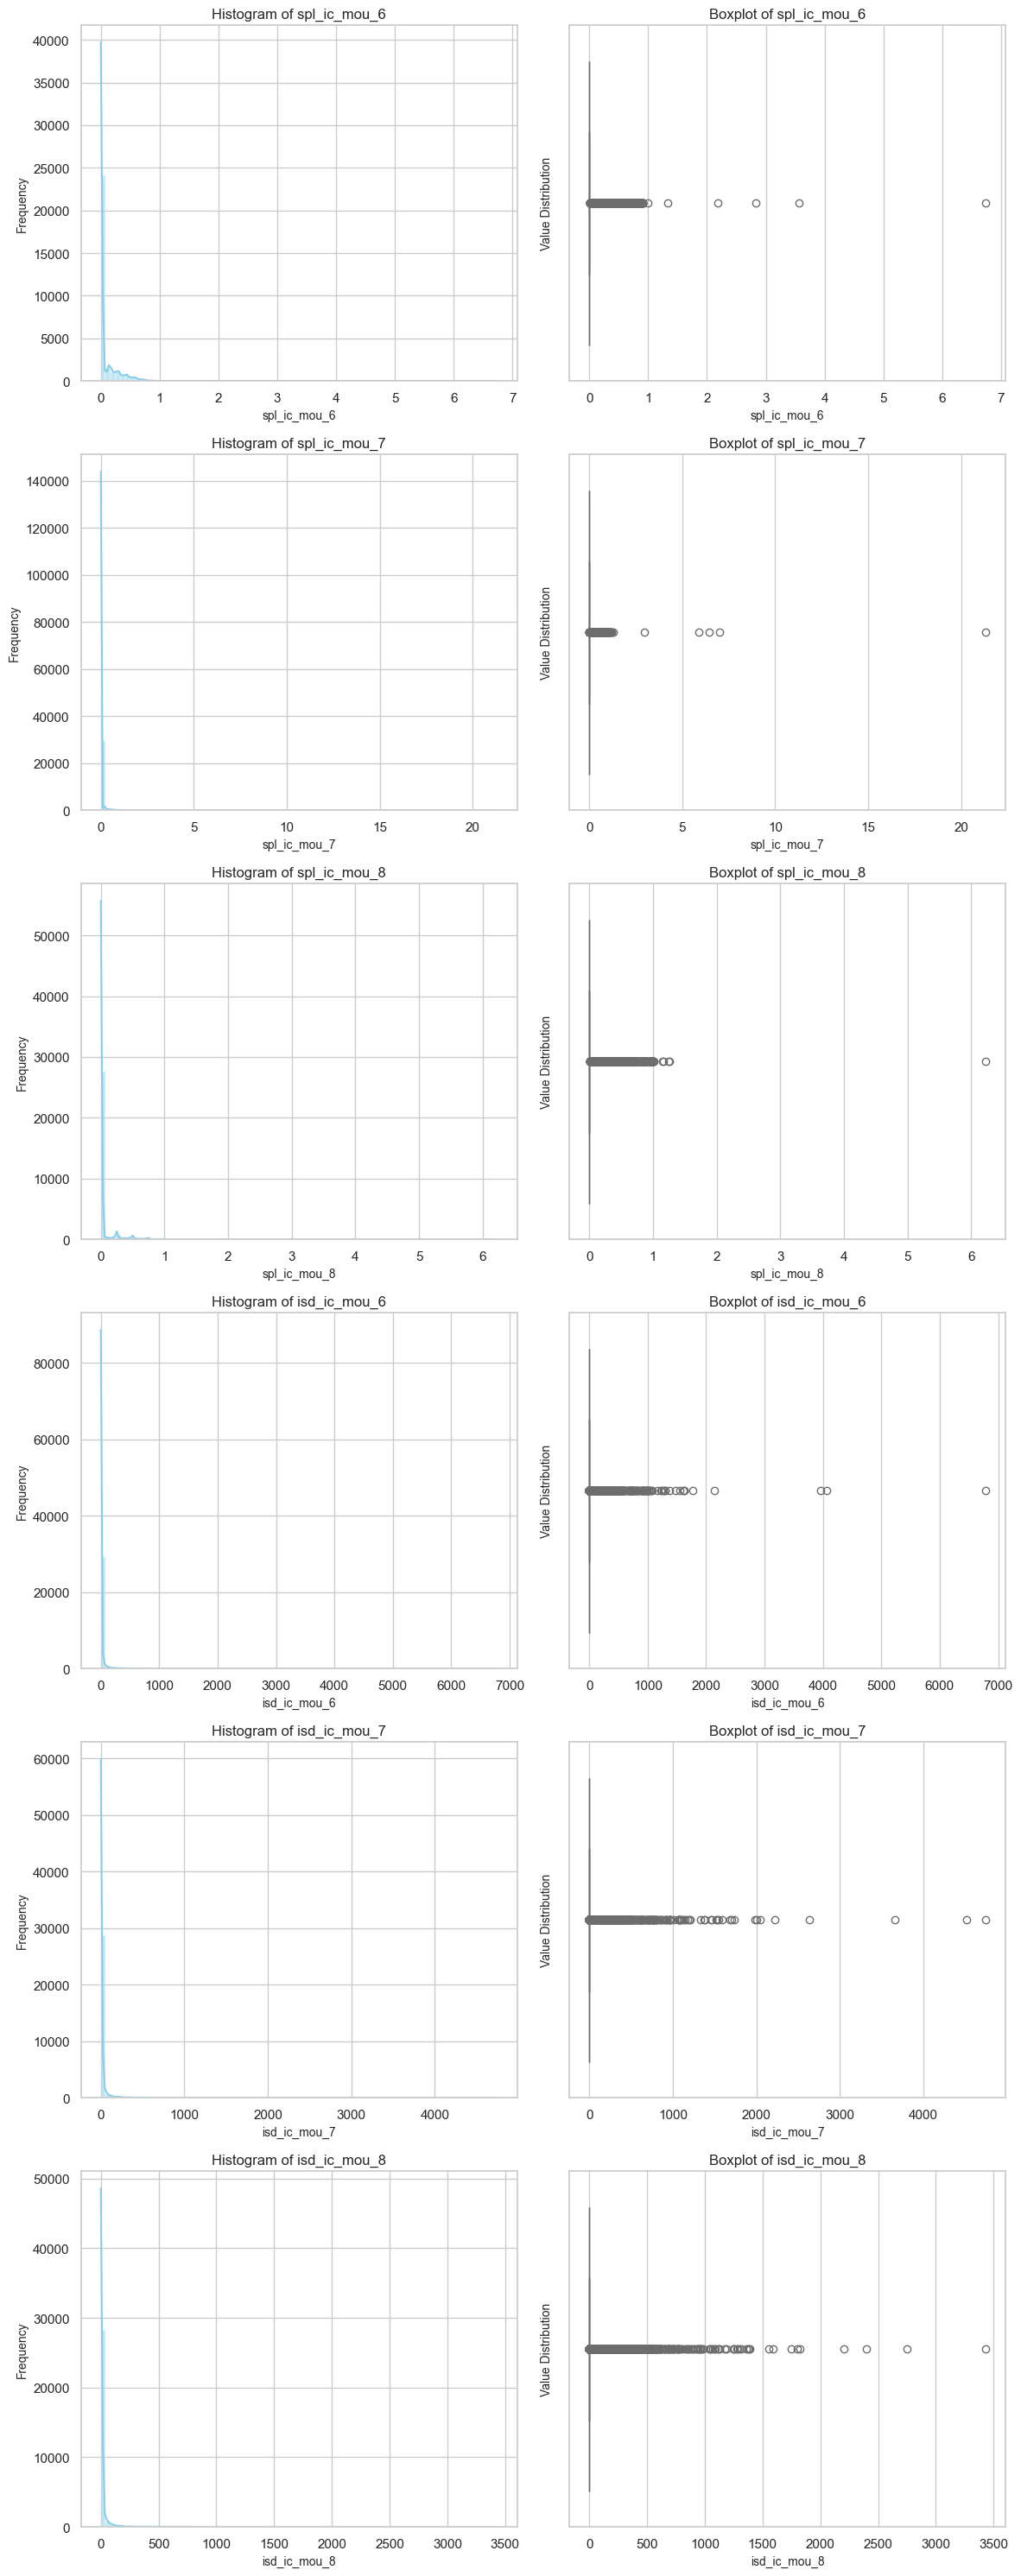

In [45]:
## special and International incoming calls
plot_columns = df_final.columns[df_final.columns.str.contains('spl_ic|isd_ic')]
plot_univariate_analysis(df_final, plot_columns)

### Insights

### **1. Special Incoming Calls (SPL IC MOU)**
- **Features**: `spl_ic_mou_6, spl_ic_mou_7, spl_ic_mou_8`
- **Observations**:
  - The **histograms show extreme right-skewed distribution**, indicating **most users receive few or no special incoming calls**.
  - A **minority of users receive a significant number of these calls**, suggesting a **niche category of users heavily using these services**.
  - The **usage remains low and stable across the months**, indicating **limited adoption**.

### **2. International Incoming Calls (ISD IC MOU)**
- **Features**: `isd_ic_mou_6, isd_ic_mou_7, isd_ic_mou_8`
- **Observations**:
  - **Highly skewed distribution**—most users have **zero or negligible international incoming calls**.
  - A **small proportion of users have high ISD IC minutes**, likely **frequent international business users or expatriates**.
  - There is **no major increase in usage across months**, suggesting a **consistent but small international call user base**.

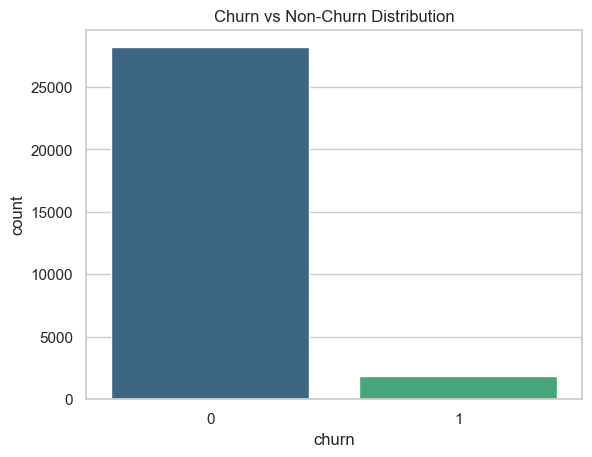

In [46]:
# churn vs Nonchurn 
sns.countplot(x=df_final['churn'], palette='viridis')
plt.title("Churn vs Non-Churn Distribution")
plt.show()

>Very `imbalance` Dataset.

## **Bivaraite Analysis**

In [47]:
def plot_boxplots(df, columns, churn_col='churn'):
    """
    Creates side-by-side boxplots for selected columns (6th, 7th, and 8th month features) with churn differentiation.

    Parameters:
    - df: DataFrame containing the data
    - columns: List of column names to plot
    - churn_col: The column representing churn (default is 'churn')
    """

    # Set plot style
    sns.set(style="whitegrid")
    
    # Set up the subplot grid
    fig, axes = plt.subplots(1, len(columns), figsize=(6 * len(columns), 16), sharey=True)

    # Loop through each selected column and plot side by side
    for i, col in enumerate(columns):
        sns.boxplot(x=churn_col, y=col, data=df, showfliers=False ,palette="Set2", ax=axes[i])
        axes[i].set_title(f'{col} vs Churn', fontsize=12)
        axes[i].set_xlabel('Churn', fontsize=10)
        axes[i].set_ylabel(col if i == 0 else '', fontsize=10)  # Only show y-axis label for the first plot

    plt.tight_layout()
    plt.show()

### Age on Network

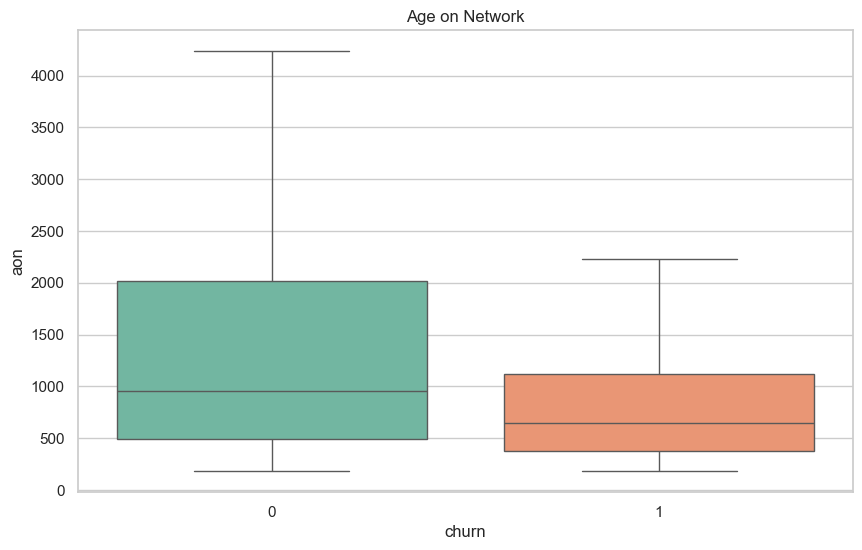

In [48]:
plt.figure(figsize=(10,6))
sns.boxplot(y = df_final['aon'], x = df_final['churn'], data=df_final, palette="Set2",showfliers=False)
plt.title('Age on Network')
plt.xlabel('churn')
plt.ylabel('aon')
plt.show()

### Insights

- **Non Churn Behavior:** people who tend to stick with the service for a long time are lesslikely to churn.It means Old customers are the Gold customers.
- **Churn Behavior:** people with less than 1000 days may churn.

- Lets Understand the `aon` column in terms of years

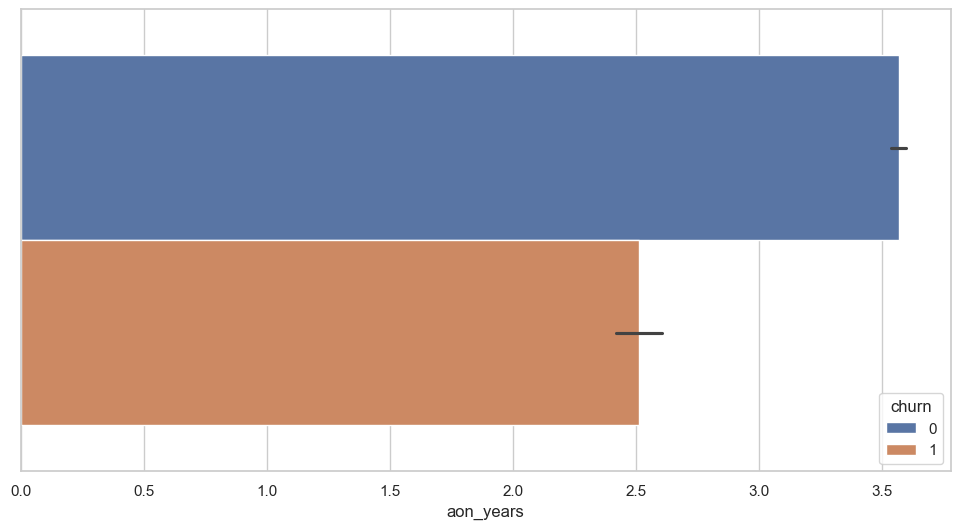

In [49]:
# Convert AON from days to years
df_final['aon_years'] = df_final['aon'] / 365

plt.figure(figsize=(12, 6))
sns.barplot(x='aon_years', data=df_final, hue='churn')
plt.show()

### Insights

Age on network less than 2 years are in the potential category for churning.

Age on network more tgan 3 or 4 years are the loyal customers who arenot likely to churn.

### 2g|3g Usage analysis

In [50]:
plot_columns = df_final.columns[df_final.columns.str.contains('2g|3g', regex=True)]
plot_columns


Index(['vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8', 'vol_3g_mb_6',
       'vol_3g_mb_7', 'vol_3g_mb_8', 'monthly_2g_6', 'monthly_2g_7',
       'monthly_2g_8', 'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8',
       'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6',
       'sachet_3g_7', 'sachet_3g_8', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g'],
      dtype='object')

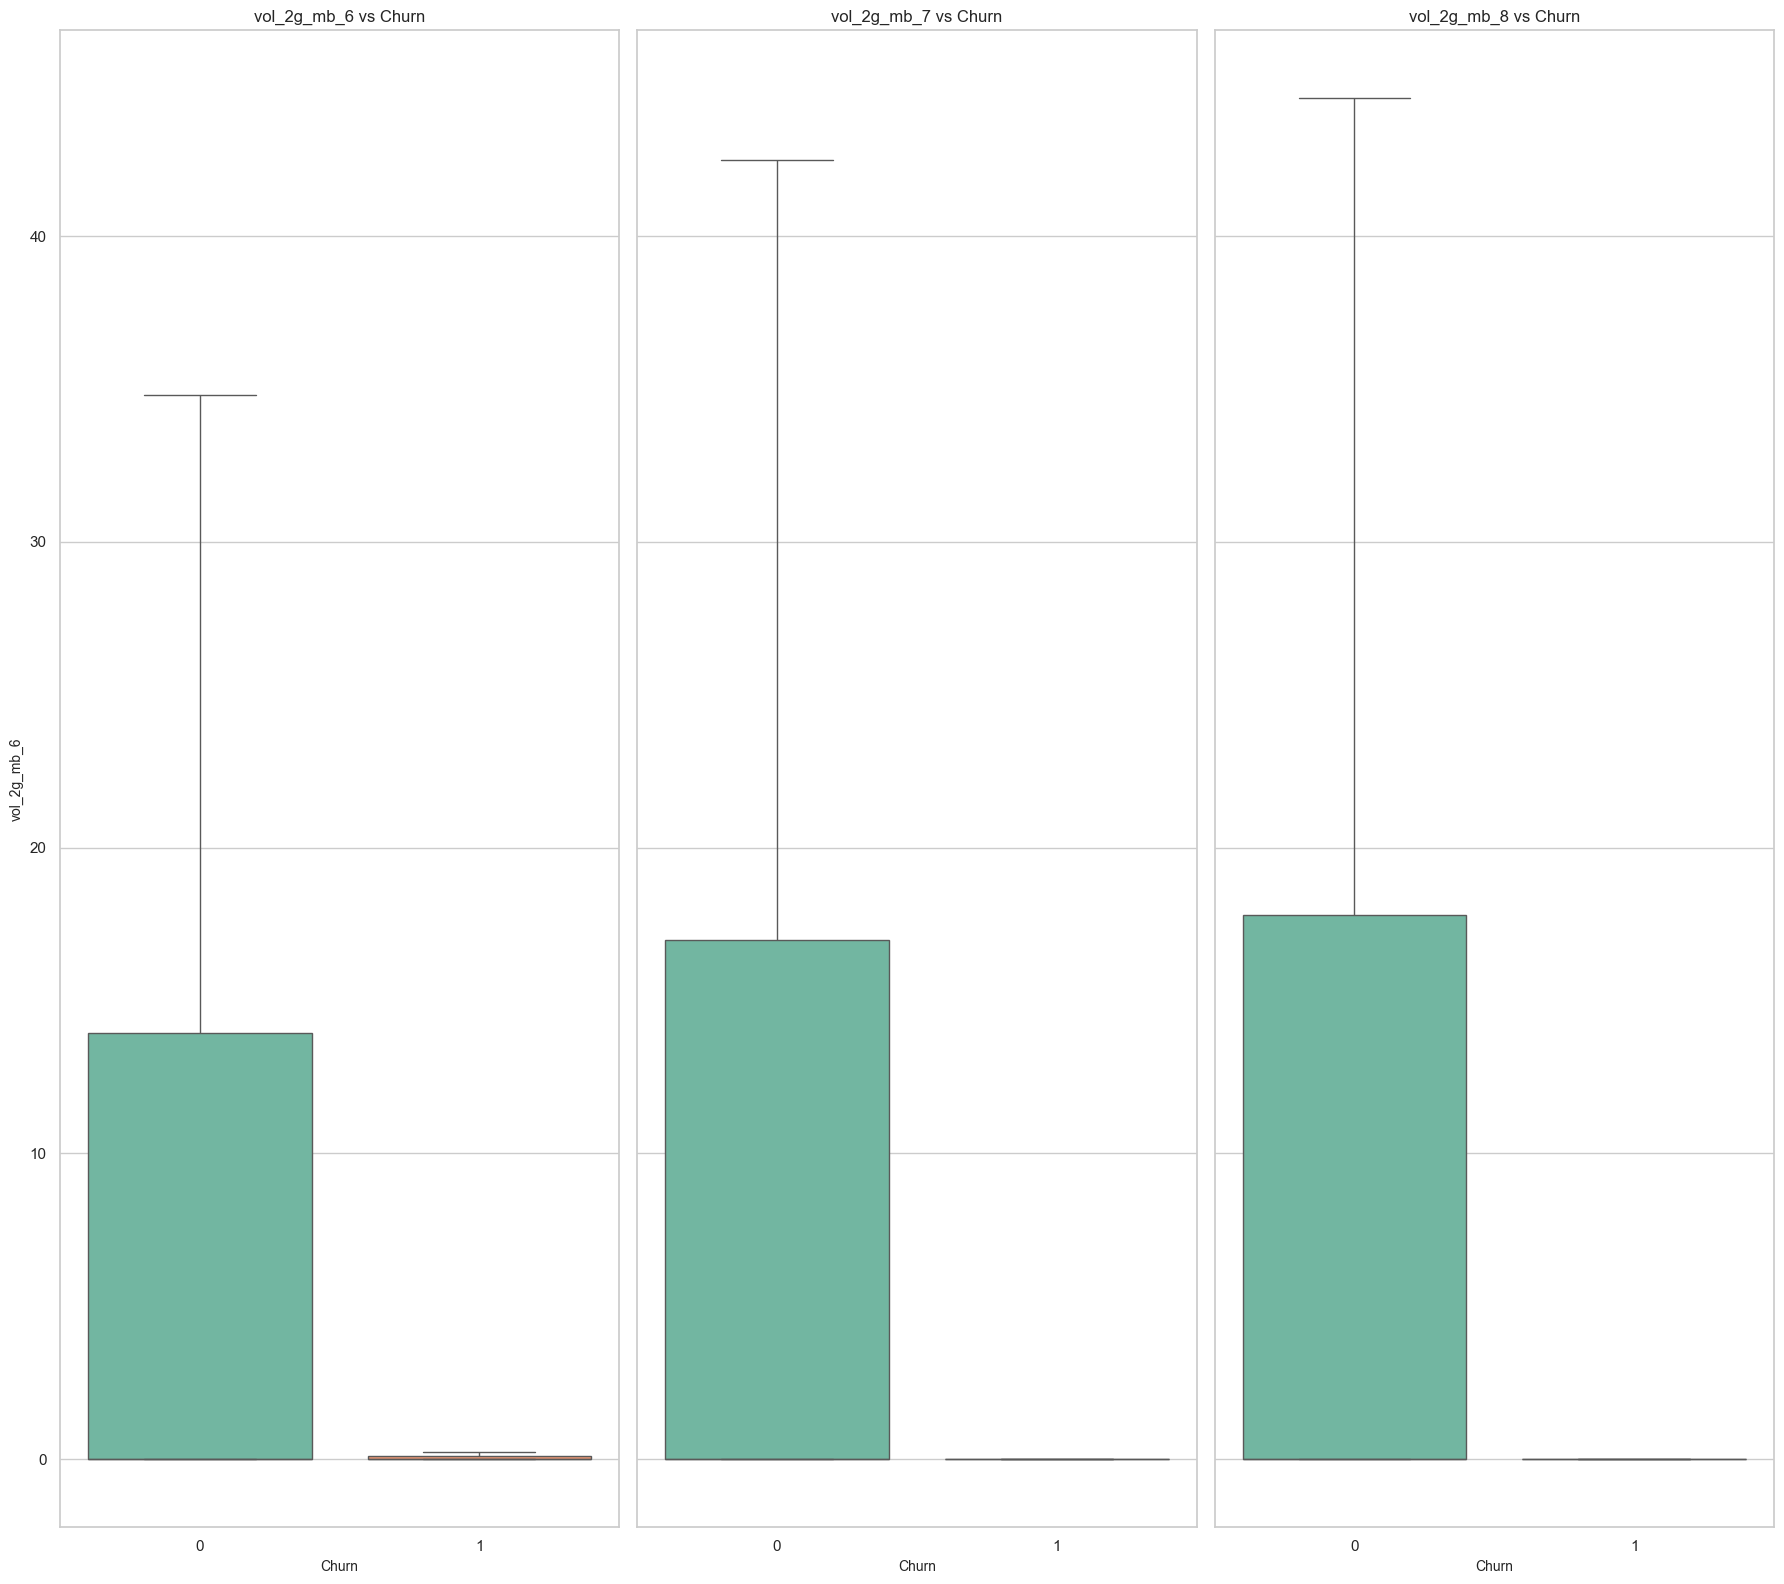

In [51]:
plot_boxplots(df_final, plot_columns[:3])

### Insight

- **`2G Data Usae`**:
    - **Non-churned customers:**Shows significantly higher 2G data usage consistently across all three months.
    - **Churned Customers:**Exhibit near Zero 2G data usage throughout. this sharp contrast indicates a strong correlation between low data usage and churn behavior.


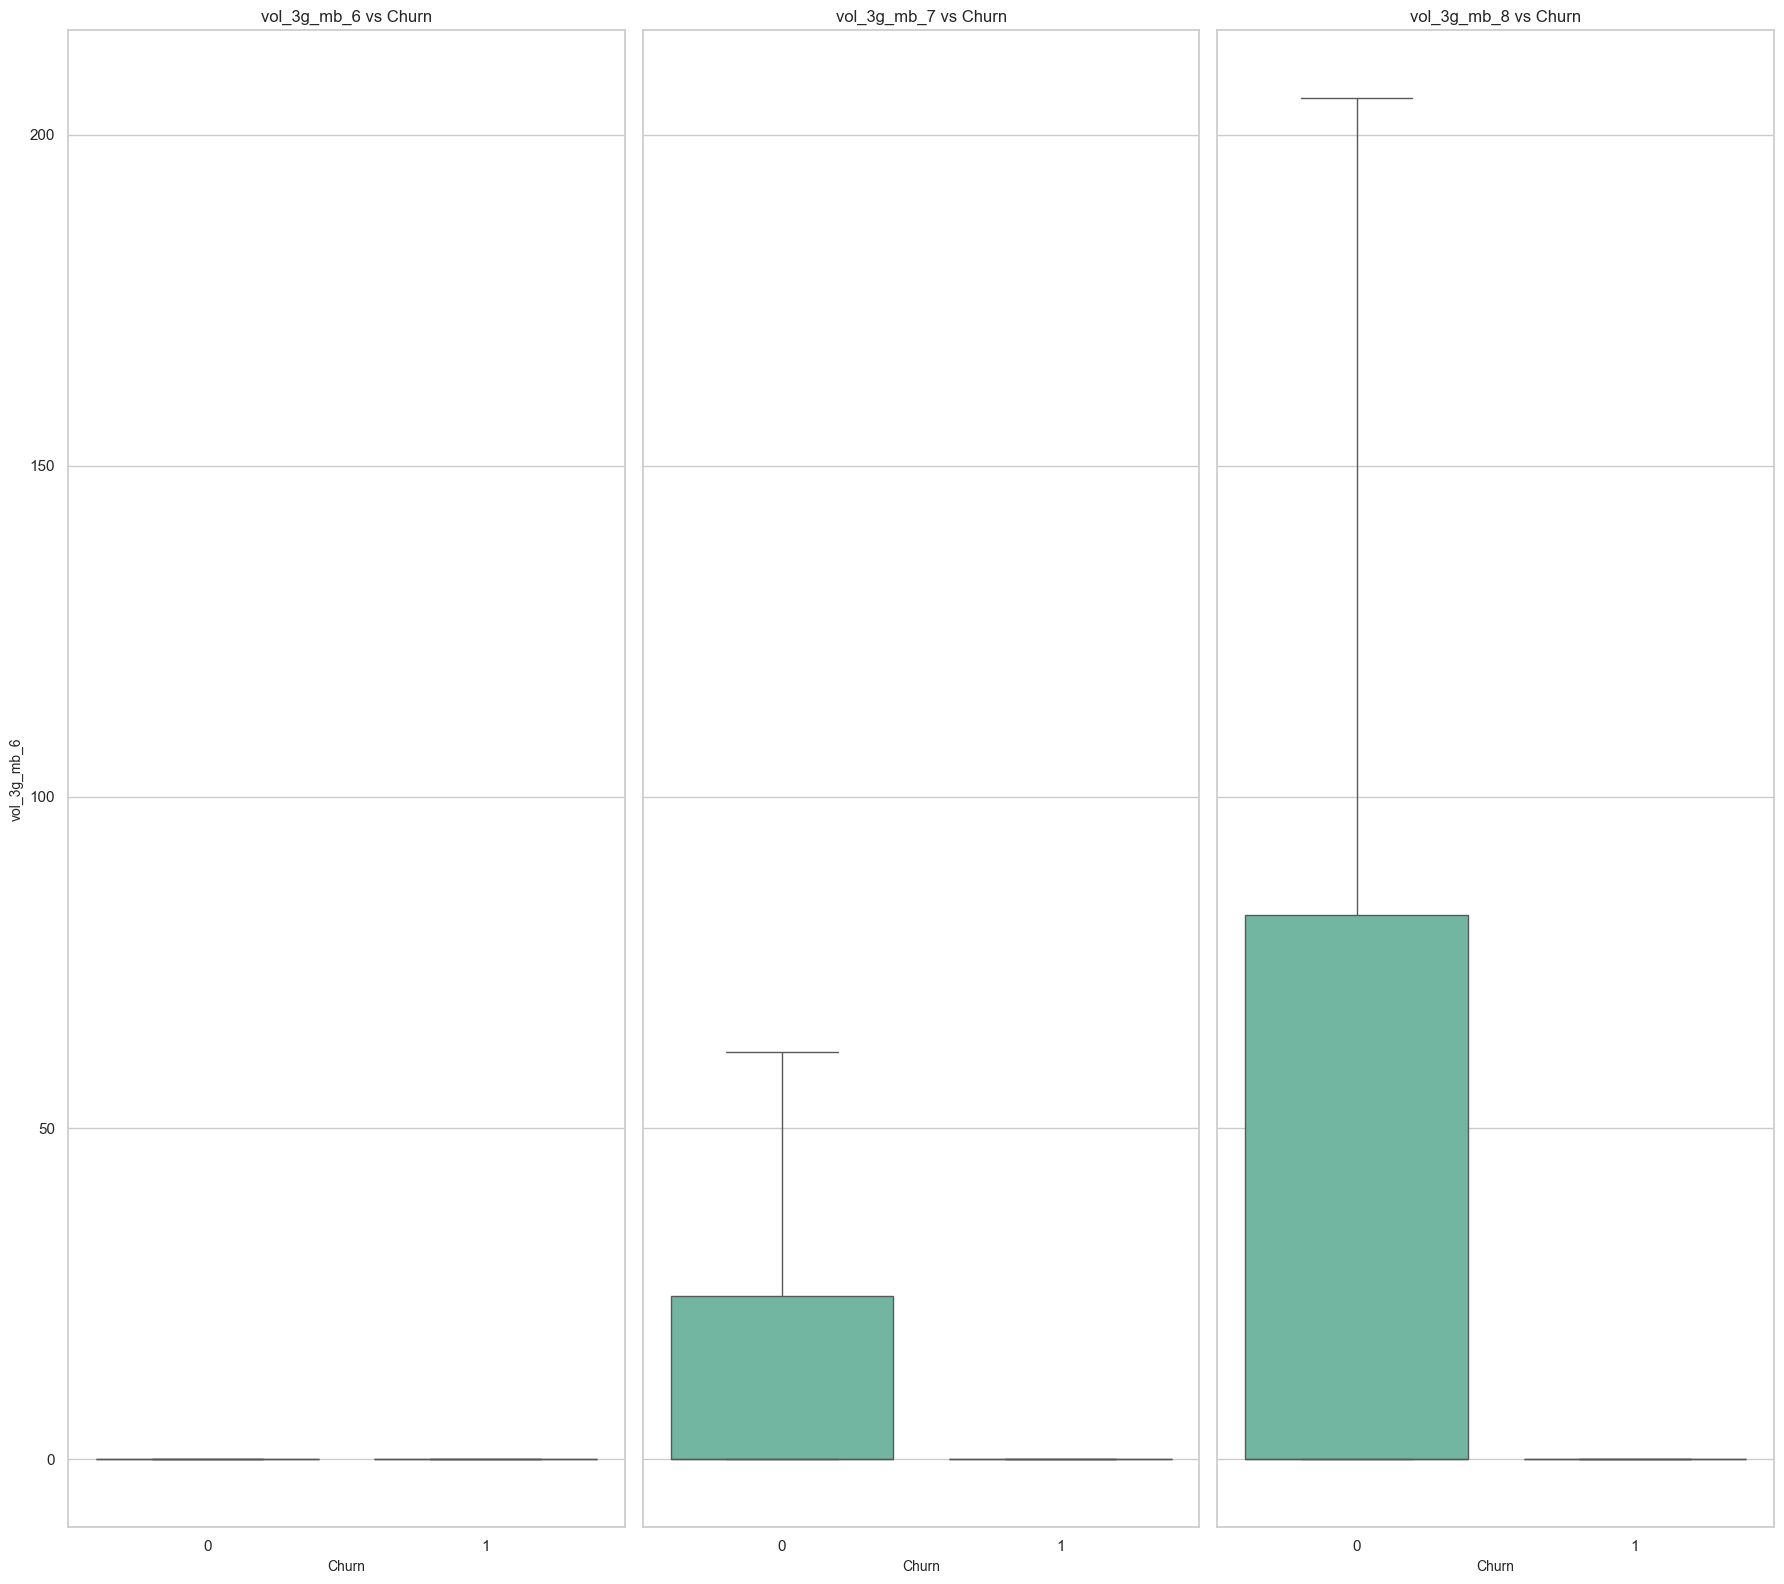

In [52]:
plot_boxplots(df_final, plot_columns[3:6])

### Insight

- **`3G Data Usae`**:
    - **Non-churned customers:** It can be seen clearly that the non churned customers tend to use 3g data more. it may be near zero in june but its increasing for the following months.
    - **Churned Customers:** For the churned customers it is clearly concluded that people who churn are tend to use less data.
    


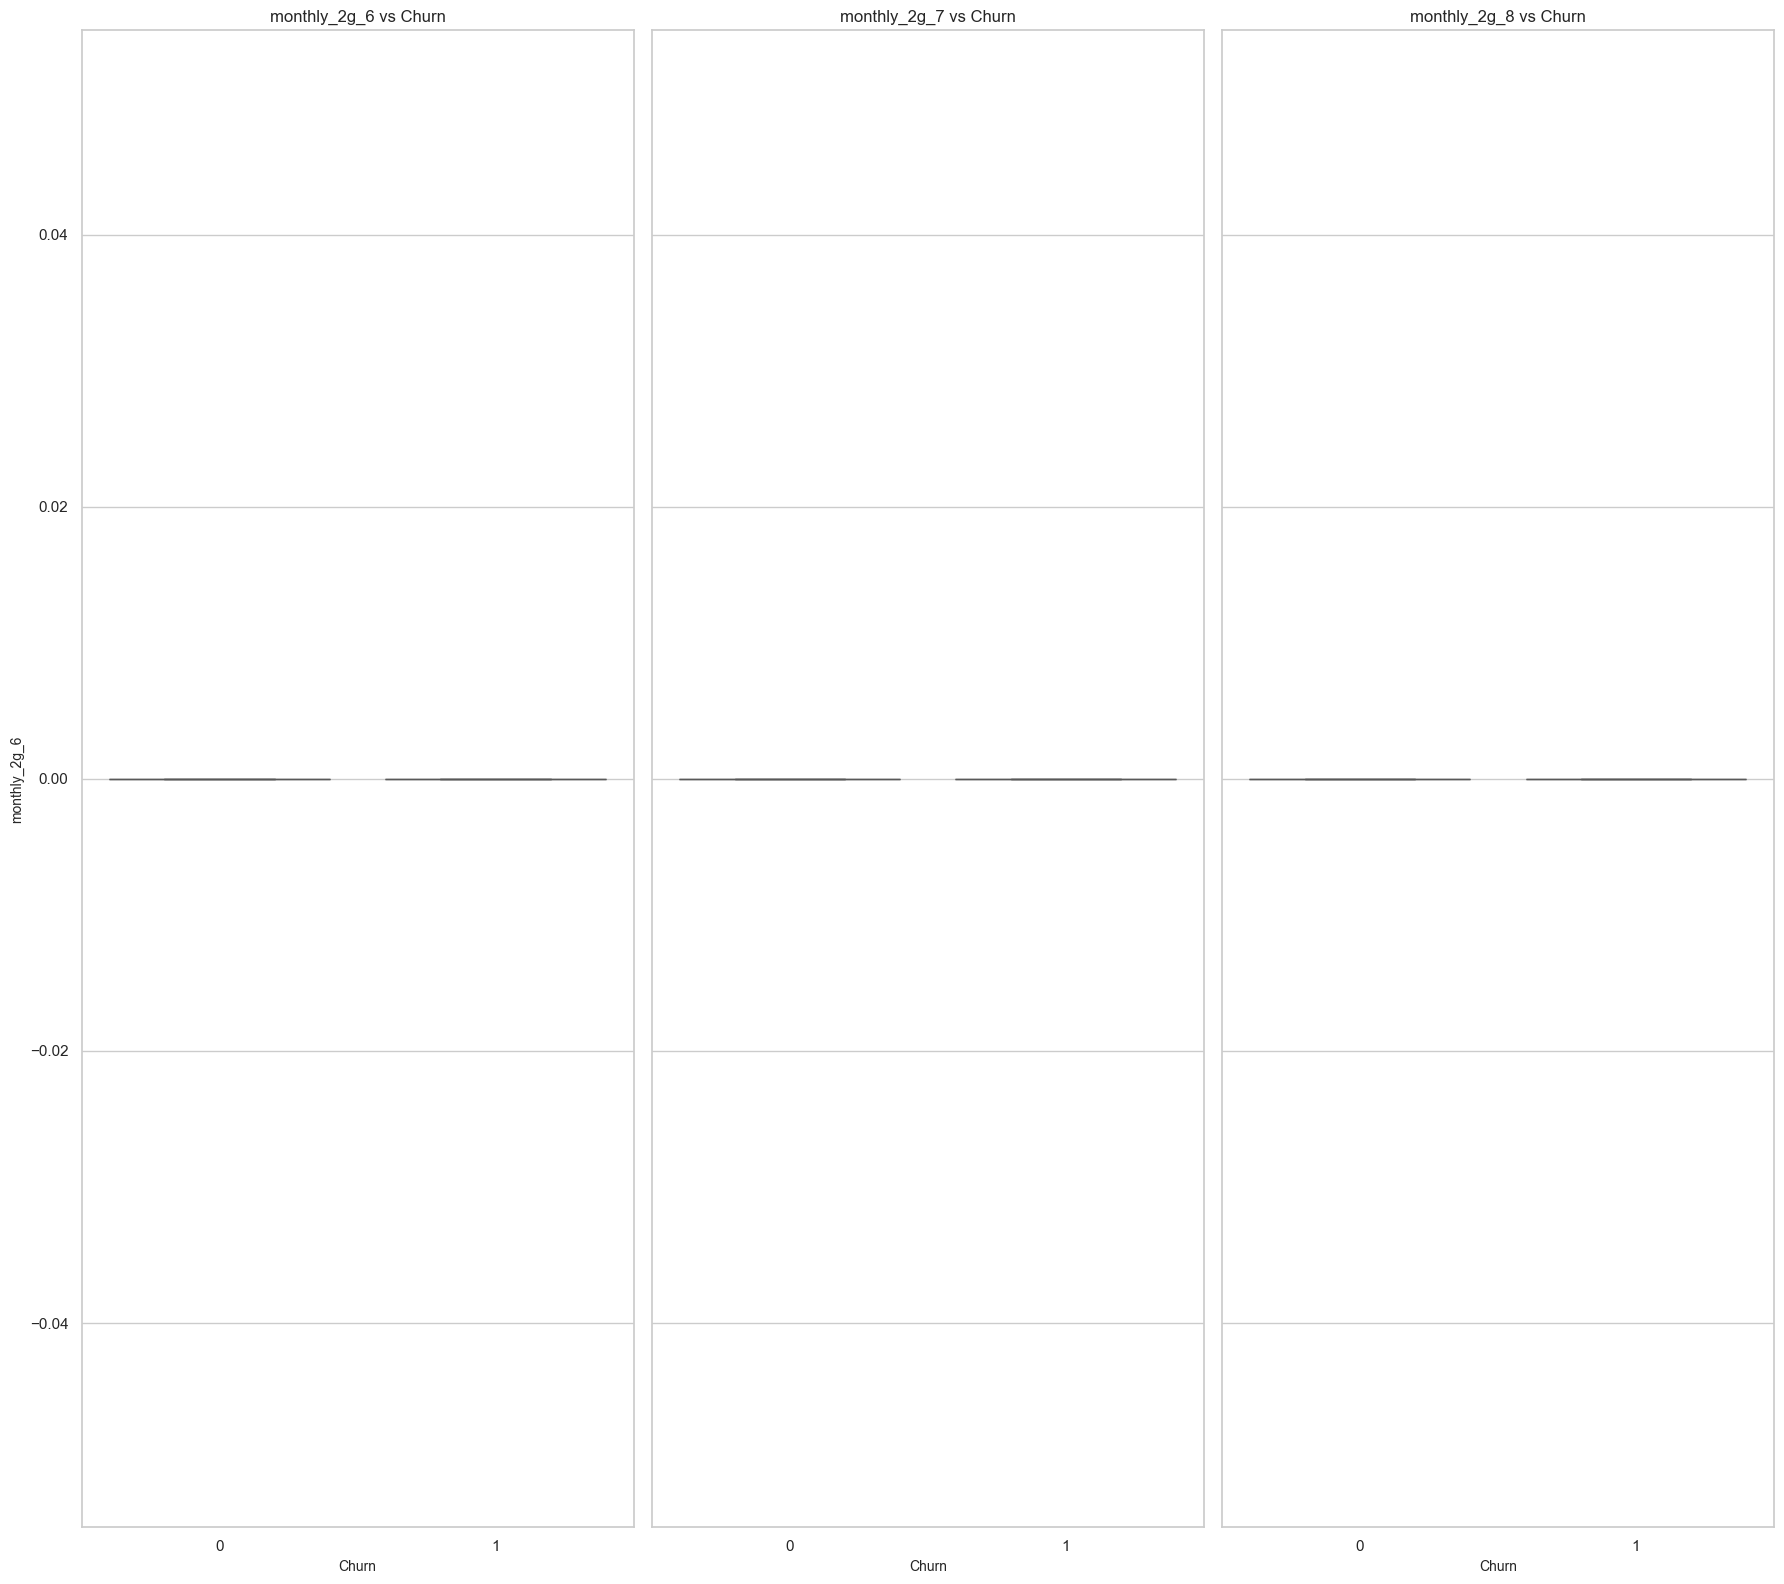

In [53]:
plot_boxplots(df_final, plot_columns[6:9])

Value range is very low, bar chart cannot able to provide the result

Therefore we will calculater the mean and plot it in the bar graph

<Figure size 1000x600 with 0 Axes>

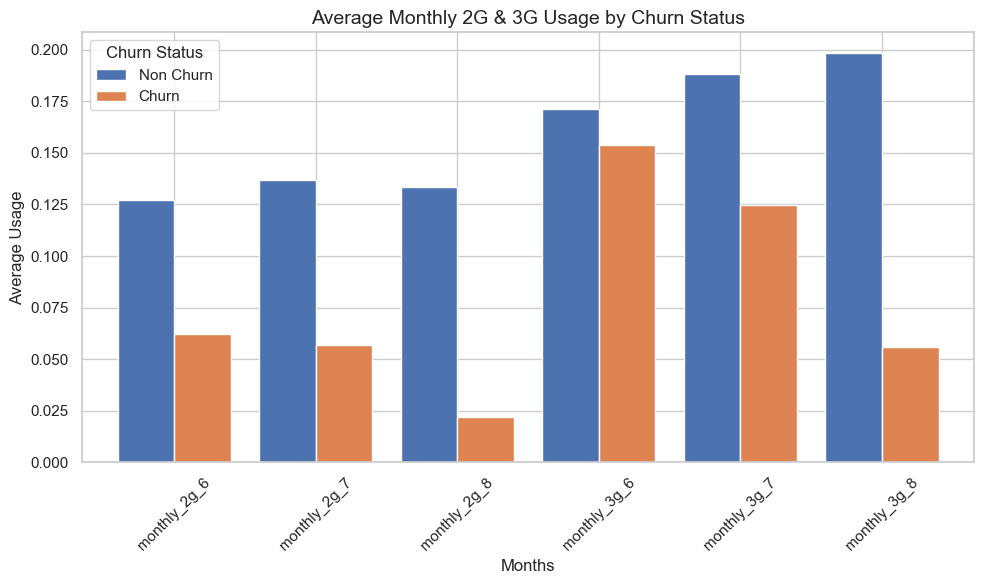

In [54]:
mean_cols = ['monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 
           'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8']

# Grouping by 'churn' and calculating the mean
mean_values = df_final.groupby('churn')[mean_cols].mean()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
mean_values.T.plot(kind='bar', figsize=(10, 6), width=0.8)

# Customizing the plot
plt.title('Average Monthly 2G & 3G Usage by Churn Status', fontsize=14)
plt.xlabel('Months', fontsize=12)
plt.ylabel('Average Usage', fontsize=12)
plt.xticks(rotation=45)
plt.legend(['Non Churn', 'Churn'], title='Churn Status')

# Display the plot
plt.tight_layout()
plt.show()

### Insights

- **Non Churn Behavior:** considerably more Data Usage  and steady usage over 3 months, people prefer 3G more than 2G. 

- **Churn Behavior:** Considerably less data usage compared to non churners which shows us that less usage of internet is a strong predictor for churn, also it is to be noted that in month 8 the internet usage decreases quite a much, now we can easily conclude the customers are indicating of not continuing with the service.

<Figure size 1000x600 with 0 Axes>

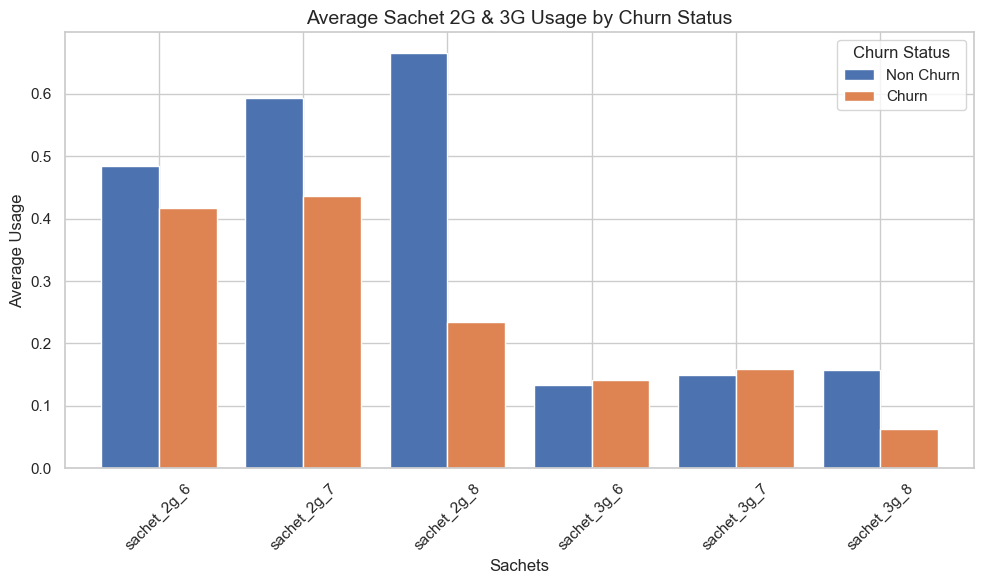

In [55]:
mean_cols = ['sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', 
           'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8']

# Grouping by 'churn' and calculating the mean
mean_values = df_final.groupby('churn')[mean_cols].mean()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
mean_values.T.plot(kind='bar', figsize=(10, 6), width=0.8)

# Customizing the plot
plt.title('Average Sachet 2G & 3G Usage by Churn Status', fontsize=14)
plt.xlabel('Sachets', fontsize=12)
plt.ylabel('Average Usage', fontsize=12)
plt.xticks(rotation=45)
plt.legend(['Non Churn', 'Churn'], title='Churn Status')

# Display the plot
plt.tight_layout()
plt.show()

### Insights

- **Non churn behavior:** Consistently higher usage of 2G sachets (sachet_2g_6, sachet_2g_7, sachet_2g_8), especially peaking in month 8. Although 3G sachet usage is lower overall, it remains relatively steady across all months.

- **Churn Behavior:** Noticeable decline in sachet_2g_8, indicating reduced engagement as they approach churn. sachet_3g_6 and sachet_3g_7 usage is slightly higher than non-churned customers, possibly indicating trial behavior before deciding to churn.
Significant drop in month 8, reinforcing that they’ve likely disengaged from the network completely by then.


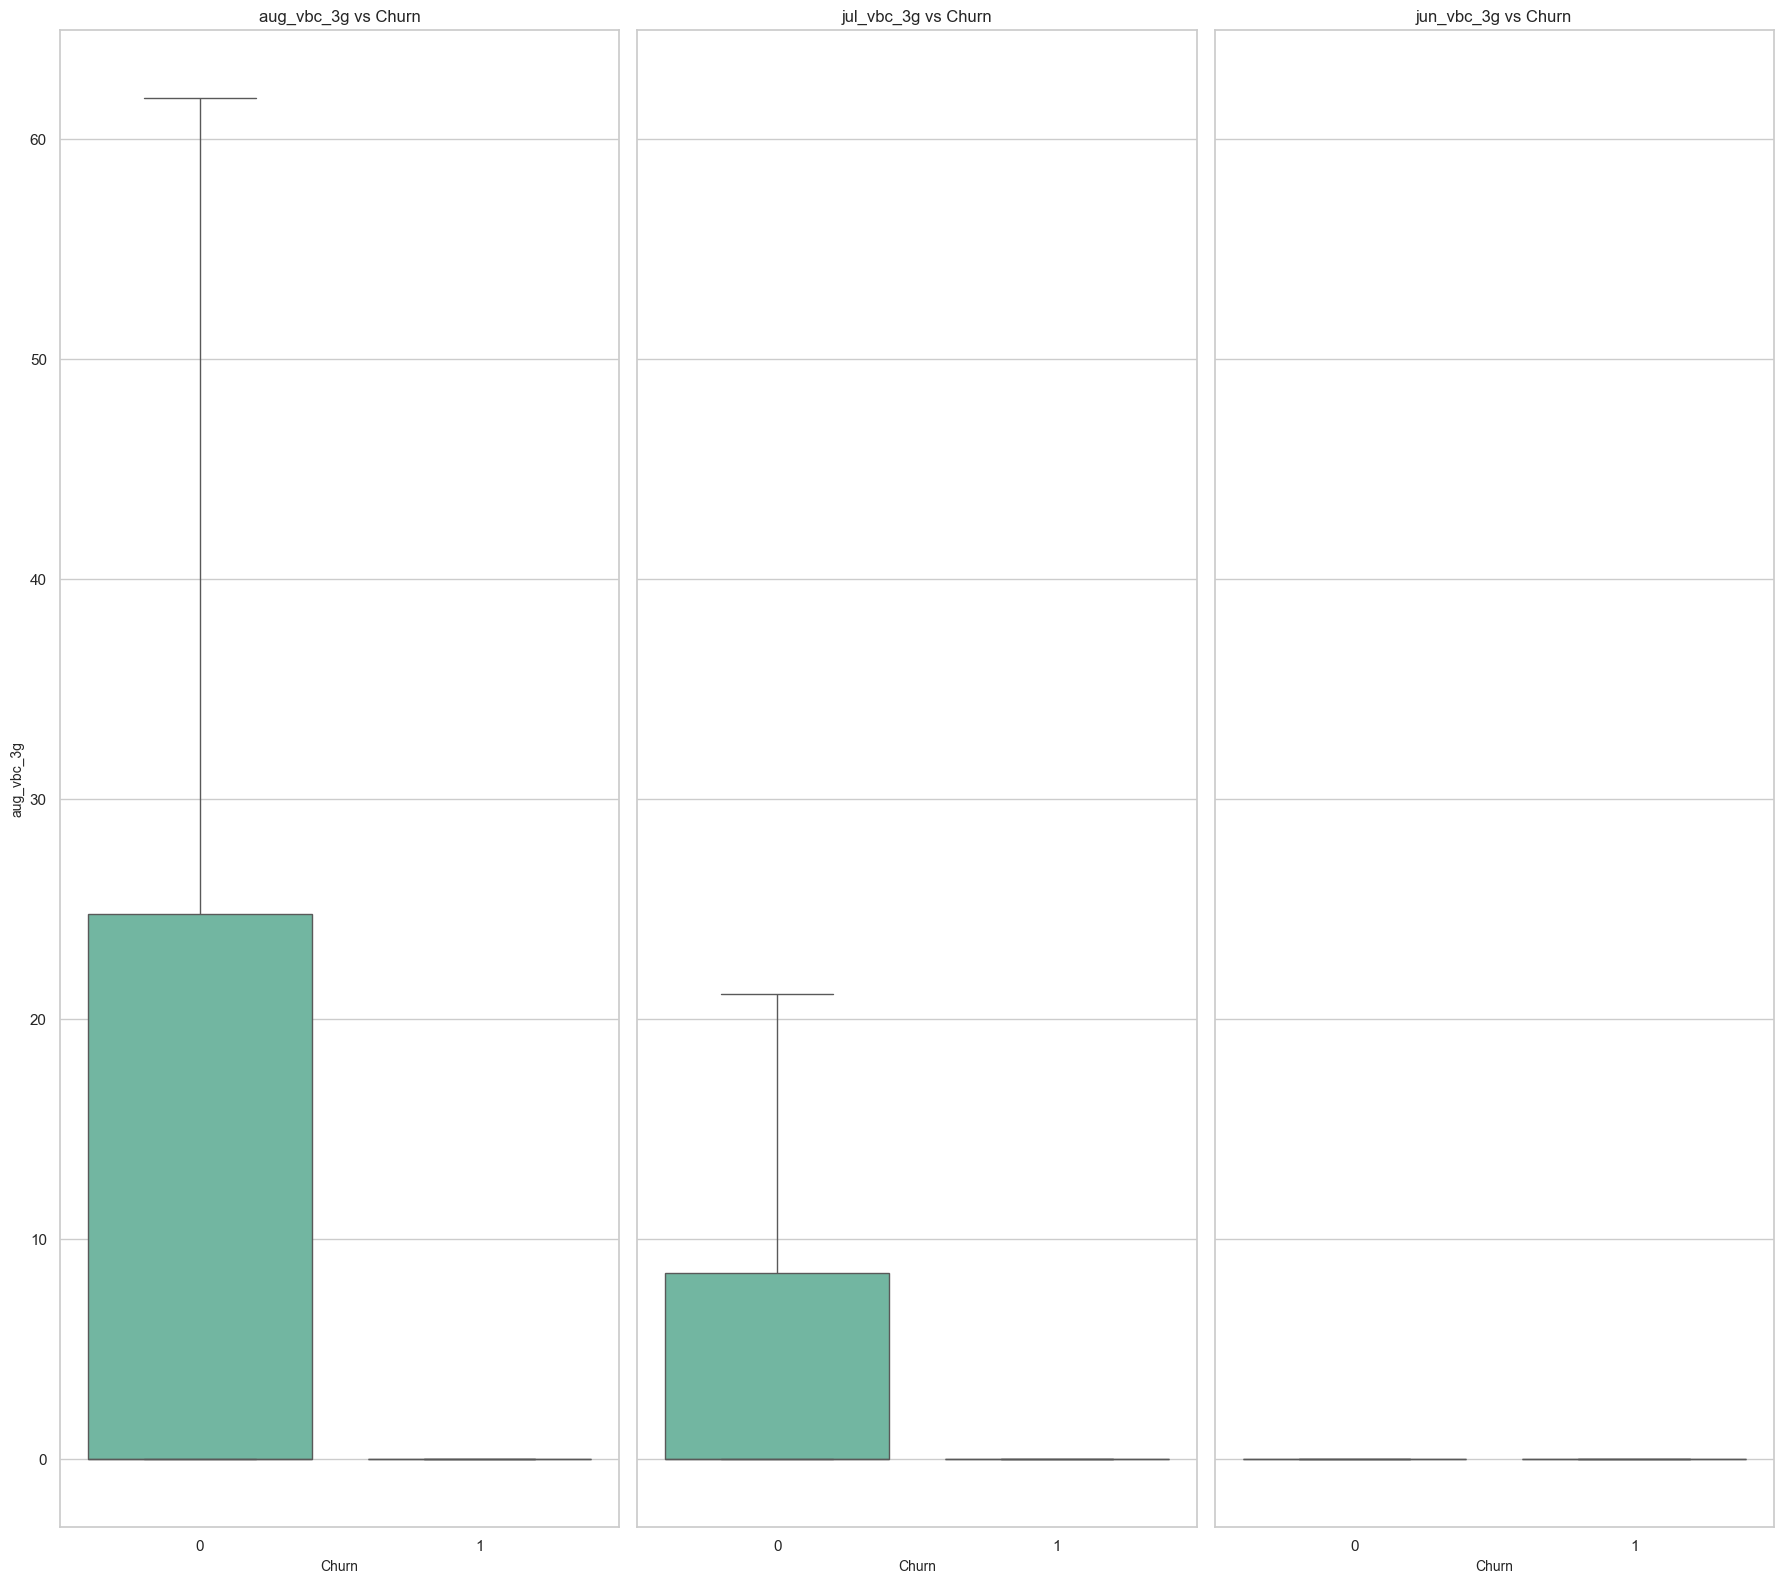

In [56]:
plot_boxplots(df_final, plot_columns[18:])

### Insights 

- **Non churn behavior:** Non churned customers tend to use 3G actively
- **Churn behavior:** Churned customers do not tend to actively use 3G actively concluding that it is a strong predictor for the customers who will churn and who will not.

### Recharge Amount

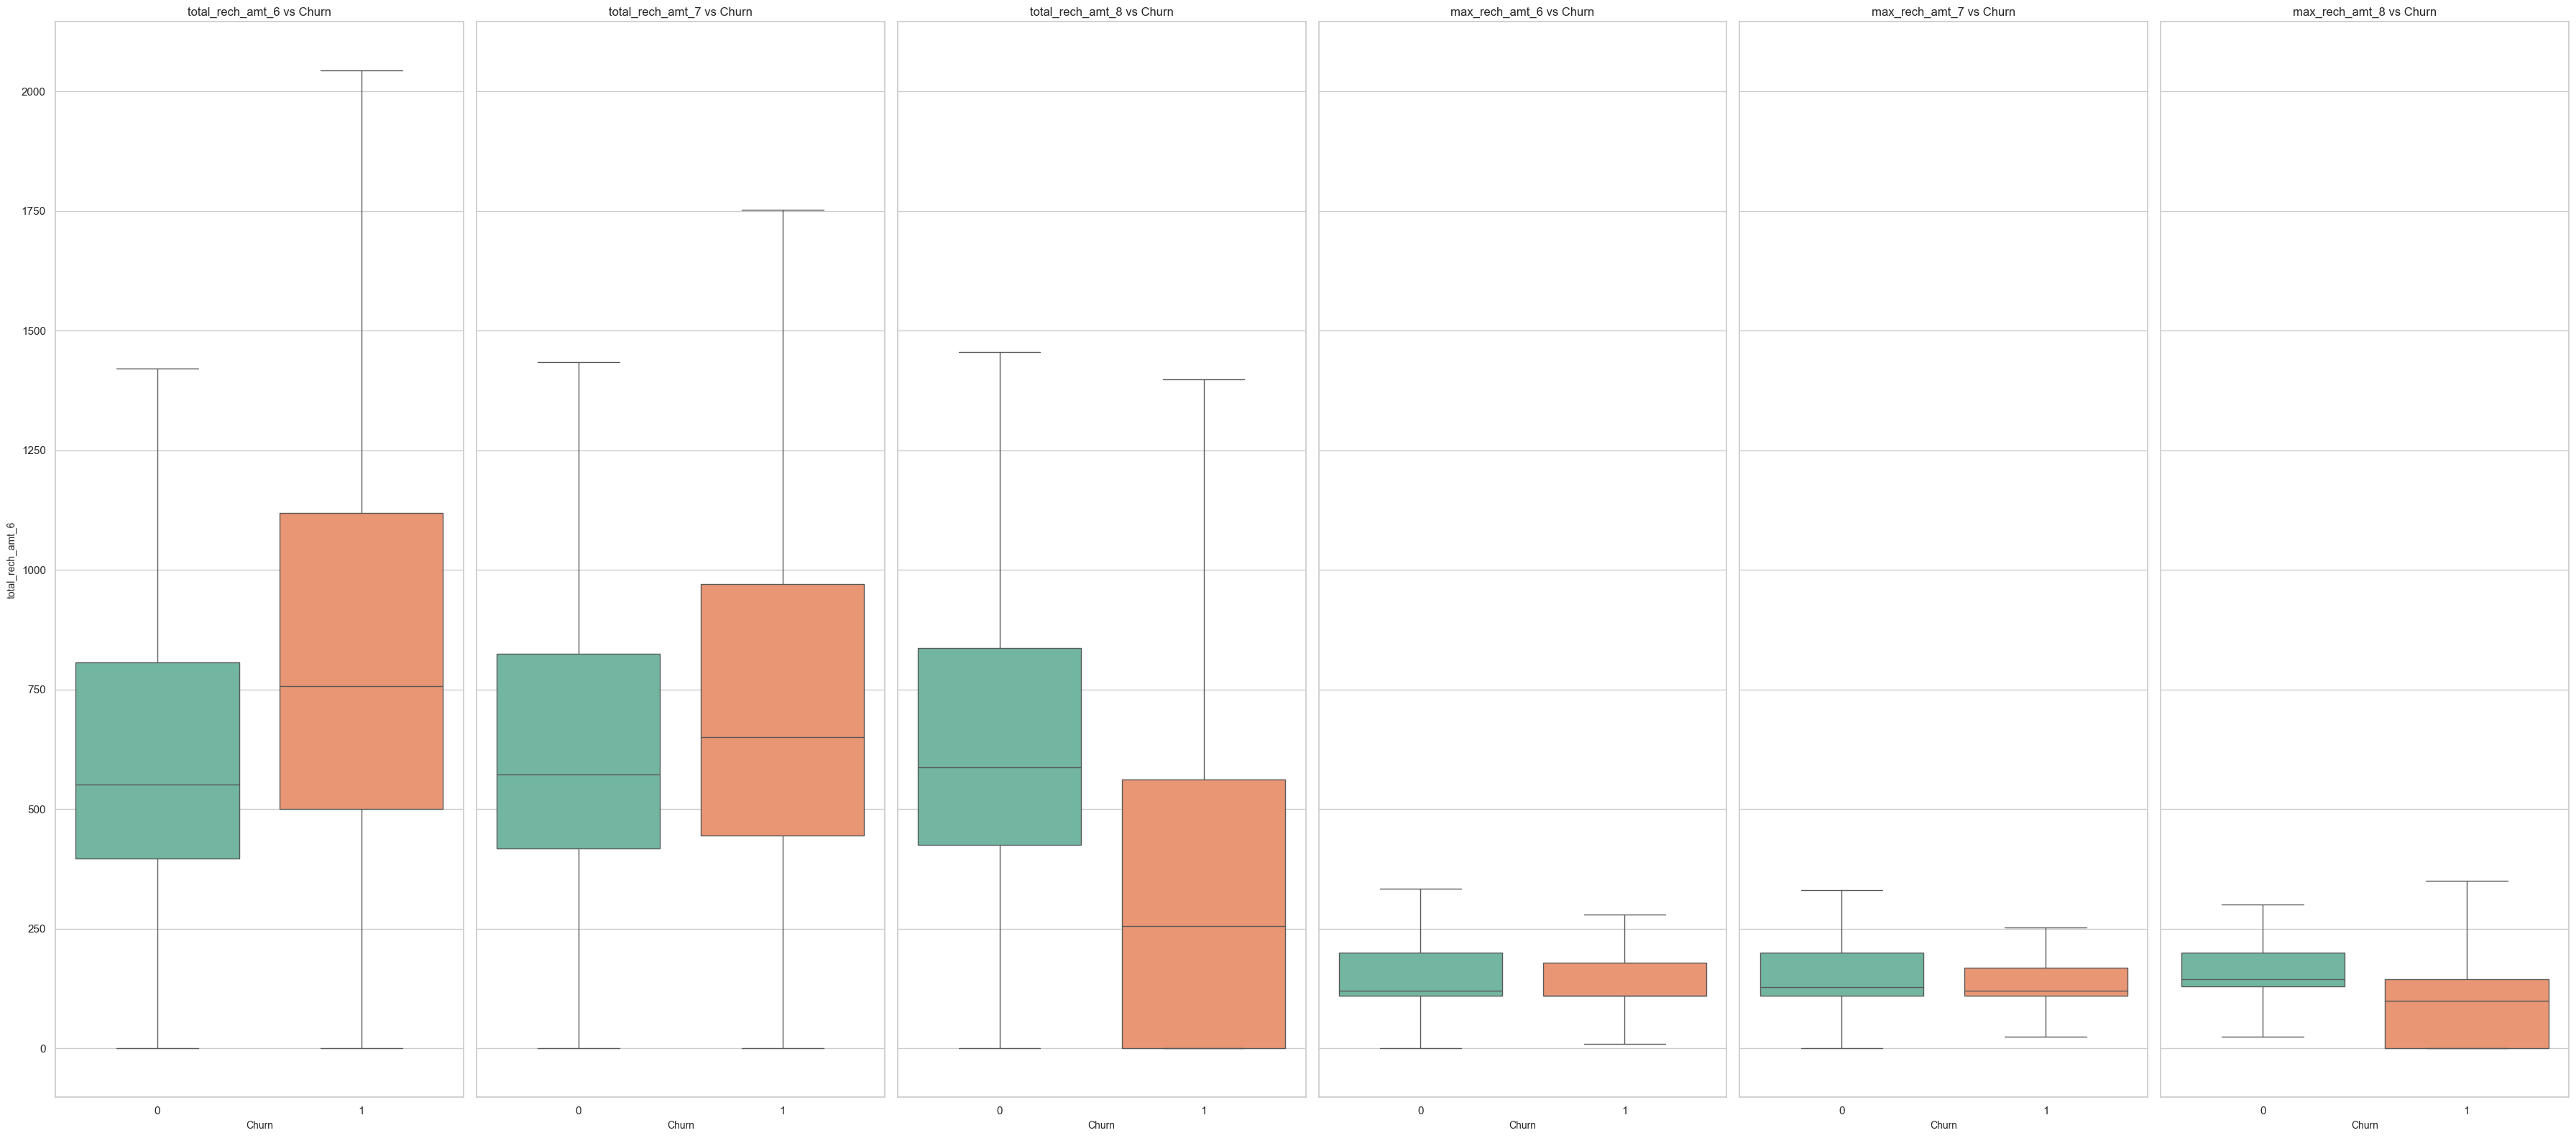

In [57]:
plot_columns = df_final.columns[df_final.columns.str.contains('rech_amt')]
plot_boxplots(df_final, plot_columns)

### **Key Takeaways:**
- **`Total Recharge Amount (June,July, August)`**
    - `june & July`: Customers who churned (churn = 1) had a higher median recharge amounts compared to non-churned users. This suggest that even though these customers were spending more initially, they might left
    - `August`: A drstic drop in recharge, Many churned users have near-zero recharge, indicating the beginning of churn behavior.

- **`Maximum Recharge Amount(June, July, August)`**
    - `June & July:` Churned customers show lower maximum recharge amounts compared to non-churned users across all three months.
    - `August :` Churned customers have the lowest maximum recharge values, reinforcing the fact that disengagement starts before the actual churn.


## Average Revenue Per user

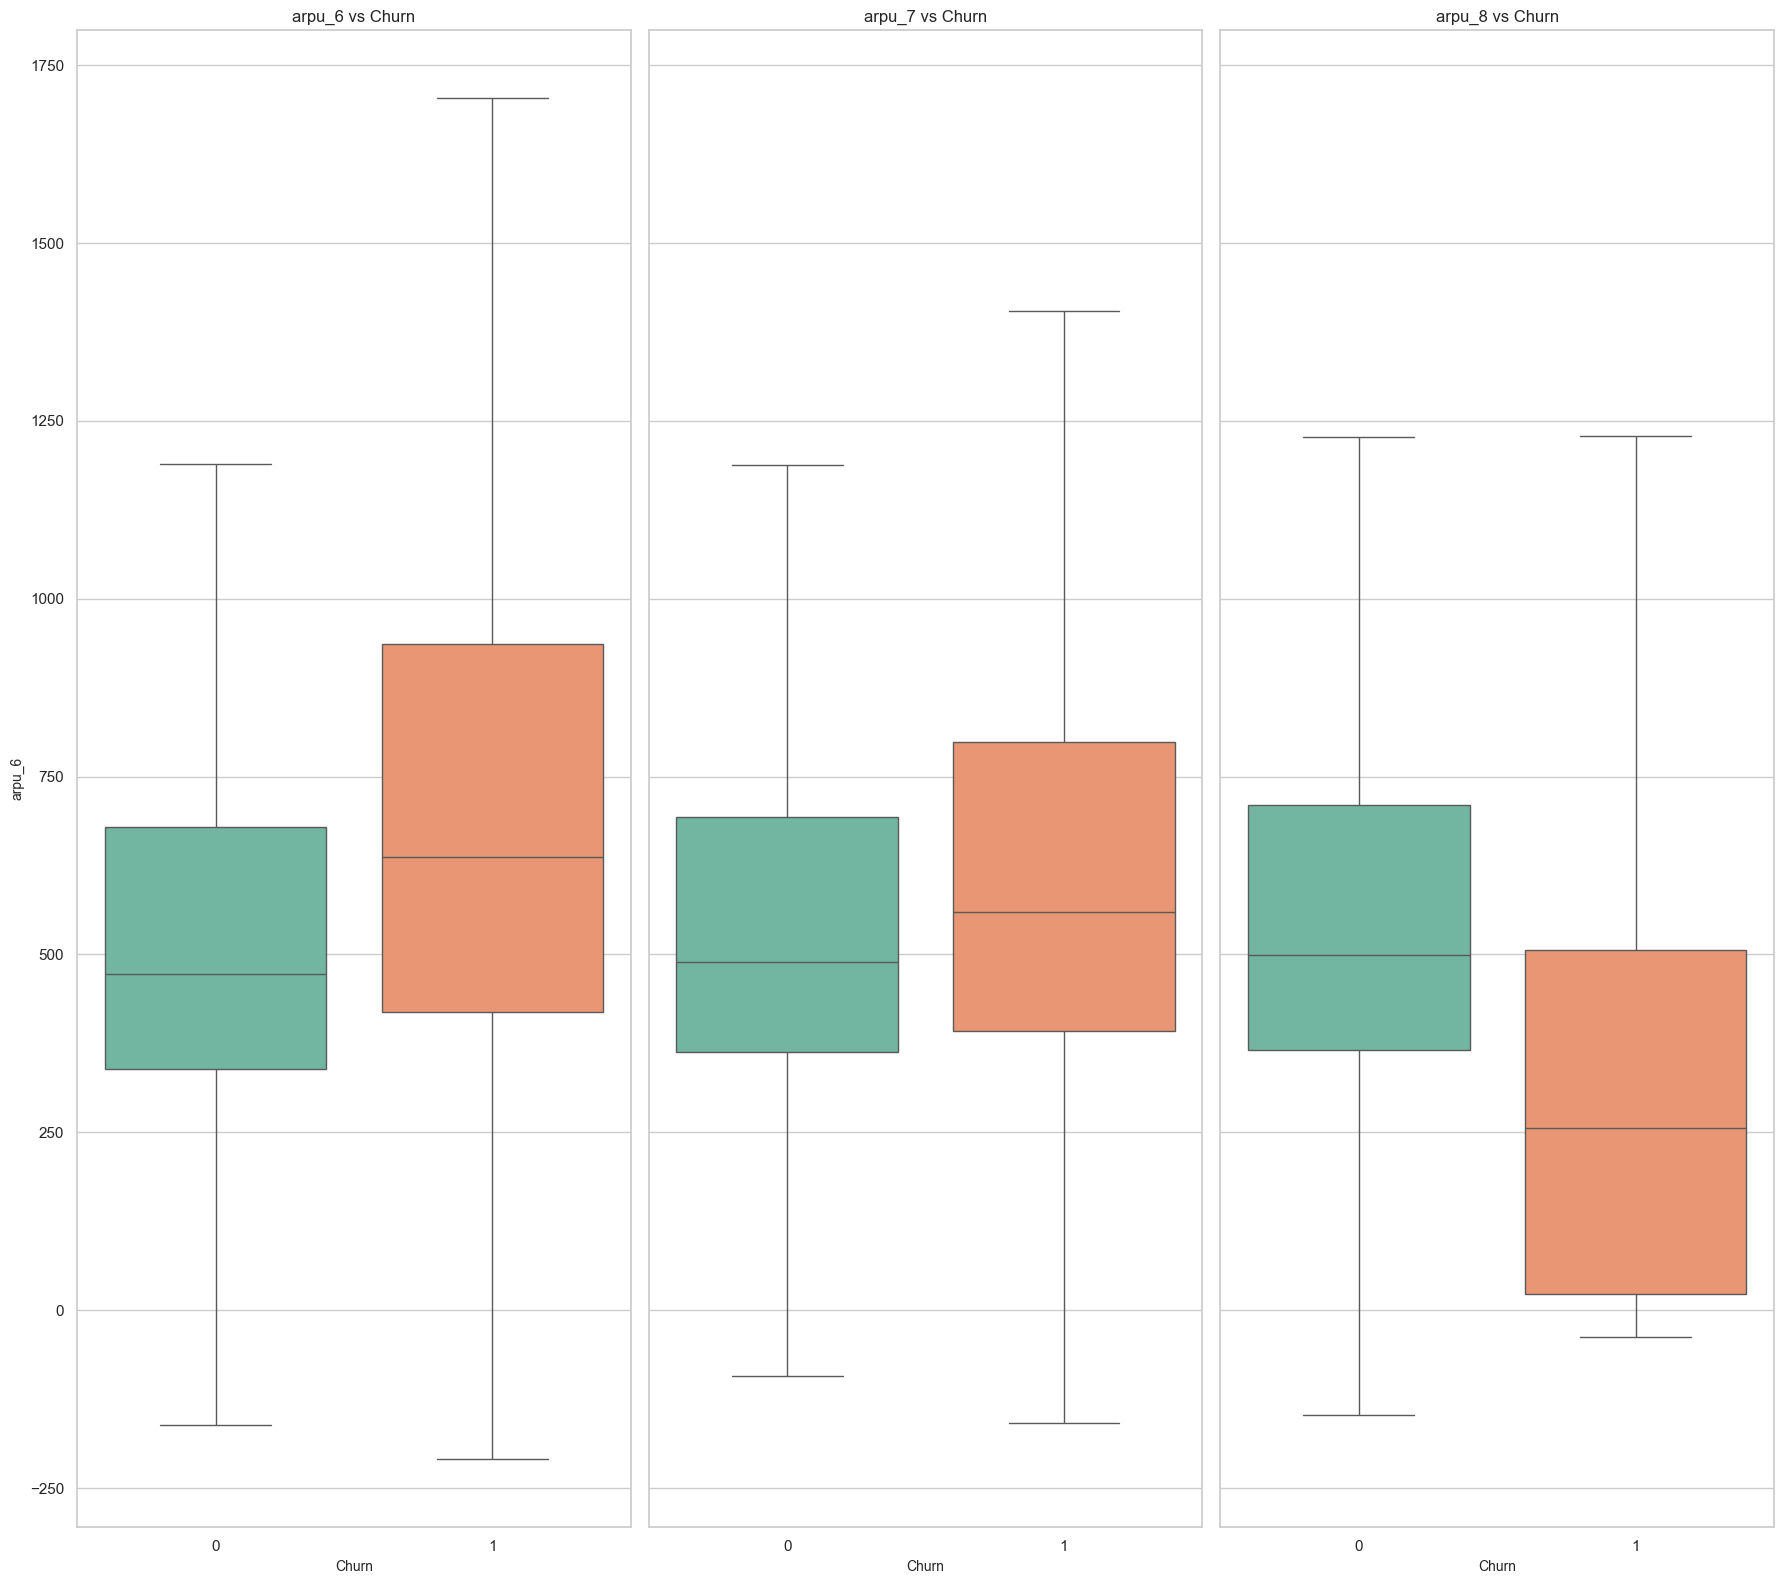

In [58]:
## average Revenue per user:
plot_columns = df_final.columns[df_final.columns.str.contains('arpu')]
plot_boxplots(df_final, plot_columns)

### Insights

- **Non Churner Behavior:** average revenue per user for non churners tend to remain steady depicting loyal customers 

- **Churn Behavior:** average revenue per user for churners tend to decrease over time. we can also see the churners tend to give  a lot of revenue before but for some reason in the third phase or in the action phase their revenue decreases a lot compared to non churners predicting churned behavior.

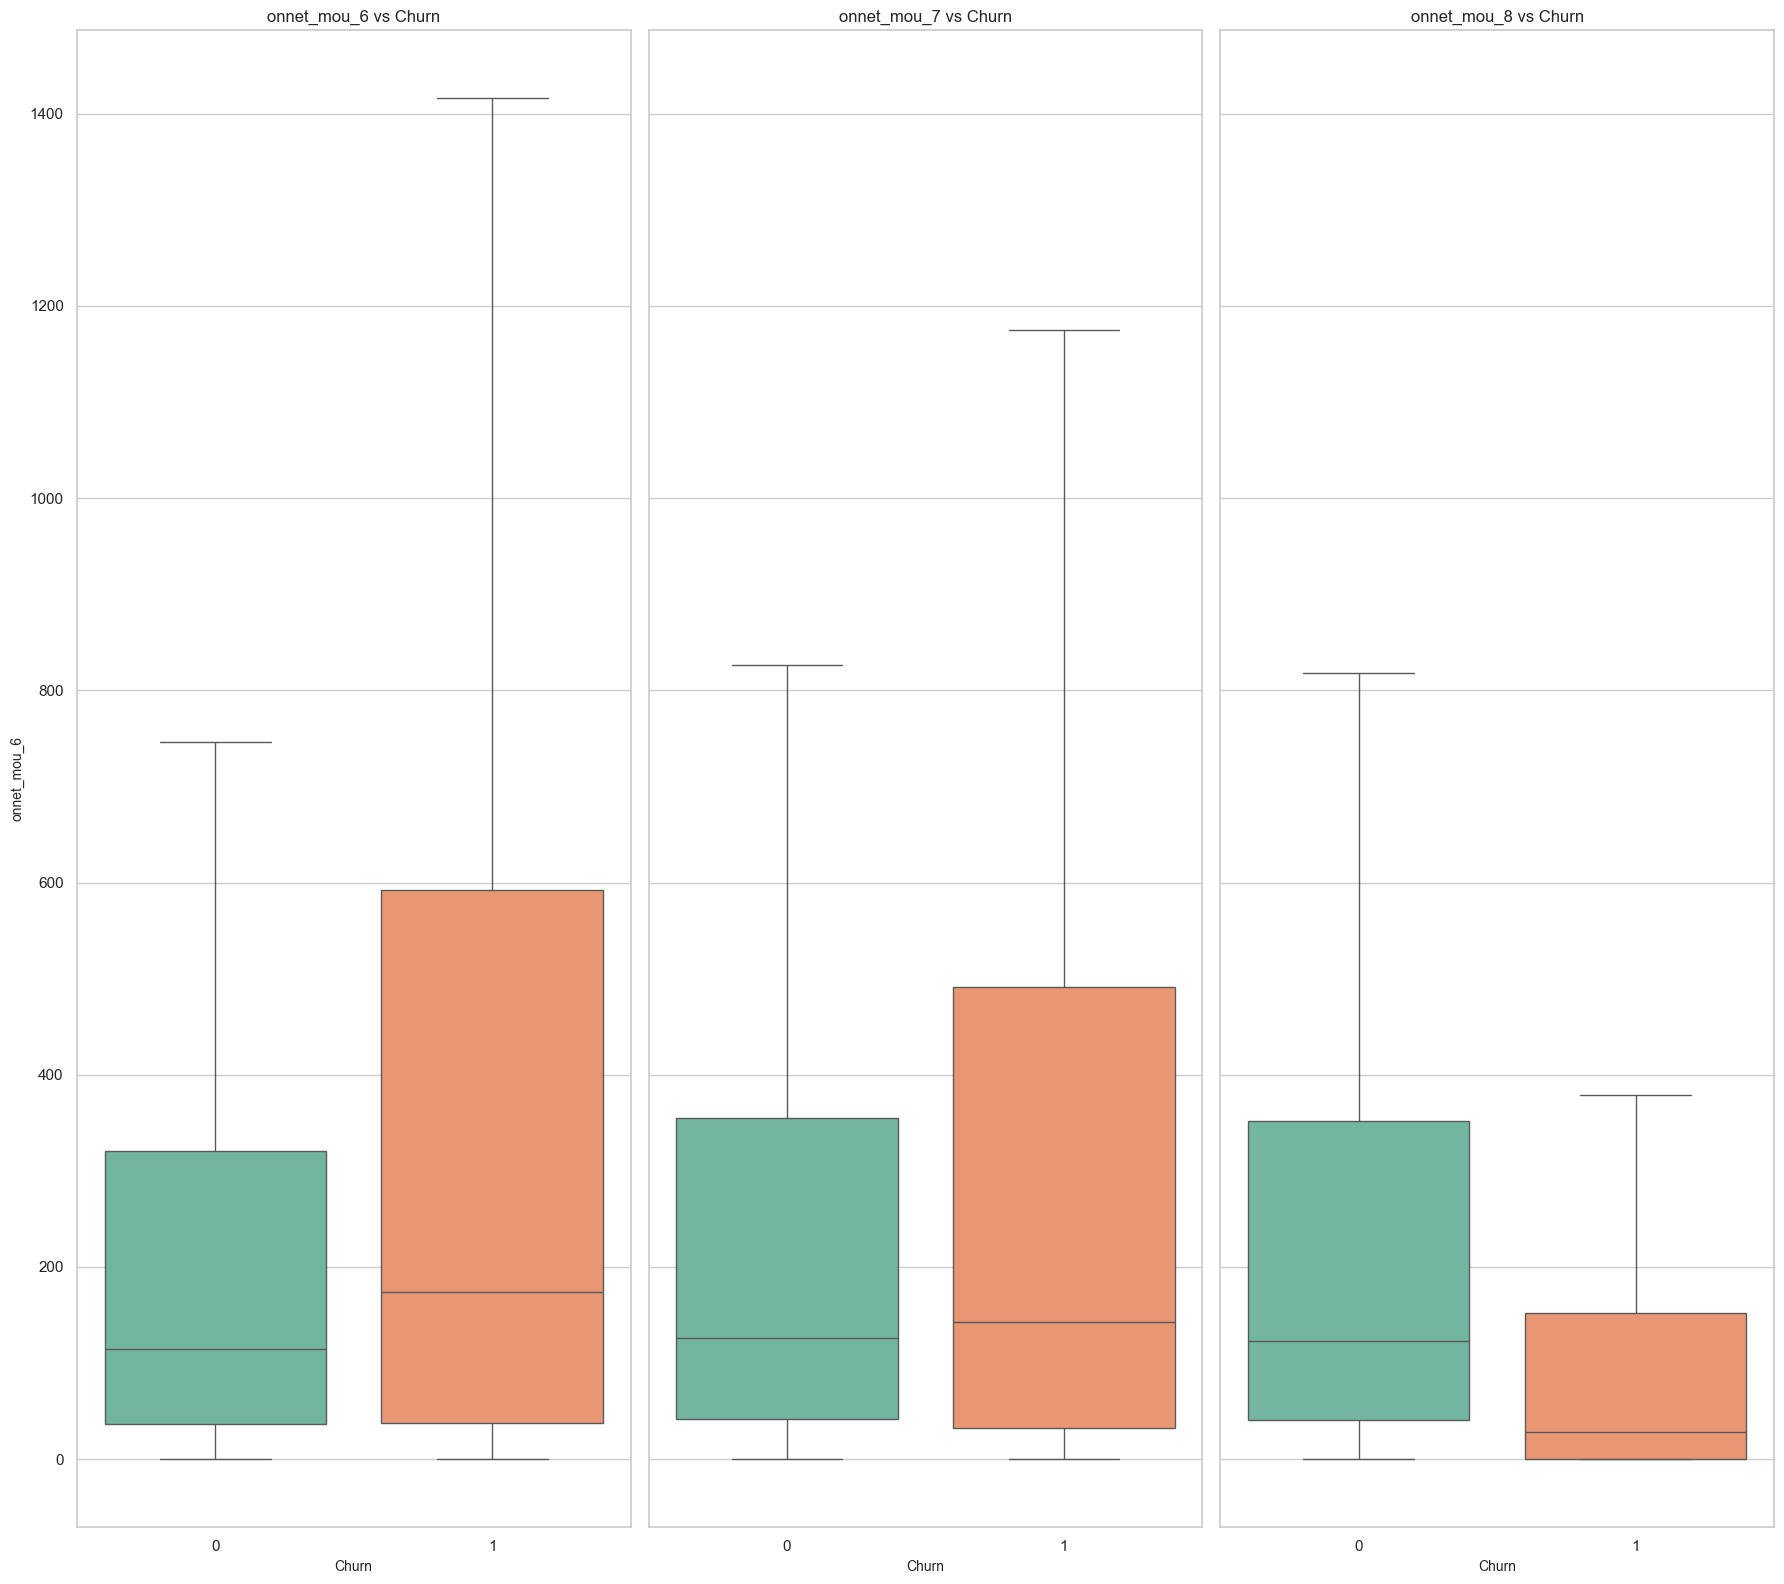

In [59]:
## Minutes of Usage(onnet)
plot_columns = df_final.columns[df_final.columns.str.contains('onnet_mou')]
plot_boxplots(df_final, plot_columns)

### Minute of Usage

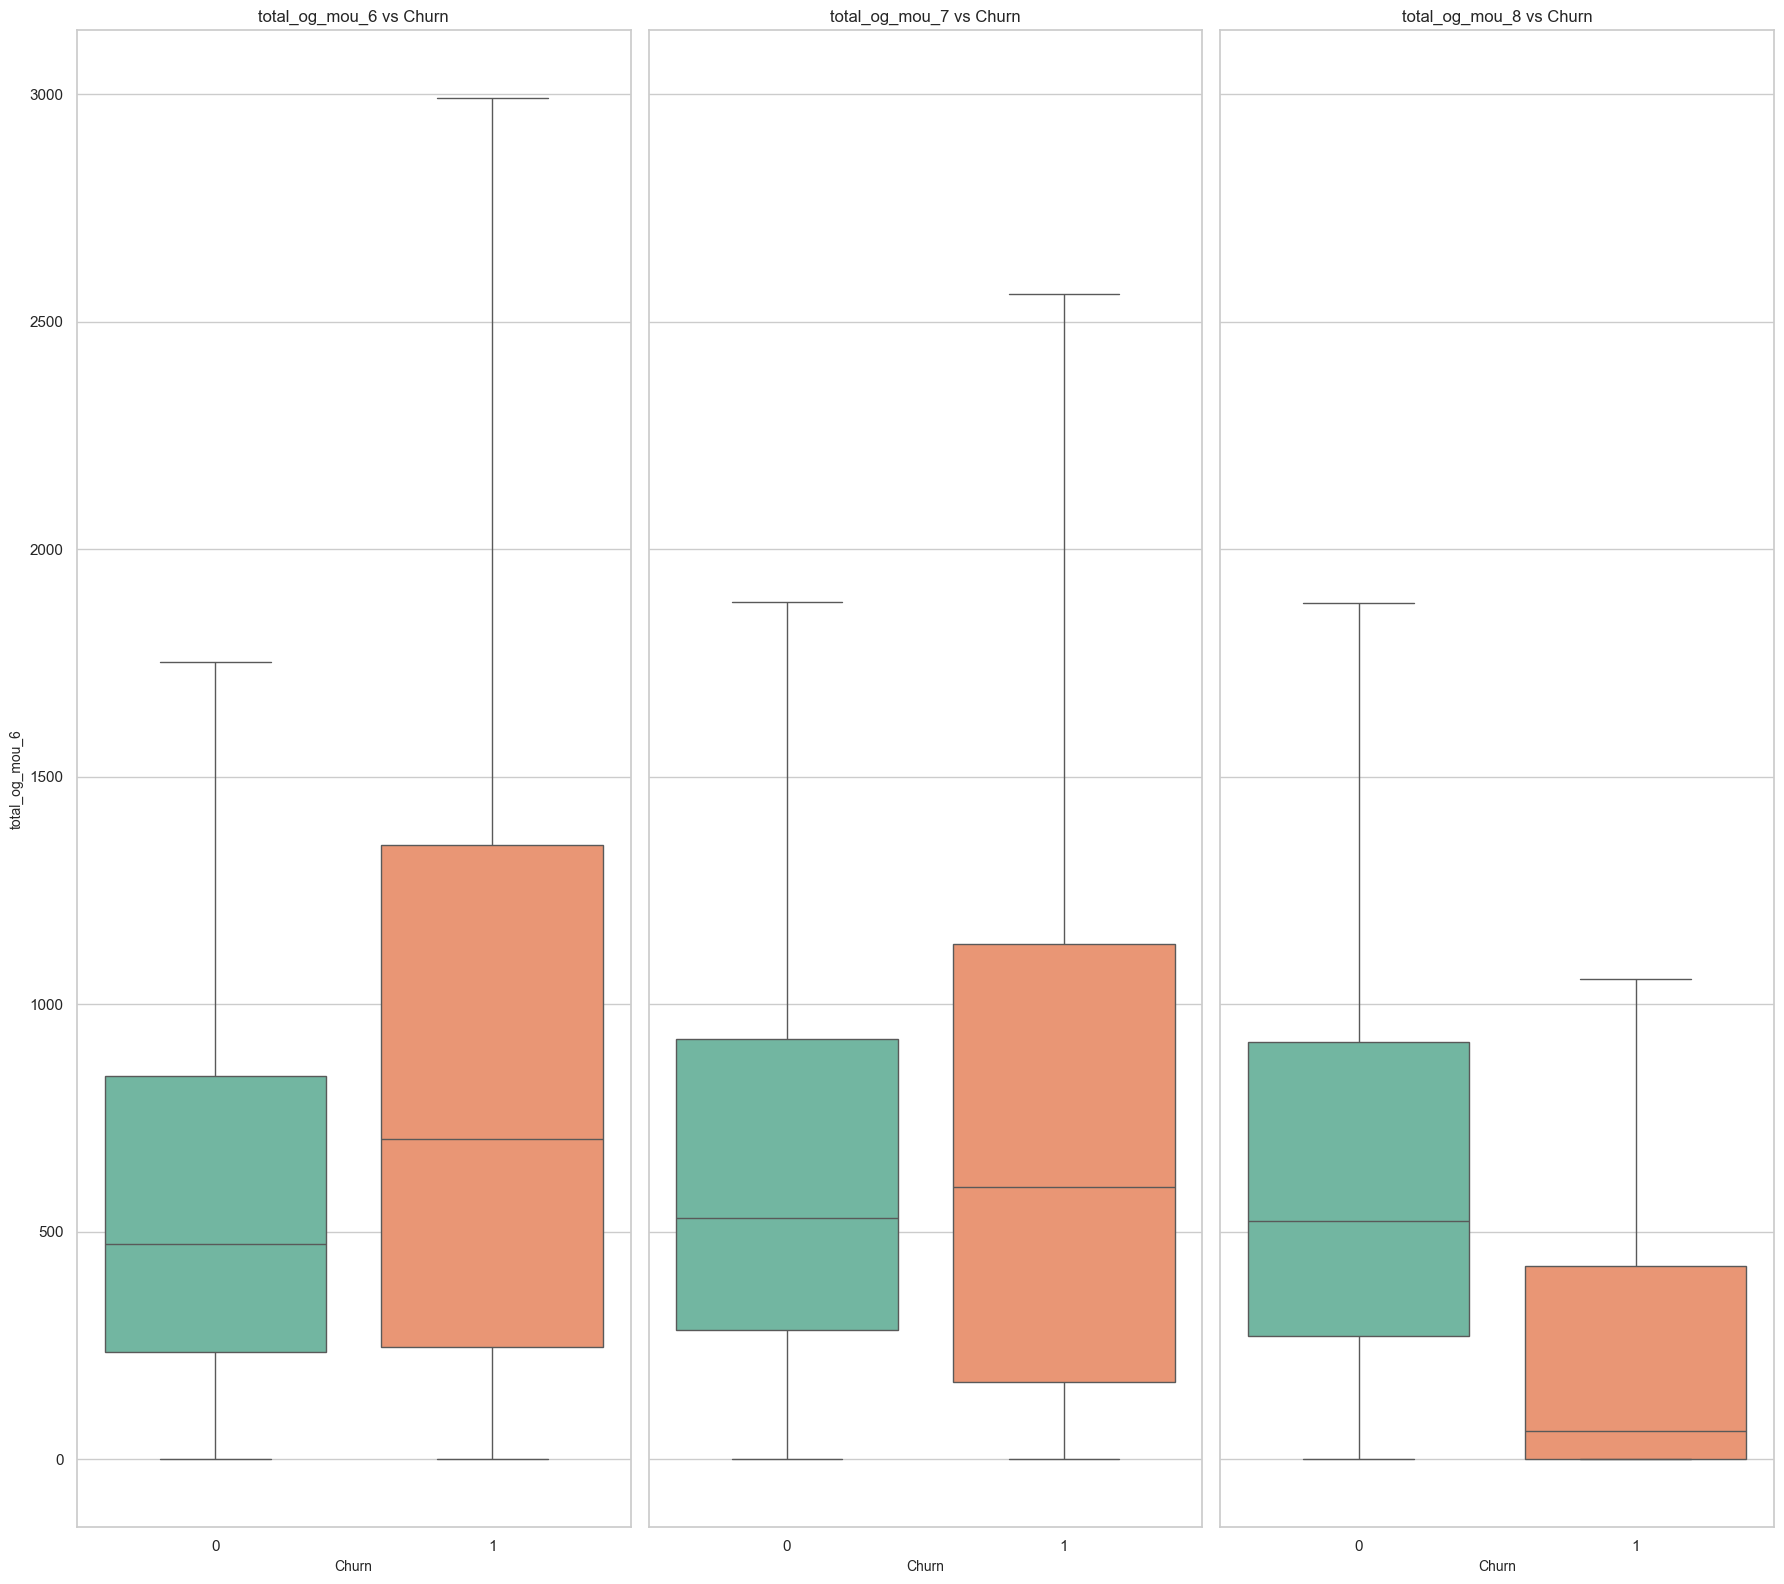

In [60]:
## Minutes of Usage (Total out going minutes of Usage)
plot_columns = df_final.columns[df_final.columns.str.contains('total_og_mou')]
plot_boxplots(df_final, plot_columns)

### Insight
- **Non Churn Behavior:** Observation of the charts tells us clearly that withn the three months the non churners have a consistent usage.
- **Churn Behavior:** The churners shows us a clear pattern of disengagement, like they have high number of call usage in the first 2 months but in the third month a significant drop is seen indicating churn behavior

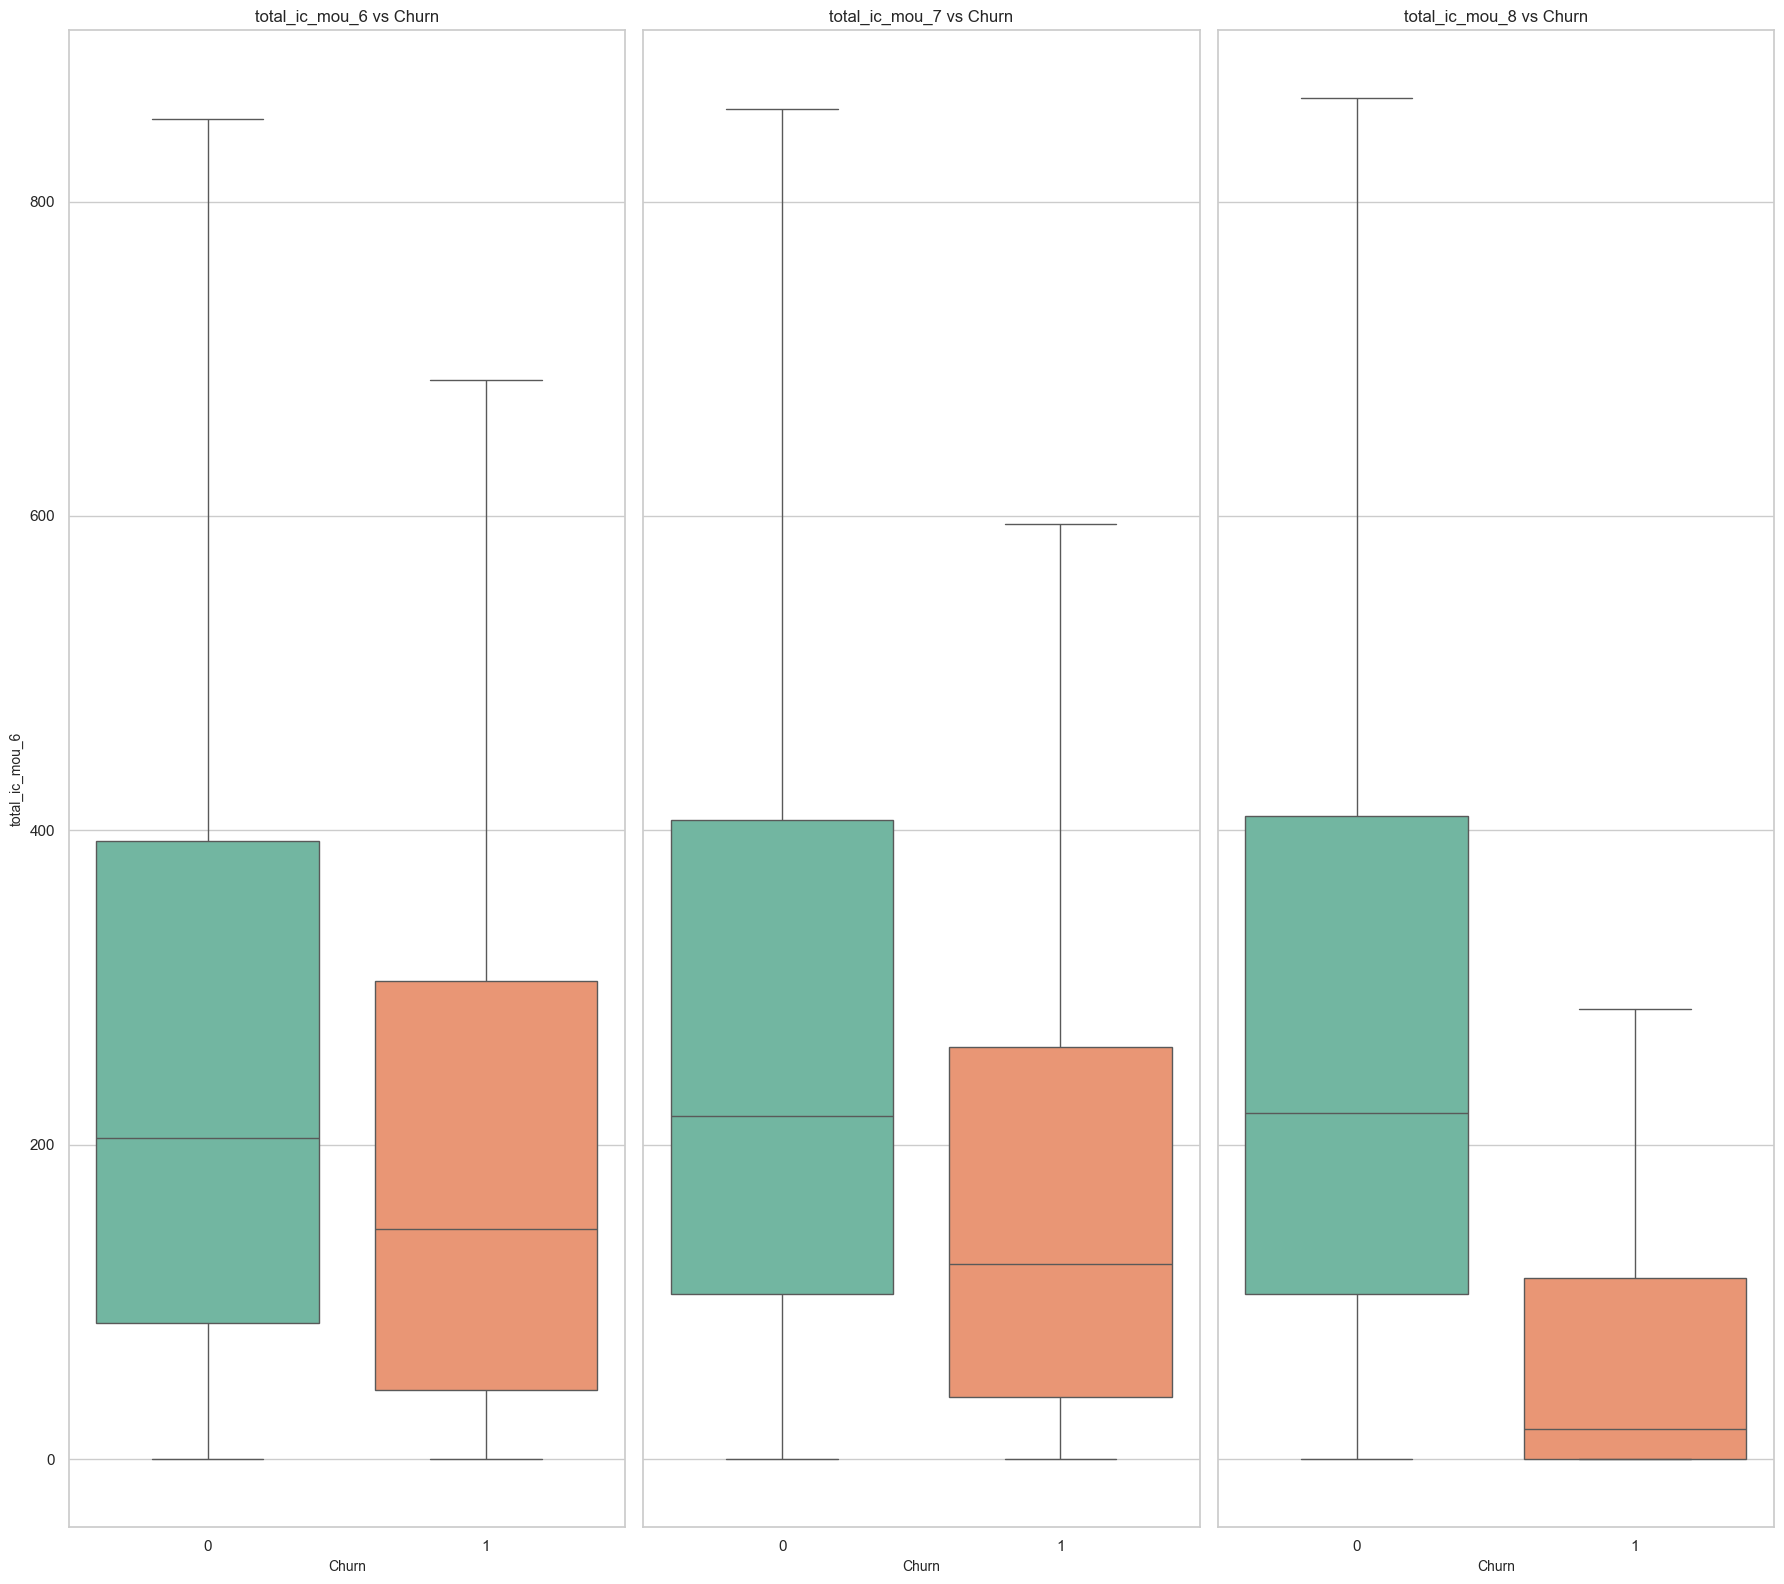

In [61]:
## Minutes of Usage (Total incoming call minutes of Usage)
plot_columns = df_final.columns[df_final.columns.str.contains('total_ic_mou')]
plot_boxplots(df_final, plot_columns)

### Insights
- **Non Churners Behavior:** Observation of the charts tells us that non churners tend to havea consistent usage.
- **Churners Behavior:** Churners have a clear pattern of Disengagement. Same as outgoing call churners are quite active in the first two months but in the third month churners shows a reduction in usage indication churn behavior.

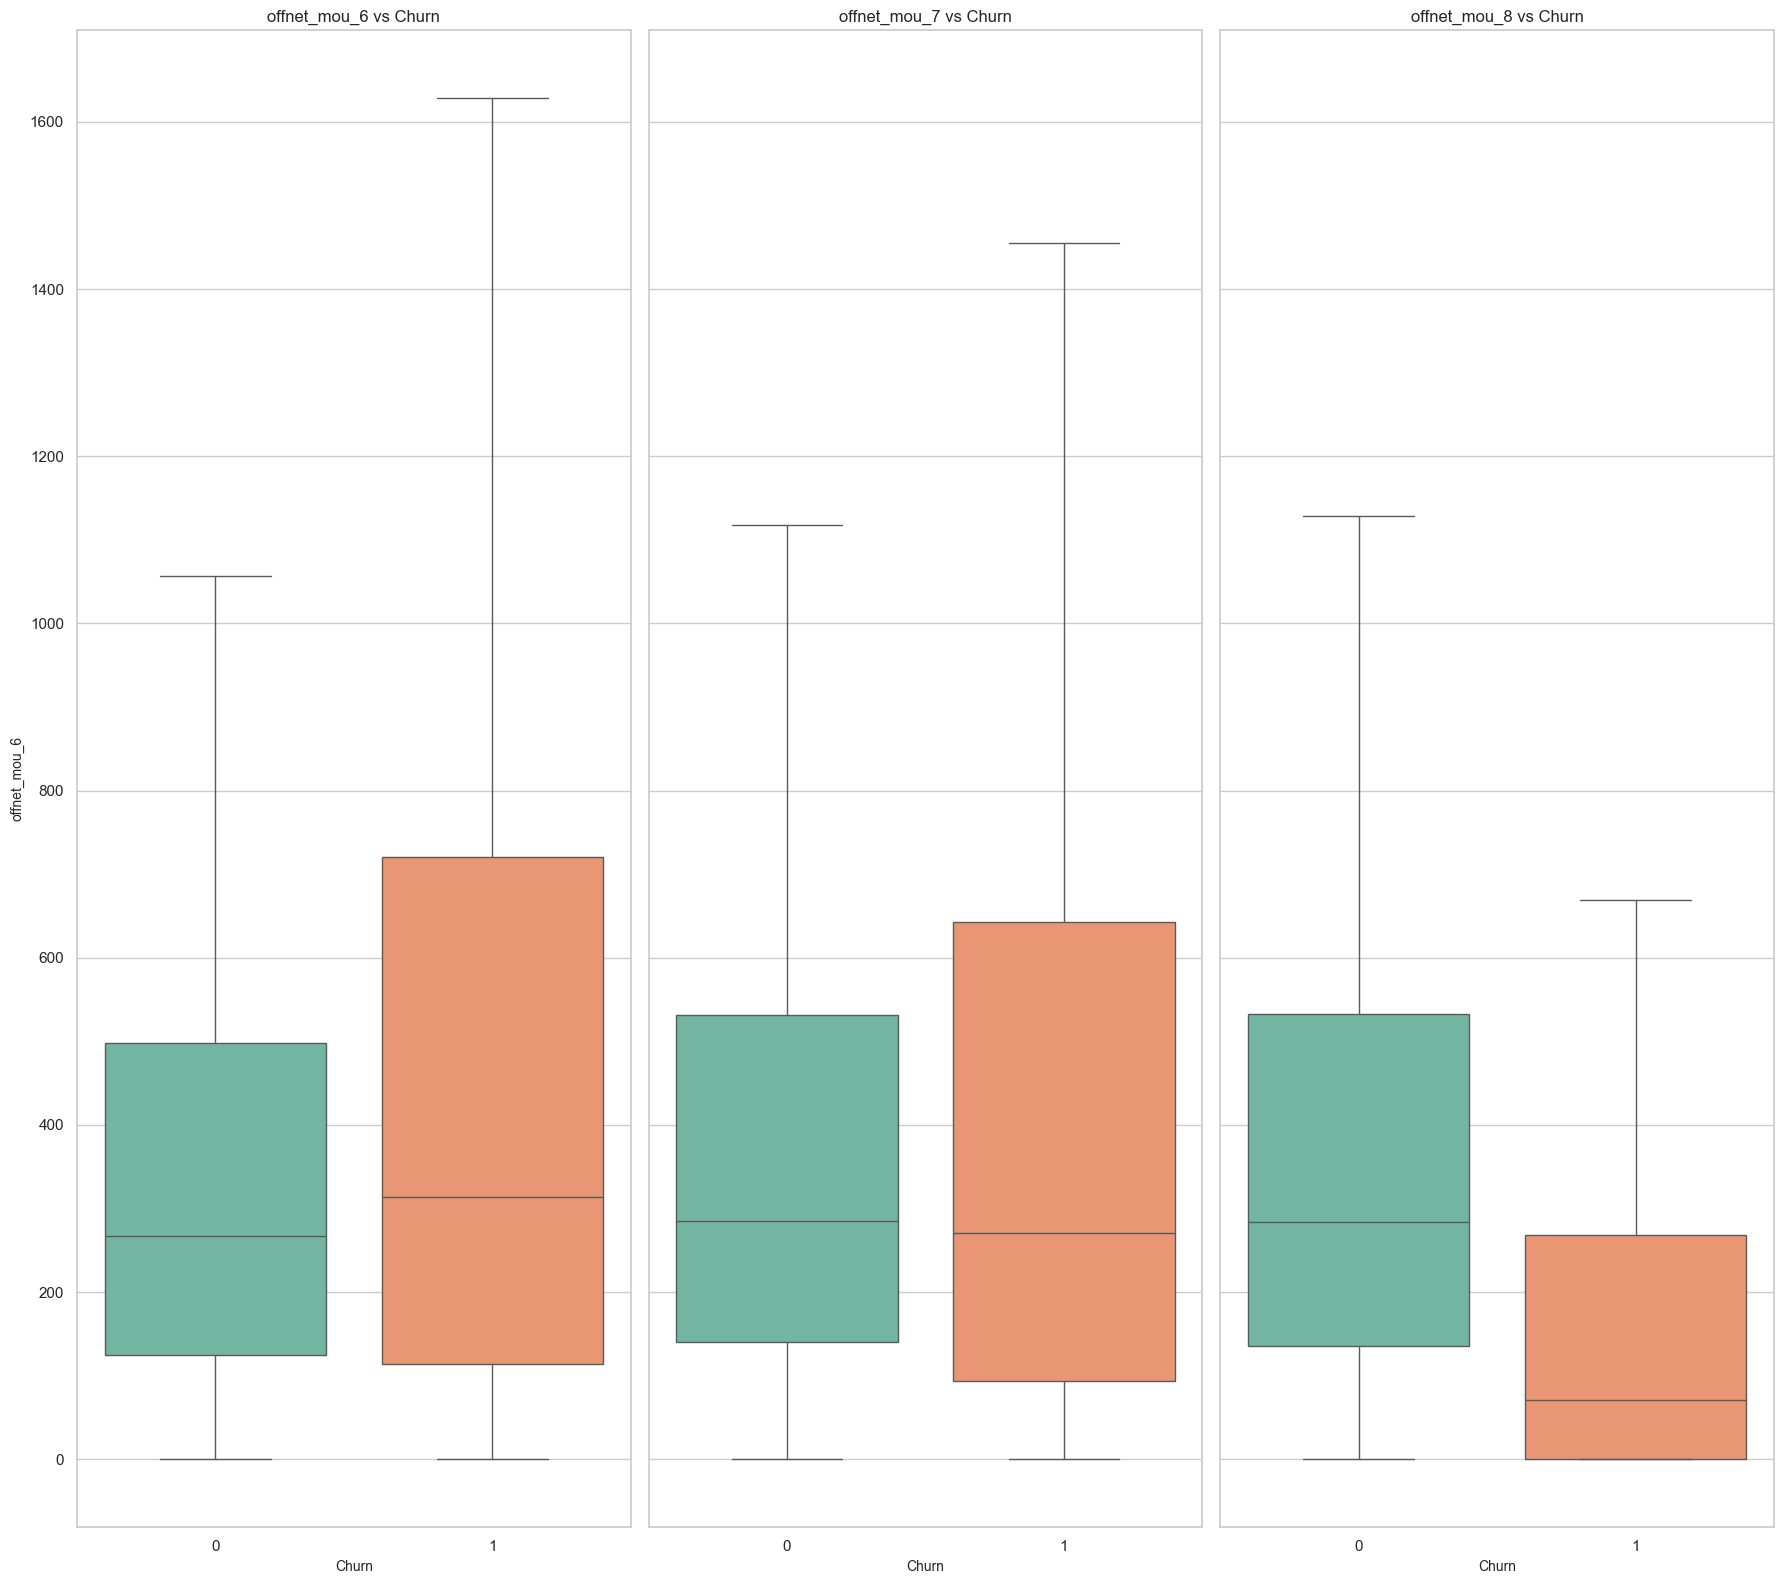

In [62]:
## Minutes of Usage(offnet)
plot_columns = df_final.columns[df_final.columns.str.contains('offnet_mou')]
plot_boxplots(df_final, plot_columns)

### Insights

- Both onnet and offnet shows us that the non churners are tend to do more calls withnthe operator or outside the operator in the june july months but dastrically decreases in the august, indicating churn Behavior

- where as the loyal customers or the non churn customers tend to remain at the same level

In [63]:
## Minutes of Usage(offnet)
plot_columns = df_final.columns[df_final.columns.str.contains('mou')]
plot_columns

Index(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7',
       'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8',
       'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
       'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',
       'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6',
       'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6',
       'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6',
       'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7',
       'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8',
       'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'total_og_mou_6',
       'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_6',
       'loc_ic_t2t_mo

features that have incoming calls and outgoing call may have some `Redundancy` We can check for redundant features and drop them

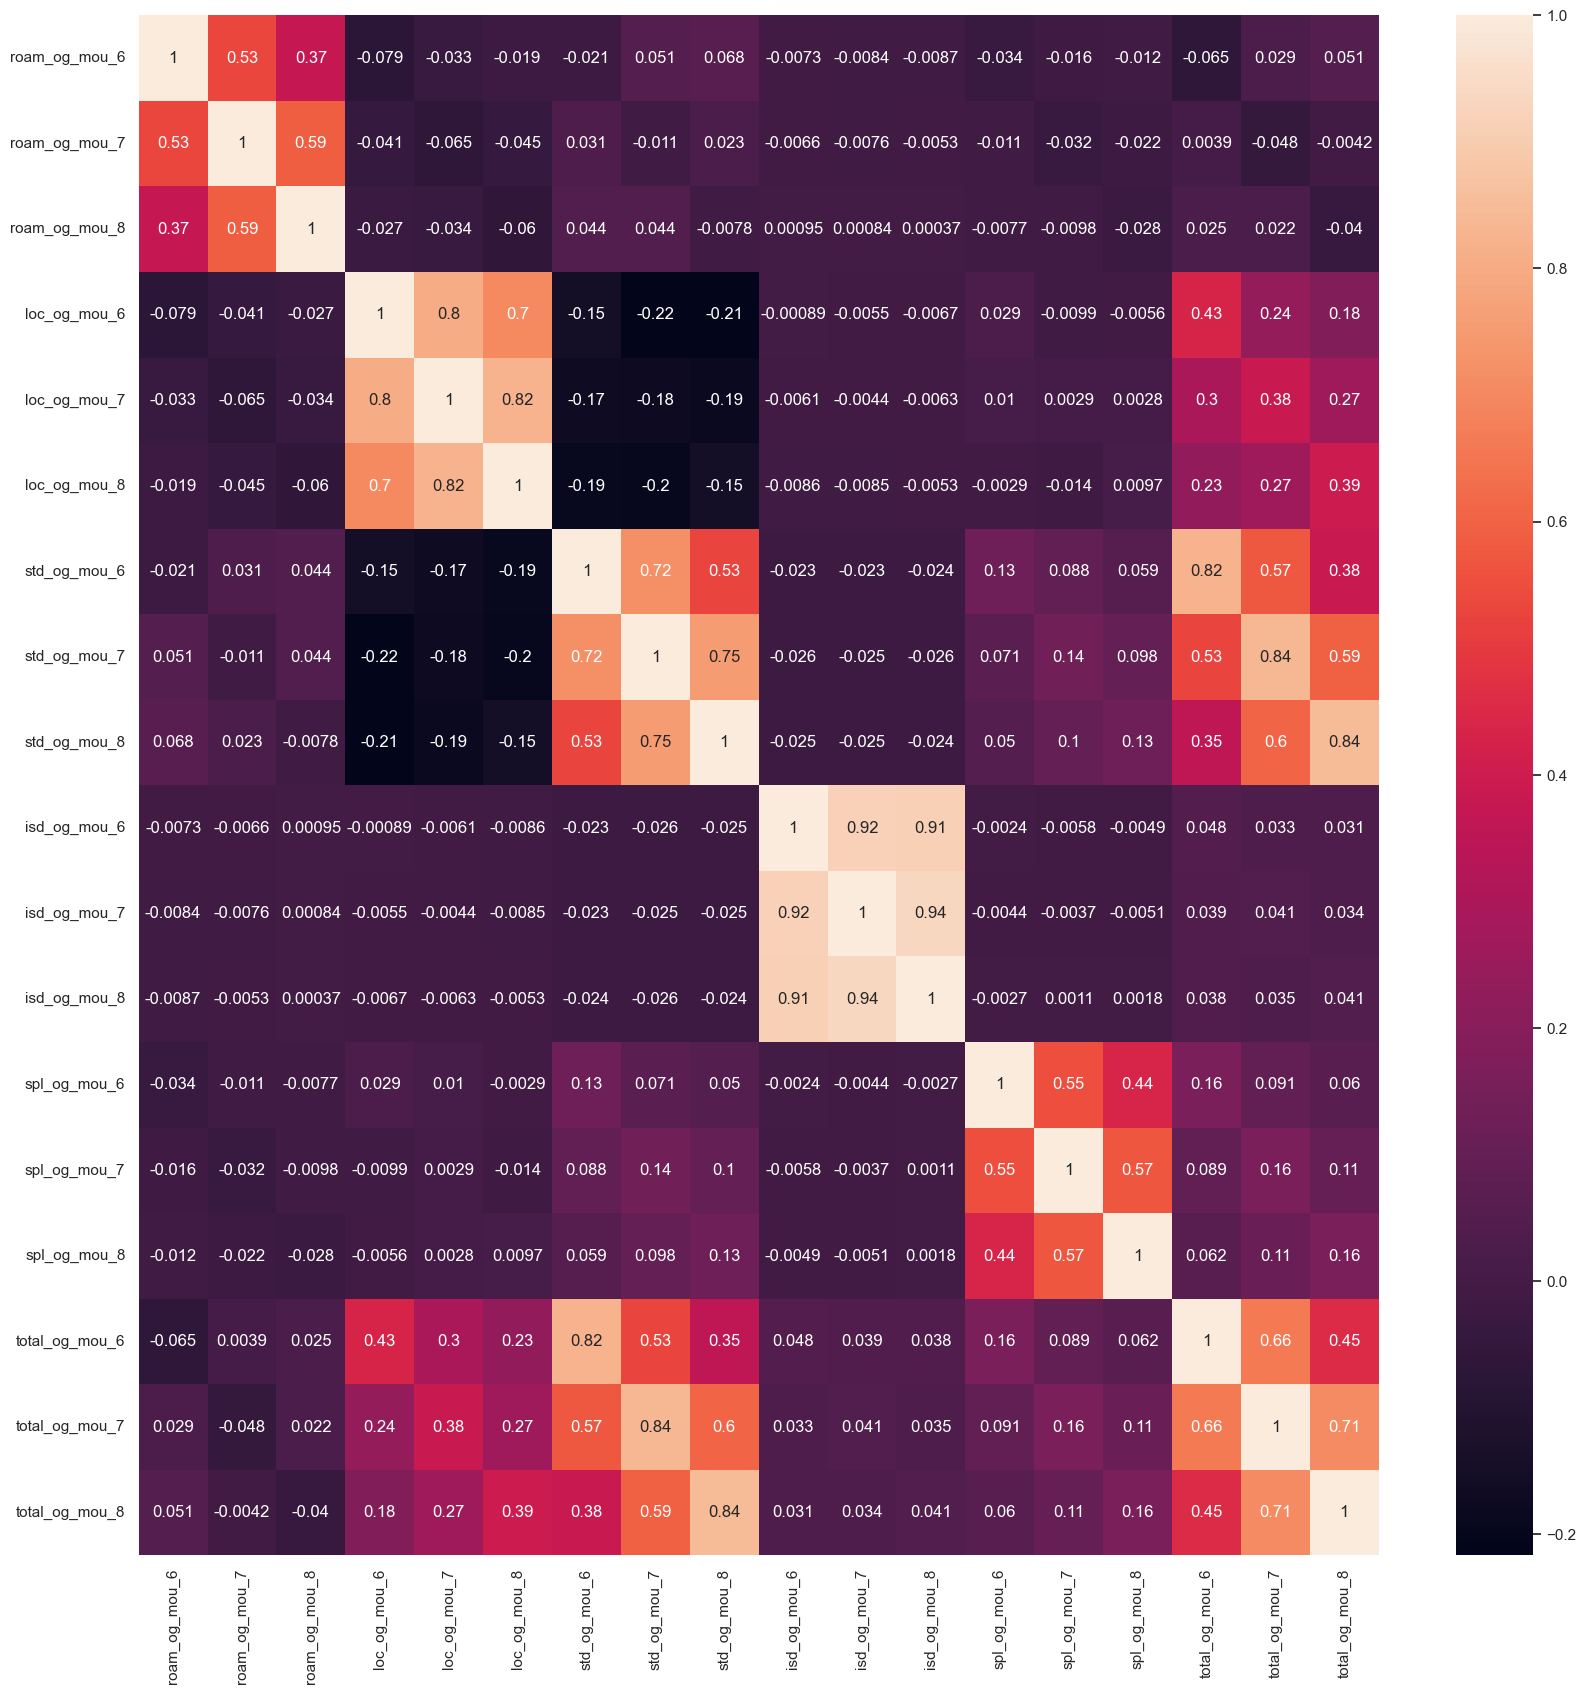

In [64]:
# lets check the redundancy of the outgoingcalls
og_cols = df_final.columns[df_final.columns.str.contains('og_mou')] 
                           
og_cols_df= df_final[og_cols]

plt.figure(figsize=(20,20))
sns.heatmap(og_cols_df.corr(), annot=True)
plt.show()

### Insights

`loc_og_mou` and `std_og_mou` are potential redundant features cause they are correlating with total_og_mou 

In [65]:
## Therefore Dropping loc_og_mouand std_og_mou
og_mou_drop_cols = ["loc_og_mou_6","loc_og_mou_7","loc_og_mou_8","std_og_mou_6","std_og_mou_7","std_og_mou_8"]
df_final.drop(columns=og_mou_drop_cols, inplace = True) 

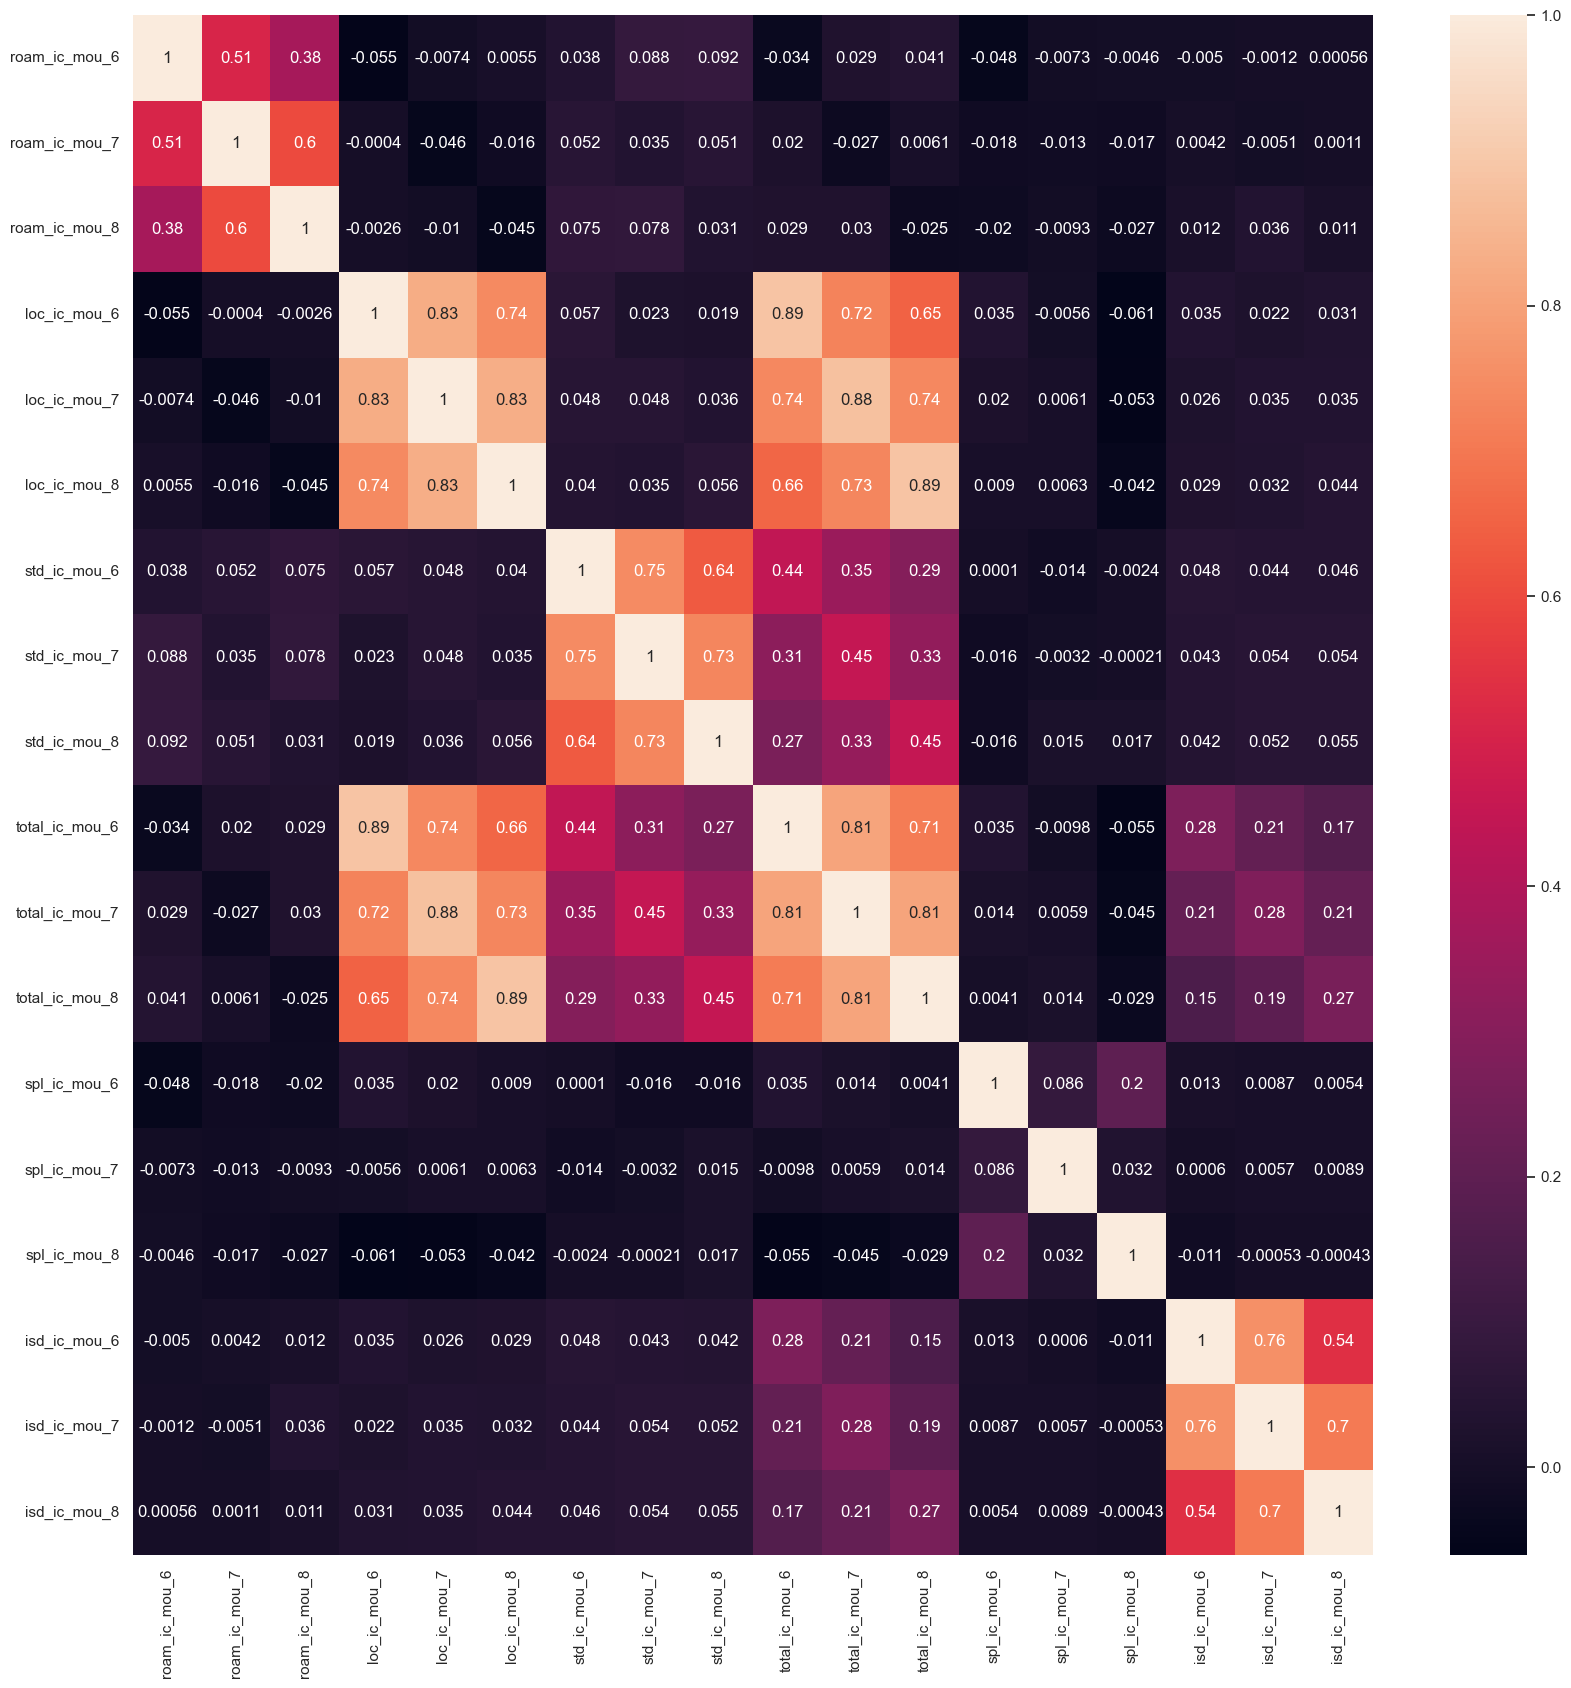

In [66]:
# lets check the redundancy of the outgoingcalls
ic_cols = df_final.columns[df_final.columns.str.contains('ic_mou')] 
                           
ic_cols_df= df_final[ic_cols]

plt.figure(figsize=(20,20))
sns.heatmap(ic_cols_df.corr(), annot=True)
plt.show()

### Insights

`loc_ic_mou` and `std_ic_mou` are potential redundant features cause they are correlating with total_ic_mou 

In [67]:
## Therefore Dropping loc_ic_mouand std_ic_mou
ic_mou_drop_cols = ["loc_ic_mou_6","loc_ic_mou_7","loc_ic_mou_8","std_ic_mou_6","std_ic_mou_7","std_ic_mou_8"]
df_final.drop(columns=ic_mou_drop_cols, inplace = True) 

### Minutes of Usage (Tower to Tower, Tower to Mobile, Tower to Fixed line, Tower to Carrier calls)

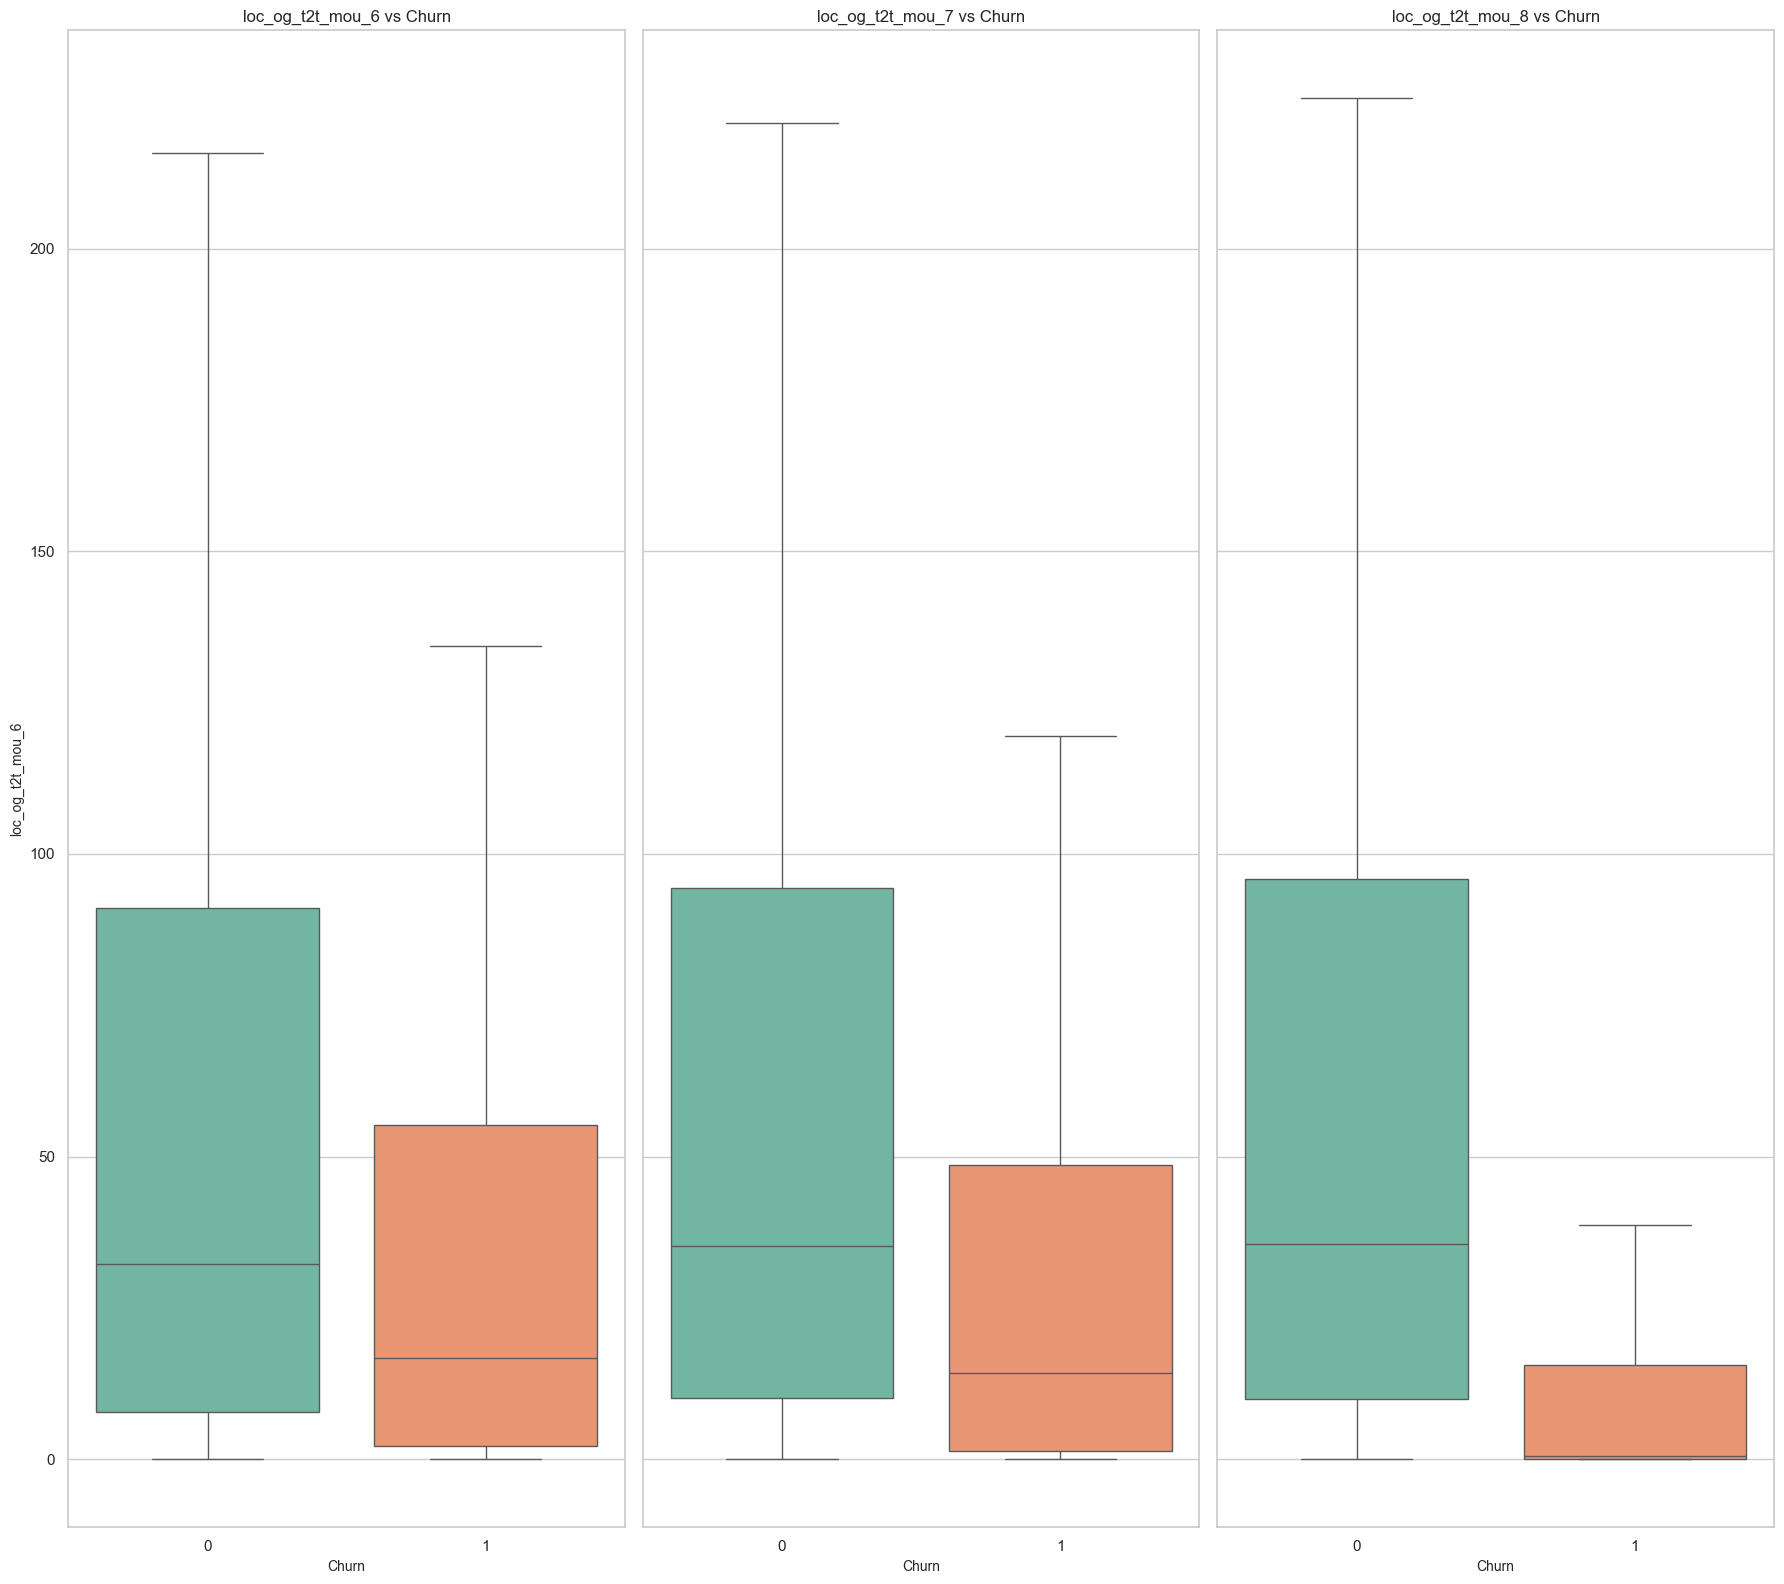

In [68]:
mou_tower_cols = df_final.columns[df_final.columns.str.contains('loc_og_t2')]
plot_boxplots(df_final,mou_tower_cols[:3])

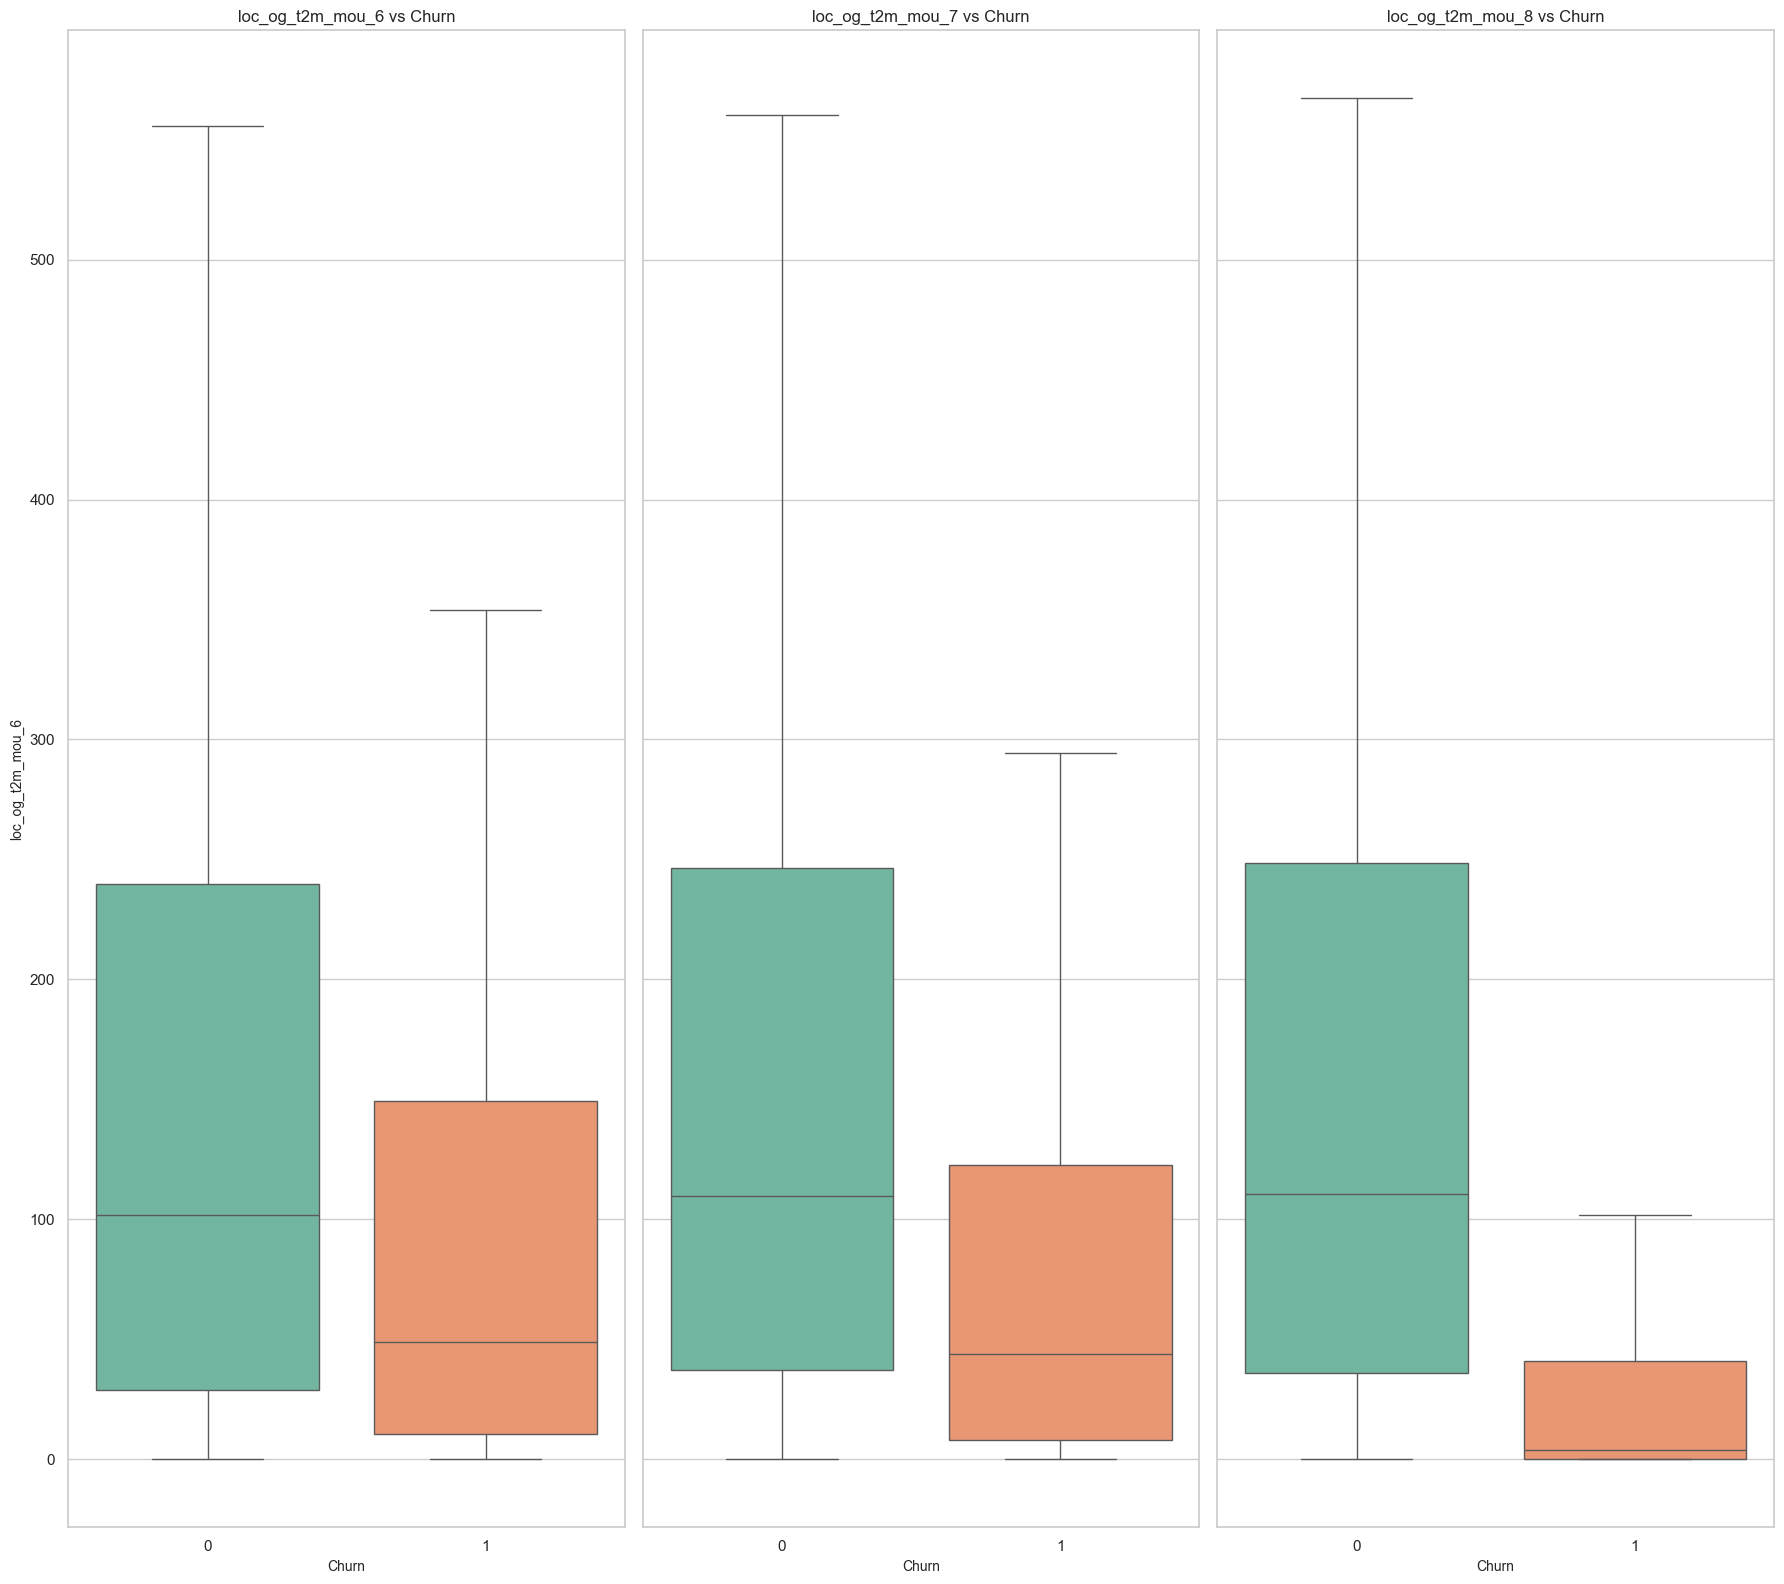

In [69]:
plot_boxplots(df_final,mou_tower_cols[3:6])

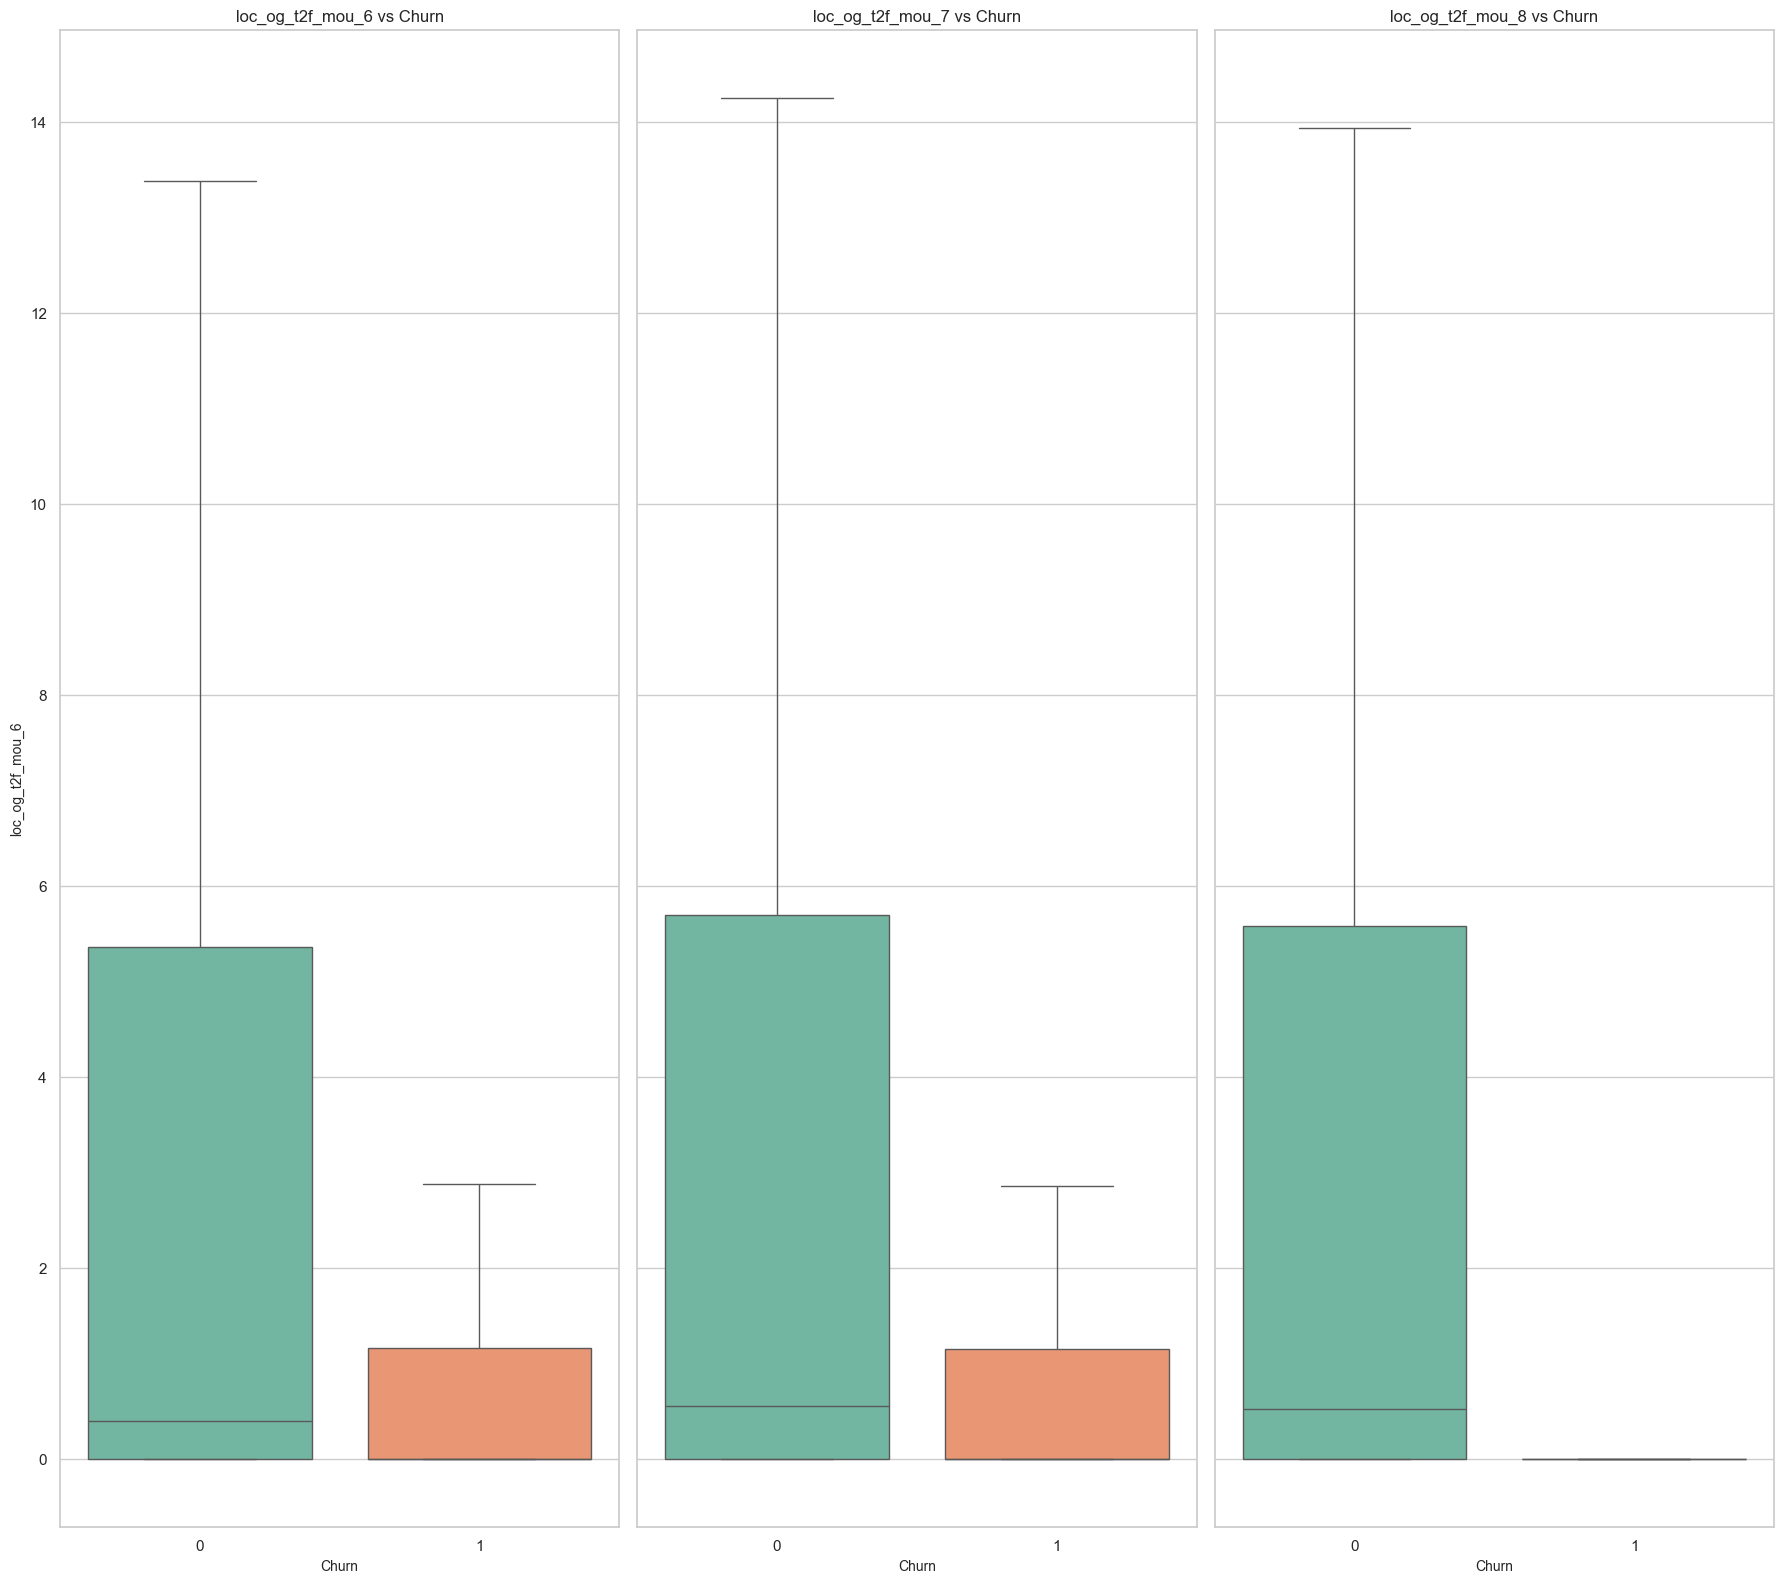

In [70]:
plot_boxplots(df_final, mou_tower_cols[6:9])

### Insights

- **Non Churned:** Again its quite evidently seen that people who dont churn tend to have stable call rates withn the months, indicating Loyal customers.
- **Churned Customers:** People who churns its quite evidently seen that in the action phase their call activity also reduces, indicating churn behavior.

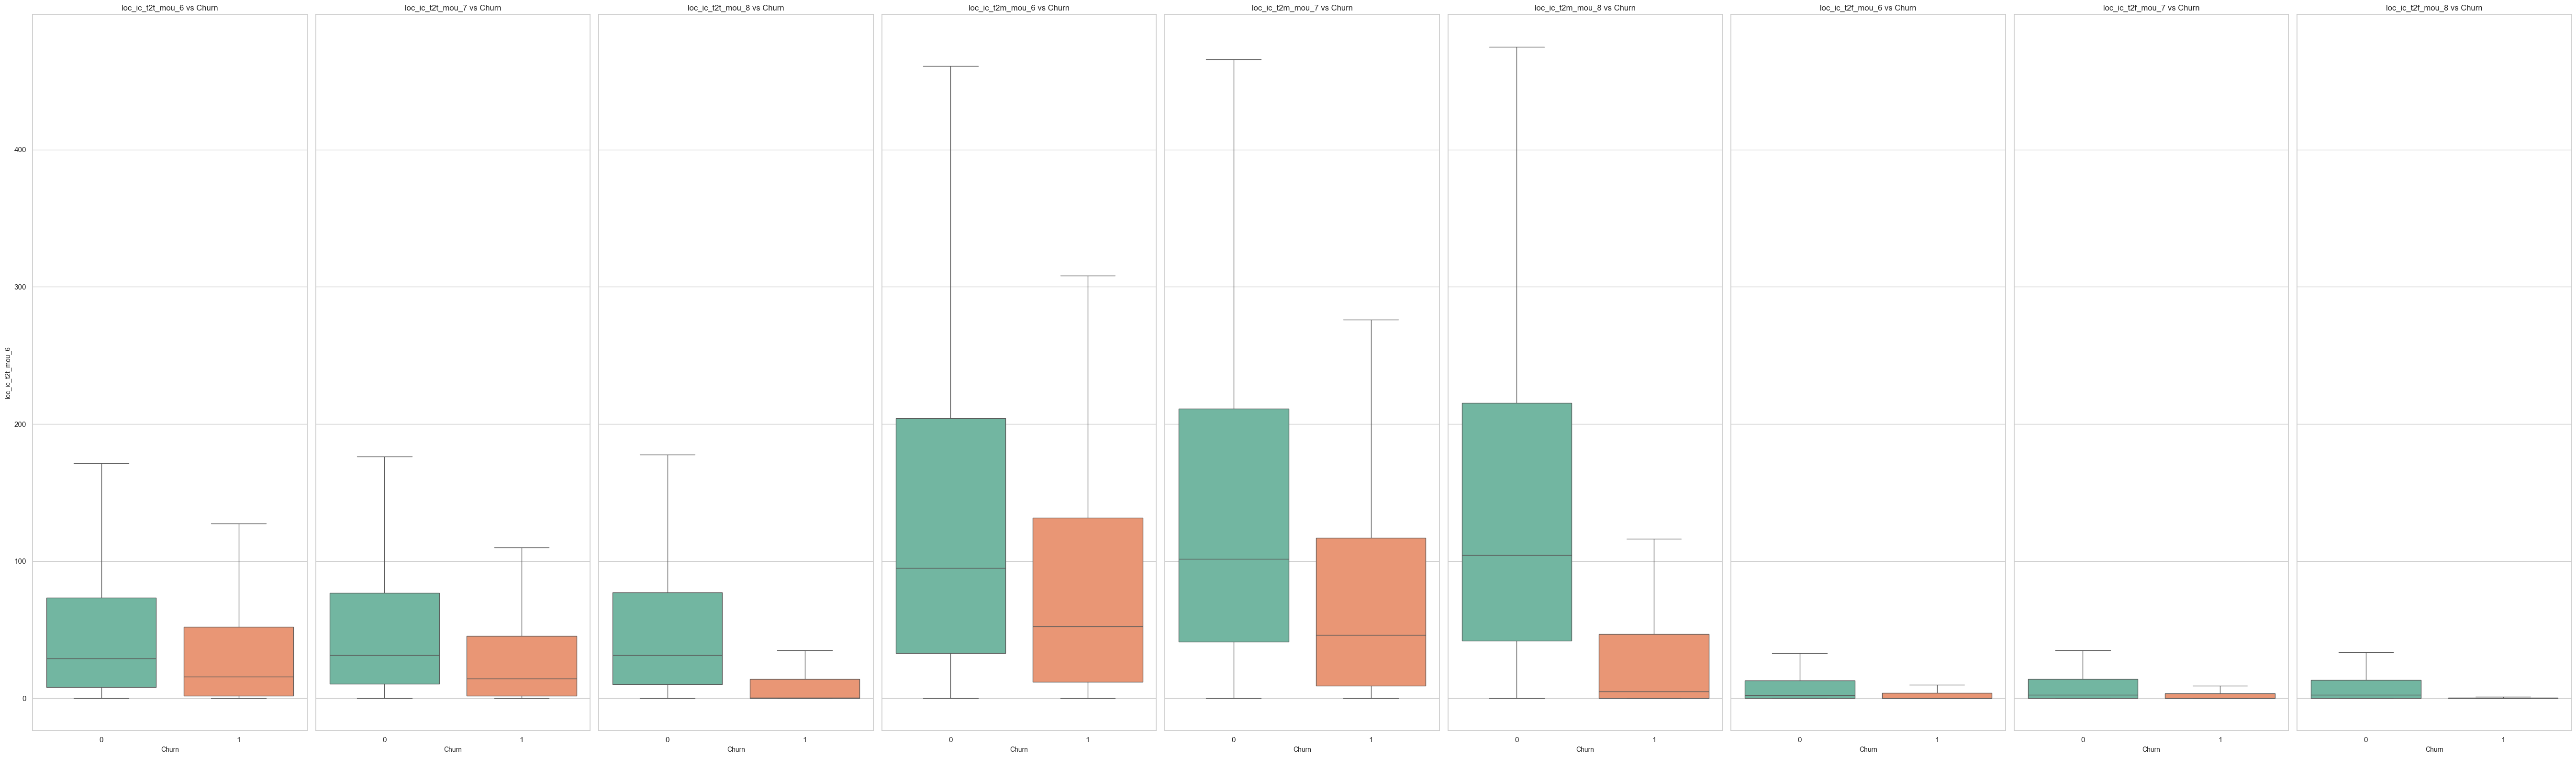

In [71]:
mou_ic_tower_cols = df_final.columns[df_final.columns.str.contains('loc_ic_t2')]
plot_boxplots(df_final, mou_ic_tower_cols)

### Insights

Same Behavior as og calls, loyal customers have high call activity on the other hand for the churn customers their activity is low and it further decreases in the action phase.

<Figure size 1000x600 with 0 Axes>

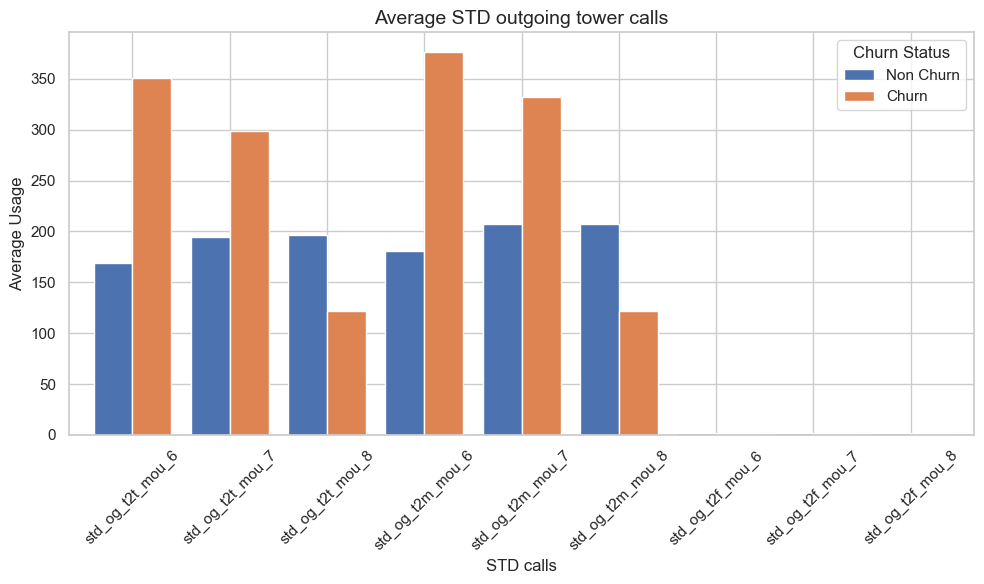

In [72]:
# For STD calls
std_og_tower_cols = df_final.columns[df_final.columns.str.contains('std_og_t2')]

# Grouping by 'churn' and calculating the mean
mean_values = df_final.groupby('churn')[std_og_tower_cols].mean()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
mean_values.T.plot(kind='bar', figsize=(10, 6), width=0.8)

# Customizing the plot
plt.title('Average STD outgoing tower calls', fontsize=14)
plt.xlabel('STD calls', fontsize=12)
plt.ylabel('Average Usage', fontsize=12)
plt.xticks(rotation=45)
plt.legend(['Non Churn', 'Churn'], title='Churn Status')

# Display the plot
plt.tight_layout()
plt.show()

### Insights

- **Non churned Behavior:**  Non churners have a stable usage withn all 3 months.
- **Churned Behavior:** Churners have an interesting fact their usage is very high in month 6 and 7 (Good phase) but in the 8th month (Action Phase) their usage decreases alot. indicating churned behavior

<Figure size 1000x600 with 0 Axes>

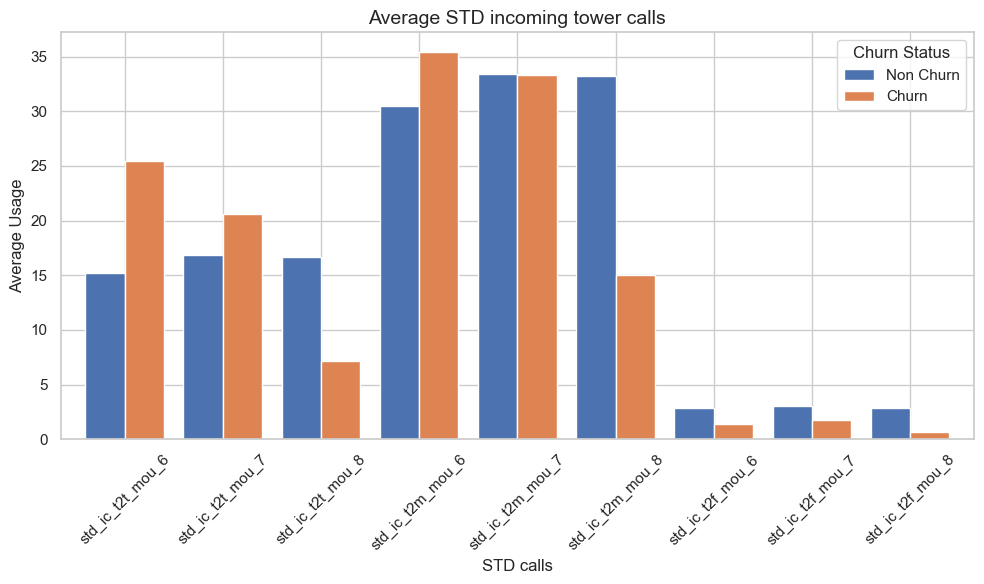

In [73]:
# For STD incoming calls calls
std_ic_tower_cols = df_final.columns[df_final.columns.str.contains('std_ic_t2')]

# Grouping by 'churn' and calculating the mean
mean_values = df_final.groupby('churn')[std_ic_tower_cols].mean()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
mean_values.T.plot(kind='bar', figsize=(10, 6), width=0.8)

# Customizing the plot
plt.title('Average STD incoming tower calls', fontsize=14)
plt.xlabel('STD calls', fontsize=12)
plt.ylabel('Average Usage', fontsize=12)
plt.xticks(rotation=45)
plt.legend(['Non Churn', 'Churn'], title='Churn Status')

# Display the plot
plt.tight_layout()
plt.show()

### Insights

Same for the incoming calls, churners tend to have a high activity during the good phase, but their activity decreases in the action phase indicating churned behavior.

### special calls

<Figure size 1000x600 with 0 Axes>

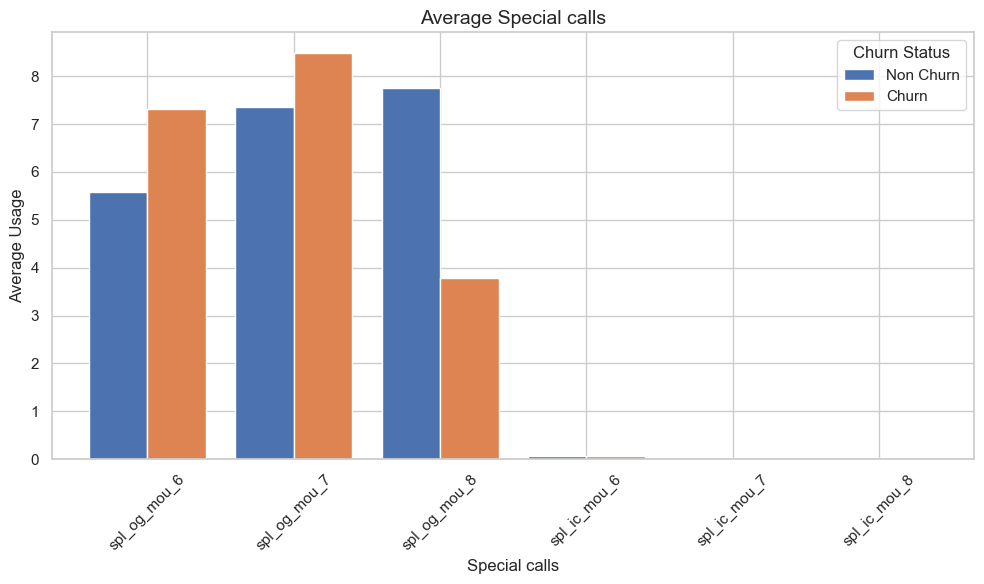

In [74]:
# For spl (special) calls
spl_call_cols = df_final.columns[df_final.columns.str.contains('spl')]

# Grouping by 'churn' and calculating the mean
mean_values = df_final.groupby('churn')[spl_call_cols].mean()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
mean_values.T.plot(kind='bar', figsize=(10, 6), width=0.8)

# Customizing the plot
plt.title('Average Special calls', fontsize=14)
plt.xlabel('Special calls', fontsize=12)
plt.ylabel('Average Usage', fontsize=12)
plt.xticks(rotation=45)
plt.legend(['Non Churn', 'Churn'], title='Churn Status')

# Display the plot
plt.tight_layout()
plt.show()


### Insights 

again churner's activity decreases a lot in the action phase indicating churn.

### Internatinal Calls

<Figure size 1000x600 with 0 Axes>

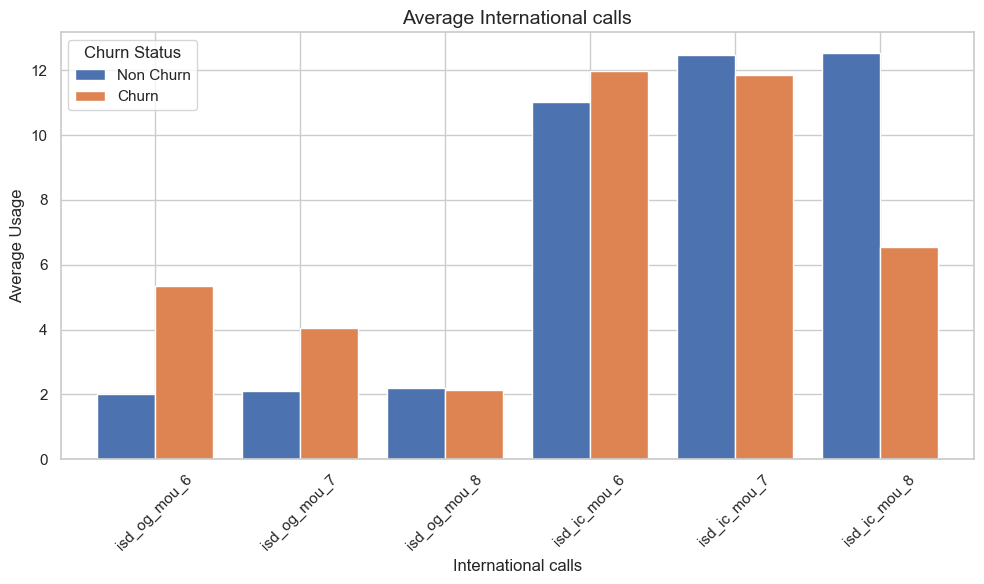

In [75]:
# For spl (special) calls
ISD_call_cols = df_final.columns[df_final.columns.str.contains('isd')]

# Grouping by 'churn' and calculating the mean
mean_values = df_final.groupby('churn')[ISD_call_cols].mean()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
mean_values.T.plot(kind='bar', figsize=(10, 6), width=0.8)

# Customizing the plot
plt.title('Average International calls', fontsize=14)
plt.xlabel('International calls', fontsize=12)
plt.ylabel('Average Usage', fontsize=12)
plt.xticks(rotation=45)
plt.legend(['Non Churn', 'Churn'], title='Churn Status')

# Display the plot
plt.tight_layout()
plt.show()


### Insights 

again churner's activity decreases a lot in the action phase indicating churn.

In [76]:
# Saving the Dataset
df_final.to_csv("../data/preprocessed/Cleaned_dataset.csv", index=False)

## Feature Engineering and Feature Selection

### Combining features

Since the dataset has multiple months (June july August) we can clearly see from the EDA that month 6 and 7 are the good phase means all is well more prople are using the services and are appreciating with multiple purchases. but in the month 8 we can see a sudden drop in usage and in the churned customers we can clearly see the dip in usage.

Therefore 8th month is the action phase means it acts as a predictor for the churn. 

for the columns like we can capture trend by subtracting values of 8th month (action phase ) from the avg of 6th and 7th month

**Why is this helpful ?**
> Reduces Number of features while retaining the meaning ofthe features.

> instead of looking for one month, we get a general trend over time.

> Helps in Churn Predictions.

> Improves Model performace & interpretability.

In [77]:
# Example for usage columns
usage_columns = [col for col in df_final.columns if '_6' in col or '_7' in col]

# Creating average features for months 6 and 7
for base_feature in set(col[:-2] for col in usage_columns):
    df_final[f'{base_feature}_avg_6_7'] = df_final[[f'{base_feature}_6', f'{base_feature}_7']].mean(axis=1)

# Creating trend features to capture changes in usage
for base_feature in set(col[:-2] for col in usage_columns):
    df_final[f'{base_feature}_trend'] = df_final[f'{base_feature}_8'] - df_final[f'{base_feature}_avg_6_7']


# Dropping the original monthly columns after feature engineering
cols_to_drop = [col for col in df_final.columns if col.endswith('_6') or col.endswith('_7') or col.endswith('_8')]
df_final.drop(columns=cols_to_drop, inplace=True)

In [78]:
print(df_final.shape)
df_final.head()

(30024, 42)


aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  churn  aon_years  \
0  2491        0.00        0.00        0.00      0   6.824658   
1   802       57.74       19.38       18.74      1   2.197260   
2   315       21.03      910.65      122.16      0   0.863014   
3  2607        0.00        0.00        0.00      0   7.142466   
4   270        0.00        0.00        0.00      0   0.739726   

   loc_ic_t2t_mou_trend  roam_ic_mou_trend  og_others_trend  ic_others_trend  \
0               -32.990             16.950              0.0            0.000   
1               -17.890              6.780              0.0           -0.325   
2               -16.530              0.000              0.0            0.000   
3                14.850            -11.775              0.0          -28.420   
4                 7.735              0.000              0.0           -0.845   

   ...  total_rech_amt_trend  monthly_3g_trend  sachet_2g_trend  \
0  ...                 331.0               0.0              0.0   
1  ...                2453.0               0.0              0.0   
2  ...                -399.0               0.0              2.5   
3  ...                 337.0               0.0              3.0   
4  ...                 353.0               0.0              0.0   

   loc_og_t2c_mou_trend  loc_og_t2f_mou_trend  total_ic_mou_trend  \
0                  0.00                 3.630            -195.215   
1                  0.00                -5.405            -163.510   
2                  7.15                 0.000             -49.635   
3                  0.49                21.240             573.935   
4                 -4.89                 2.265              36.780   

   max_rech_amt_trend  vol_3g_mb_trend  onnet_mou_trend  spl_og_mou_trend  
0                -5.0            0.000          233.830            12.610  
1               395.0            0.000           -3.970             4.250  
2               -92.0         -363.535         -347.280            10.230  
3                20.0            0.000          229.165             4.780  
4                75.0            0.000          157.030            -9.445  

[5 rows x 42 columns]

In [79]:
# volume based cost (Feature Engineering)
df_final['vbc_3g_trend'] = df_final['aug_vbc_3g'] - df_final[['jun_vbc_3g','jul_vbc_3g']].mean(axis=1)
df_final.drop(columns=['aug_vbc_3g','jul_vbc_3g','jun_vbc_3g'],inplace=True)

In [80]:
print(df_final.shape)
df_final.head()

(30024, 40)


aon  churn  aon_years  loc_ic_t2t_mou_trend  roam_ic_mou_trend  \
0  2491      0   6.824658               -32.990             16.950   
1   802      1   2.197260               -17.890              6.780   
2   315      0   0.863014               -16.530              0.000   
3  2607      0   7.142466                14.850            -11.775   
4   270      0   0.739726                 7.735              0.000   

   og_others_trend  ic_others_trend  spl_ic_mou_trend  total_rech_num_trend  \
0              0.0            0.000            -0.295                   7.5   
1              0.0           -0.325            -0.105                   2.0   
2              0.0            0.000             0.000                  -6.0   
3              0.0          -28.420            -0.225                   6.0   
4              0.0           -0.845             0.610                   4.0   

   loc_og_t2m_mou_trend  ...  monthly_3g_trend  sachet_2g_trend  \
0               -72.860  ...               0.0              0.0   
1              -215.725  ...               0.0              0.0   
2               -25.230  ...               0.0              2.5   
3               195.255  ...               0.0              3.0   
4                73.035  ...               0.0              0.0   

   loc_og_t2c_mou_trend  loc_og_t2f_mou_trend  total_ic_mou_trend  \
0                  0.00                 3.630            -195.215   
1                  0.00                -5.405            -163.510   
2                  7.15                 0.000             -49.635   
3                  0.49                21.240             573.935   
4                 -4.89                 2.265              36.780   

   max_rech_amt_trend  vol_3g_mb_trend  onnet_mou_trend  spl_og_mou_trend  \
0                -5.0            0.000          233.830            12.610   
1               395.0            0.000           -3.970             4.250   
2               -92.0         -363.535         -347.280            10.230   
3                20.0            0.000          229.165             4.780   
4                75.0            0.000          157.030            -9.445   

   vbc_3g_trend  
0         0.000  
1        38.680  
2      -495.375  
3         0.000  
4         0.000  

[5 rows x 40 columns]

In [81]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30024 entries, 0 to 30023
Data columns (total 40 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   aon                     30024 non-null  int64  
 1   churn                   30024 non-null  int64  
 2   aon_years               30024 non-null  float64
 3   loc_ic_t2t_mou_trend    30024 non-null  float64
 4   roam_ic_mou_trend       30024 non-null  float64
 5   og_others_trend         30024 non-null  float64
 6   ic_others_trend         30024 non-null  float64
 7   spl_ic_mou_trend        30024 non-null  float64
 8   total_rech_num_trend    30024 non-null  float64
 9   loc_og_t2m_mou_trend    30024 non-null  float64
 10  std_ic_t2t_mou_trend    30024 non-null  float64
 11  loc_ic_t2f_mou_trend    30024 non-null  float64
 12  loc_ic_t2m_mou_trend    30024 non-null  float64
 13  isd_ic_mou_trend        30024 non-null  float64
 14  std_og_t2m_mou_trend    30024 non-null

## Lets Check the multicollinearity with Vif 

In [82]:
# Function to calculate VIF
def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data['Feature'] = df.columns
    vif_data['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif_data.sort_values(by='VIF', ascending=False)


In [83]:
# Function to iteratively remove features with high VIF
def remove_high_vif(df, threshold=5):
    iteration = 1
    while True:
        vif_data = calculate_vif(df)
        max_vif = vif_data['VIF'].max()
        
        # Check if max VIF exceeds the threshold
        if max_vif <= threshold:
            break
        
        # Identify and drop the feature with the highest VIF
        feature_to_drop = vif_data.iloc[0]['Feature']
        print(f"Iteration {iteration}: Dropping '{feature_to_drop}' with VIF = {max_vif:.2f}")
        df = df.drop(columns=[feature_to_drop])
        iteration += 1

    return df, calculate_vif(df)

In [84]:
# Applying the function to the dataset
num_data = df_final.select_dtypes(exclude=[object]).drop('churn', axis=1)
reduced_data, final_vif = remove_high_vif(num_data)

# Final VIF Check
print("\nFinal VIF after dropping high VIF features:")
print(final_vif)

Iteration 1: Dropping 'aon' with VIF = inf
Iteration 2: Dropping 'total_og_mou_trend' with VIF = 3073928007.02
Iteration 3: Dropping 'total_ic_mou_trend' with VIF = 474204331.73
Iteration 4: Dropping 'offnet_mou_trend' with VIF = 1493.90
Iteration 5: Dropping 'onnet_mou_trend' with VIF = 119.00
Iteration 6: Dropping 'total_rech_amt_trend' with VIF = 6.68

Final VIF after dropping high VIF features:
                   Feature       VIF
15              arpu_trend  3.433337
30         vol_3g_mb_trend  2.256288
6     total_rech_num_trend  1.867383
25        monthly_3g_trend  1.753010
18       roam_og_mou_trend  1.700618
12    std_og_t2m_mou_trend  1.573401
2        roam_ic_mou_trend  1.538427
24    std_og_t2t_mou_trend  1.497041
7     loc_og_t2m_mou_trend  1.466864
29      max_rech_amt_trend  1.450009
32            vbc_3g_trend  1.429490
16  last_day_rch_amt_trend  1.372226
31        spl_og_mou_trend  1.271108
23        isd_og_mou_trend  1.248190
27    loc_og_t2c_mou_trend  1.237709
10    

After checking the VIF we are now able to remove the columns that had multicollinearity issues.

In [85]:
# removing it from the final dataset
df_final.drop(columns=['aon_years','total_og_mou_trend','offnet_mou_trend','total_rech_amt_trend'], inplace = True)

In [86]:
df_final.shape

(30024, 36)

In [87]:
df_final.head()

aon  churn  loc_ic_t2t_mou_trend  roam_ic_mou_trend  og_others_trend  \
0  2491      0               -32.990             16.950              0.0   
1   802      1               -17.890              6.780              0.0   
2   315      0               -16.530              0.000              0.0   
3  2607      0                14.850            -11.775              0.0   
4   270      0                 7.735              0.000              0.0   

   ic_others_trend  spl_ic_mou_trend  total_rech_num_trend  \
0            0.000            -0.295                   7.5   
1           -0.325            -0.105                   2.0   
2            0.000             0.000                  -6.0   
3          -28.420            -0.225                   6.0   
4           -0.845             0.610                   4.0   

   loc_og_t2m_mou_trend  std_ic_t2t_mou_trend  ...  monthly_3g_trend  \
0               -72.860               -54.960  ...               0.0   
1              -215.725                 6.030  ...               0.0   
2               -25.230                -0.190  ...               0.0   
3               195.255                77.595  ...               0.0   
4                73.035                 1.800  ...               0.0   

   sachet_2g_trend  loc_og_t2c_mou_trend  loc_og_t2f_mou_trend  \
0              0.0                  0.00                 3.630   
1              0.0                  0.00                -5.405   
2              2.5                  7.15                 0.000   
3              3.0                  0.49                21.240   
4              0.0                 -4.89                 2.265   

   total_ic_mou_trend  max_rech_amt_trend  vol_3g_mb_trend  onnet_mou_trend  \
0            -195.215                -5.0            0.000          233.830   
1            -163.510               395.0            0.000           -3.970   
2             -49.635               -92.0         -363.535         -347.280   
3             573.935                20.0            0.000          229.165   
4              36.780                75.0            0.000          157.030   

   spl_og_mou_trend  vbc_3g_trend  
0            12.610         0.000  
1             4.250        38.680  
2            10.230      -495.375  
3             4.780         0.000  
4            -9.445         0.000  

[5 rows x 36 columns]

# **Model Training**

- `First Model:` This model wil help us filter out the most important features 
- `Second Model:` This model will help us to predict the churned behavior

In [88]:
X = df_final.drop(columns = 'churn')
y = df_final['churn']

# Train Test split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)

# Standardizing
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [89]:
y_test.nunique()

2

In [90]:
# Convert scaled data back to DataFrame with original feature names
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [91]:
X_train_scaled_df.head()

aon  loc_ic_t2t_mou_trend  roam_ic_mou_trend  og_others_trend  \
0  0.787728              0.032906          -0.014546         0.086925   
1  1.591744              0.216622          -0.193180         0.086925   
2 -0.951238             -0.033384           0.184401         0.086925   
3  0.318207             -0.042028           0.020678        -0.267125   
4 -1.112860              0.398255           0.020678        -2.348512   

   ic_others_trend  spl_ic_mou_trend  total_rech_num_trend  \
0        -1.420883          0.070513             -0.246102   
1         0.007726          0.070513              0.297294   
2         0.007726          0.070513              0.093520   
3         0.007726          0.070513              0.161445   
4         0.007726         -0.807300             -0.449876   

   loc_og_t2m_mou_trend  std_ic_t2t_mou_trend  loc_ic_t2f_mou_trend  ...  \
0              0.442926             -0.143664             -0.257392  ...   
1              0.195318             -0.129160              0.198889  ...   
2              0.072399             -0.162056             -0.084629  ...   
3             -0.445019             -0.138397             -0.115633  ...   
4             -1.705858              0.004289              0.020441  ...   

   monthly_3g_trend  sachet_2g_trend  loc_og_t2c_mou_trend  \
0         -0.024119        -0.069547             -0.029132   
1         -0.024119        -0.069547              0.169260   
2          3.164709        -0.069547             -0.029132   
3         -0.024119         0.614082             -0.044241   
4         -0.024119        -0.069547             -0.123072   

   loc_og_t2f_mou_trend  total_ic_mou_trend  max_rech_amt_trend  \
0             -0.799684           -0.196509           -0.451129   
1              0.908930            0.022064            0.103892   
2              0.013926           -0.047951            0.794283   
3              0.814579            0.095661            0.171577   
4              0.013926            0.109203           -0.234535   

   vol_3g_mb_trend  onnet_mou_trend  spl_og_mou_trend  vbc_3g_trend  
0        -0.033673        -0.015131         -0.051644     -0.030029  
1        -0.033673         0.274039          0.340510     -0.030029  
2         1.516322         0.444986         -0.051644      4.541484  
3        -0.033673        -0.215025          0.192244     -0.030029  
4        -0.033673        -0.081811         -0.082162     -0.030029  

[5 rows x 35 columns]

### **Over - Sampling Techniques**

- **SMOTE** Oversampling Techniques that generates synthetic data points for the minority class.

- For Evaluation the test set shouldnot be balanced as it should reflect real-world data for proper model evaluation

In [92]:

# Applying SMOTE for Oversampling the minority class
smote = SMOTE(sampling_strategy=0.5, random_state=42)  # Minority class will be 50% of majority class
X_over, y_over = smote.fit_resample(X_train_scaled_df, y_train)

# Applying Random UnderSampling to reduce the majority class
under = RandomUnderSampler(sampling_strategy=1, random_state=42)  # Majority class reduced to 80% of its original
X_train_balanced, y_train_balanced = under.fit_resample(X_over, y_over)

# Check the new class distribution
print("Before Balancing:", y_train.value_counts())
print("After OverSampling:", y_over.value_counts())
print("After UnderSampling:", y_train_balanced.value_counts())

Before Balancing: churn
0    22561
1     1458
Name: count, dtype: int64
After OverSampling: churn
0    22561
1    11280
Name: count, dtype: int64
After UnderSampling: churn
0    11280
1    11280
Name: count, dtype: int64


Selected Features by RFE:
Index(['aon', 'total_rech_num_trend', 'loc_ic_t2m_mou_trend',
       'std_og_t2m_mou_trend', 'arpu_trend', 'last_day_rch_amt_trend',
       'std_og_t2t_mou_trend', 'monthly_3g_trend', 'sachet_2g_trend',
       'total_ic_mou_trend'],
      dtype='object')


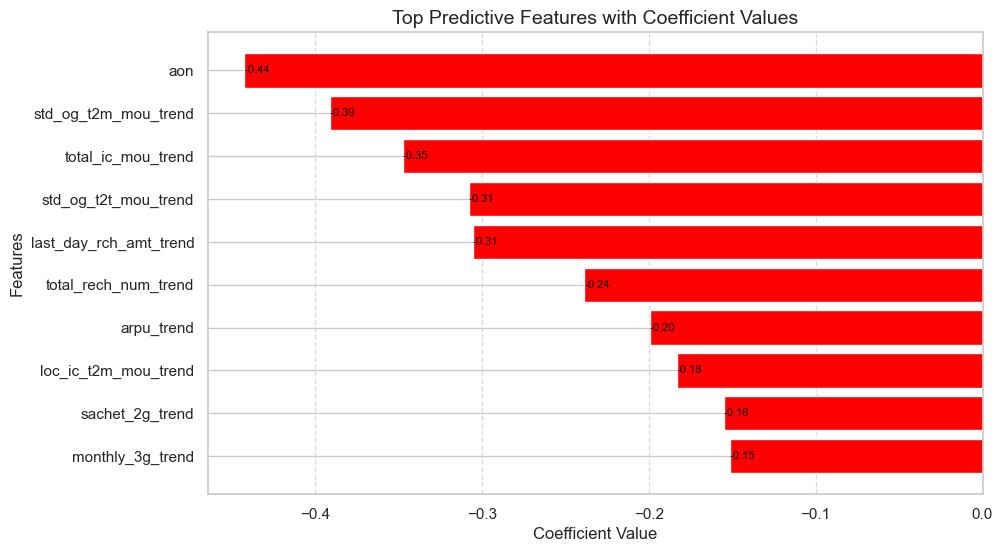

In [93]:
## Feture Selection Model
log_reg = LogisticRegression()

rfe = RFE(estimator=log_reg, n_features_to_select=10)
rfe.fit(X_train_balanced, y_train_balanced)

# Displaying the Selected Features
selected_Features = X.columns[rfe.support_]
print("Selected Features by RFE:")
print(selected_Features)

# Get selected features and their coefficients
selected_features = X.columns[rfe.support_]
coefs = rfe.estimator_.coef_.flatten()

# Creating a dataframe for visalization
feature_importance = pd.DataFrame({
    'Feature': selected_features,
    'Coefficient': coefs
})

# Sort by absolute value of coefficients for better visualization
feature_importance['Absolute_Coefficient'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values('Absolute_Coefficient', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
bars = plt.barh(feature_importance['Feature'], feature_importance['Coefficient'], 
                color=[('red' if x < 0 else 'green') for x in feature_importance['Coefficient']])

plt.xlabel('Coefficient Value', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('Top Predictive Features with Coefficient Values', fontsize=14)
plt.gca().invert_yaxis()  # Show highest coefficient at top
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Add coefficient values on the bars
for bar in bars:
    width = bar.get_width()
    label_text = f'{width:.2f}'
    plt.text(width, bar.get_y() + bar.get_height()/2, label_text, 
             va='center', ha=('left' if width < 0 else 'right'), 
             color='black', fontsize=8)

plt.show()

## **Key Observation:**

1. **Strongest Negative Predictors (Churn Risk Indicators):**
    - `aon`(-0.44): Customers with a longer "Age on Network" are less likely to churn. High loyalty is often associated with longer tenure.
    - `std_og_t2m_mou trend`(-0.39): A decline in standard outgoing calls to mobile numbers is associated with a higher churn probability.
    - `last_day_rch_amt_trend`(-0.31): A decline in the last recharge amount suggests that customers are not recharging as frequently, which is a strong churn signal.
    - `std_og_t2t_mou _trend`(-0.31):A decreasing trend in standard outgoing calls to the same network (T2T) indicates customers reducing engagement, leading to churn.
    - `total_ic_mou_trend`(-0.35):A drop in total incoming call minutes suggests disengagement and could be a precursor to churn.
    - `total_rech_num_trend`(-0.24): Fewer recharge transactions over time indicate reduced commitment to the service.
    - `arpu_trend`(-0.20):A drop in Average Revenue Per User (ARPU) over time signifies a decrease in customer spending, likely due to switching plans or reducing usage.
    - `loc_ic_t2m_mou_trend` (-0.18): Local incoming call trends to mobile numbers have a weaker but notable relationship with churn.
    - `sachet_2g_trend` (-0.16): A decline in sachet (short-term) 2G data pack usage suggests customers are either shifting to other providers or upgrading.
    - `monthly_3g_trend` (-0.15): A decreasing trend in monthly 3G data consumption may indicate customers are moving to competitors with better data plans.

## **Churn prediction**

In [94]:
## Creating a function that will evaluate model 

def evaluate_model(true, predicted):
    acc_score = accuracy_score(true, predicted)
    classification = classification_report(true, predicted)
    confusion = confusion_matrix(true, predicted)
    return acc_score, classification, confusion

In [95]:
X_train_selected = X_train_balanced#[selected_Features]
X_test_selected = X_test_scaled_df#[selected_Features]


In [96]:
# Utilising different models to see their base scores.
models = {
    'Decision Tree Classifier': DecisionTreeClassifier(),
    'Random Forest Classifier': RandomForestClassifier(),
    'Gradient Classifier': GradientBoostingClassifier(),
    'XGB Classifier': XGBClassifier(),
    

}

model_list = []
acc_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train_selected, y_train_balanced) # Train Model

    # Make Predictions
    y_train_pred = model.predict(X_train_selected)
    y_test_pred = model.predict(X_test_selected)

    #Evaluate Train and Test Dataset (evaluating with both train and test dependent variables are important to check if the model is overfitting or not.)
    model_train_acc_score, model_train_classification, model_train_confusion = evaluate_model(y_train_balanced, y_train_pred)

    model_test_acc_score, model_test_classification, model_test_confusion = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    

    print("Model Performance for Training Set")
    print(f'- Accuracy score: {model_train_acc_score}')
    print(f'- Classification Report: {model_train_classification}')
    print(f'- Confusion matrix: {model_train_confusion}')

    print('------------------------------------------------------------------------')

    print("Model Performance for Testing Set")
    print(f'- Accuracy score: {model_test_acc_score}')
    print(f'- Classification Report: {model_test_classification}')
    print(f'- Confusion Matrix: {model_test_confusion}')

    acc_list.append(model_test_acc_score)

    print('='*50)
    print('\n')

Decision Tree Classifier
Model Performance for Training Set
- Accuracy score: 1.0
- Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00     11280
           1       1.00      1.00      1.00     11280

    accuracy                           1.00     22560
   macro avg       1.00      1.00      1.00     22560
weighted avg       1.00      1.00      1.00     22560

- Confusion matrix: [[11280     0]
 [    0 11280]]
------------------------------------------------------------------------
Model Performance for Testing Set
- Accuracy score: 0.854954204829309
- Classification Report:               precision    recall  f1-score   support

           0       0.97      0.87      0.92      5611
           1       0.25      0.61      0.35       394

    accuracy                           0.85      6005
   macro avg       0.61      0.74      0.64      6005
weighted avg       0.92      0.85      0.88      6005

- Confusion Matrix: 

## **Insights:**

**`Best Model`:** Gradient Boost (Base) model performs well not at all overfitting issue and a descent recall score.

**`Hyperparameter Tuning`:** Lets Tune the rest of the models to again see who performs better and will be comparing with Gradient Boosting.

In this report we cannot depend solely on the accuracy score(accuracy paradox) because the data is very imabalanced accuracy alone isnt sufficient.

- things to focus on:
    - `Recall:` Especially for the churn class
    - `Precision Recall curve:` To visualize performance for imbalanced data
    - `ROC-AUC:` A better metric for classification models in such cases

In [97]:
## hyperparameter Modeling
# Model Hyperparameter Grids
param_grids = {
    'Decision Tree Classifier': {
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10],  
      
},
    'Random Forest Classifier': {
    'n_estimators': [100,250,300],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 4, 8],
    'max_features': ['sqrt', 'log2']
    
},
    'XGB Classifier': {
    'n_estimators': [50, 100, 200,300],
    'learning_rate': [0.001],
    'max_depth': [3, 5, 7],
    'min_child_weight':[1,2,3,4,5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'scale_pos_weight': [1, 5, 10],
    'objective': ['reg:logistic','binary:logistic','binary:logitraw'],  
    'gamma': [0, 0.1, 0.5]  
}
}

models = {
    'Decision Tree Classifier': DecisionTreeClassifier(),
    'Random Forest Classifier': RandomForestClassifier(),
    'XGB Classifier': XGBClassifier()
}



In [98]:
# Function to Evaluate Models
def evaluate_model(y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    report = classification_report(y_true, y_pred)
    cm = confusion_matrix(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred)
    return acc, report, cm, roc_auc

Training Decision Tree Classifier...
Best Parameters for Decision Tree Classifier: {'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': None}
Decision Tree Classifier - Training Accuracy: 0.99197695035461, ROC-AUC: 0.99197695035461
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     11280
           1       1.00      0.99      0.99     11280

    accuracy                           0.99     22560
   macro avg       0.99      0.99      0.99     22560
weighted avg       0.99      0.99      0.99     22560

Confusion Matrix:
[[11228    52]
 [  129 11151]]
Decision Tree Classifier - Testing Accuracy: 0.855120732722731, ROC-AUC: 0.738405434575123
              precision    recall  f1-score   support

           0       0.97      0.87      0.92      5611
           1       0.25      0.60      0.35       394

    accuracy                           0.86      6005
   macro avg       0.61      0.74      0.64      6005
weighted avg       0.

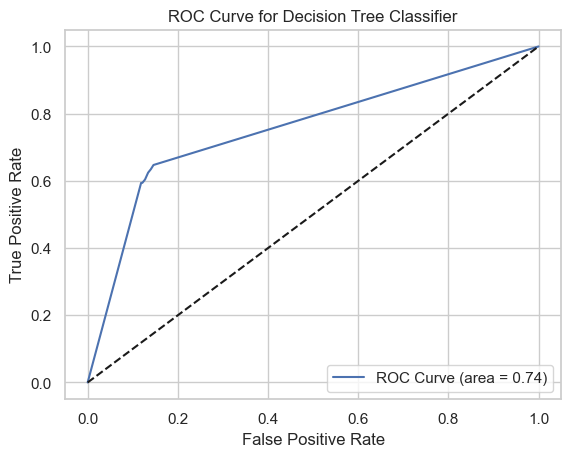

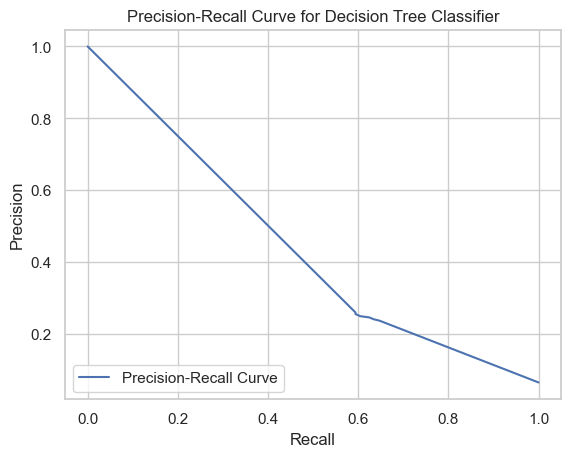

Training Random Forest Classifier...
Best Parameters for Random Forest Classifier: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None}
Random Forest Classifier - Training Accuracy: 1.0, ROC-AUC: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11280
           1       1.00      1.00      1.00     11280

    accuracy                           1.00     22560
   macro avg       1.00      1.00      1.00     22560
weighted avg       1.00      1.00      1.00     22560

Confusion Matrix:
[[11280     0]
 [    0 11280]]
Random Forest Classifier - Testing Accuracy: 0.9233971690258118, ROC-AUC: 0.8115184820968964
              precision    recall  f1-score   support

           0       0.98      0.94      0.96      5611
           1       0.45      0.68      0.54       394

    accuracy                           0.92      6005
   macro avg       0.71      0.81      0.75      6005


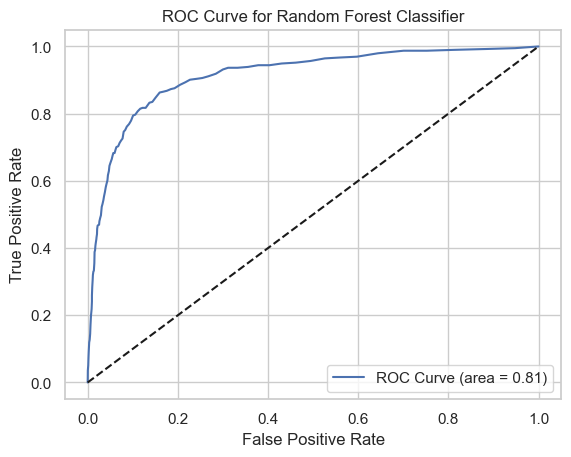

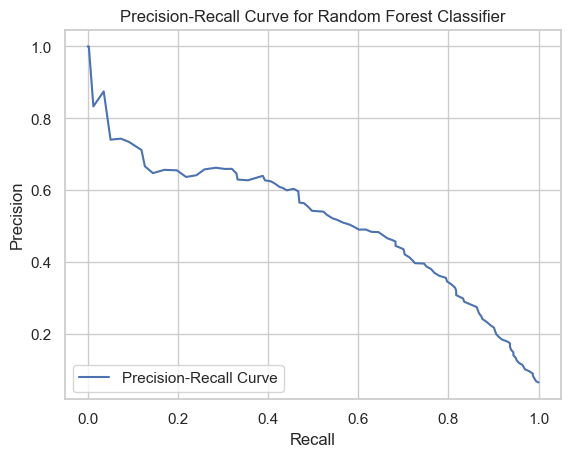

Training XGB Classifier...
Best Parameters for XGB Classifier: {'subsample': 0.8, 'scale_pos_weight': 1, 'objective': 'reg:logistic', 'n_estimators': 100, 'min_child_weight': 2, 'max_depth': 7, 'learning_rate': 0.001, 'gamma': 0, 'colsample_bytree': 1.0}
XGB Classifier - Training Accuracy: 0.8843528368794327, ROC-AUC: 0.8843528368794327
              precision    recall  f1-score   support

           0       0.90      0.87      0.88     11280
           1       0.87      0.90      0.89     11280

    accuracy                           0.88     22560
   macro avg       0.88      0.88      0.88     22560
weighted avg       0.88      0.88      0.88     22560

Confusion Matrix:
[[ 9783  1497]
 [ 1112 10168]]
XGB Classifier - Testing Accuracy: 0.8474604496253122, ROC-AUC: 0.8322401066795011
              precision    recall  f1-score   support

           0       0.98      0.85      0.91      5611
           1       0.28      0.81      0.41       394

    accuracy                          

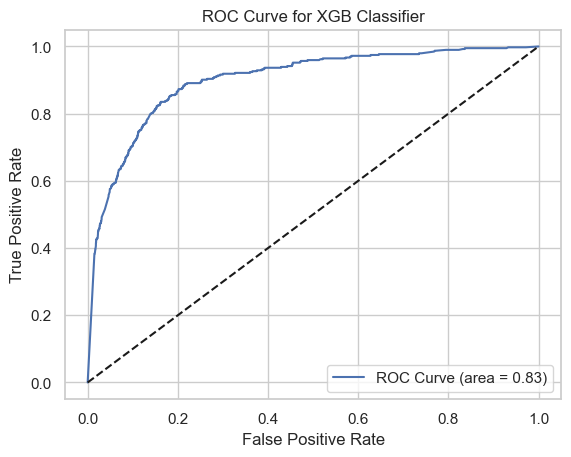

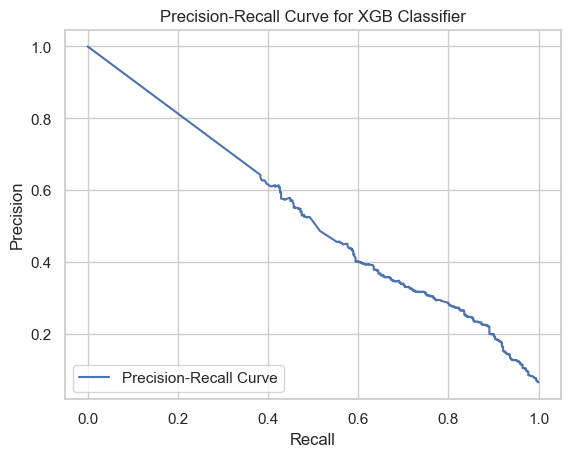

In [99]:

# Hyperparameter Tuning with RandomizedSearchCV
# Dictionary to store precision and recall scores
for name, model in models.items():
    print(f"Training {name}...")
    randomCV = RandomizedSearchCV(estimator=model, param_distributions=param_grids[name], cv=StratifiedKFold(5), scoring='balanced_accuracy', n_jobs=-1)
    randomCV.fit(X_train_selected, y_train_balanced)

    best_model = randomCV.best_estimator_
    print(f"Best Parameters for {name}: {randomCV.best_params_}")

    # Predictions
    y_train_pred = best_model.predict(X_train_selected)
    y_test_pred = best_model.predict(X_test_selected)

    # Evaluation
    train_acc, train_report, train_cm, train_roc_auc = evaluate_model(y_train_balanced, y_train_pred)
    test_acc, test_report, test_cm, test_roc_auc = evaluate_model(y_test, y_test_pred)

    # Display Results
    print(f"{name} - Training Accuracy: {train_acc}, ROC-AUC: {train_roc_auc}")
    print(train_report)
    print(f"Confusion Matrix:\n{train_cm}")

    print(f"{name} - Testing Accuracy: {test_acc}, ROC-AUC: {test_roc_auc}")
    print(test_report)
    print(f"Confusion Matrix:\n{test_cm}")

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, best_model.predict_proba(X_test_selected)[:, 1])
    plt.figure()
    plt.plot(fpr, tpr, label=f'ROC Curve (area = {test_roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {name}')
    plt.legend(loc='lower right')
    plt.show()

    # Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(y_test, best_model.predict_proba(X_test_selected)[:, 1])
    plt.figure()
    plt.plot(recall, precision, label='Precision-Recall Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve for {name}')
    plt.legend(loc='lower left')
    plt.show()

    print("="*50)

## **Comparing Model**

In [100]:
# Function to evaluate model
def evaluate_model(y_true, y_pred):
    report = classification_report(y_true, y_pred, output_dict=True)
    precision = report["1"]["precision"]
    recall = report["1"]["recall"]
    f1 = report["1"]["f1-score"]
    accuracy = report["accuracy"]
    cm = confusion_matrix(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred)
    
    return accuracy, precision, recall, f1, cm, roc_auc

Gradient Boosting model Train-Test Accuracy
Train score:0.9075797872340425
Test score:0.8847626977518734
XG Boosting model Train-Test Accuracy
Train score: 0.9050975177304964
Test score: 0.869608659450458


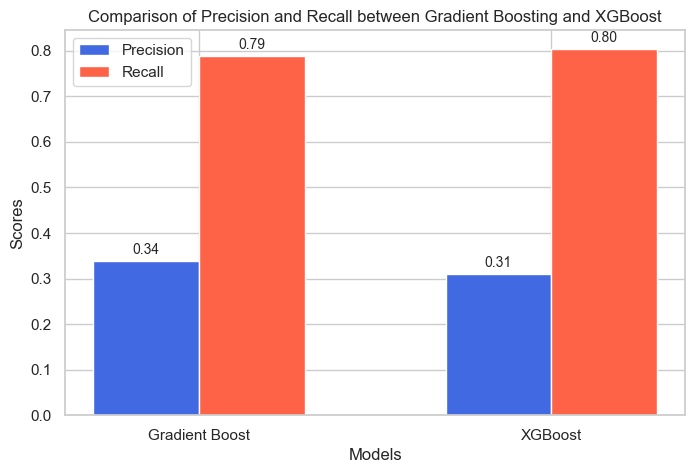

In [101]:
# Train Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(learning_rate=0.008, n_estimators=800, max_depth=4,min_samples_split=3)
gb_model.fit(X_train_selected, y_train_balanced)
y_train_gb_pred = gb_model.predict(X_train_selected)
y_test_gb_pred = gb_model.predict(X_test_selected)

train_acc_gb, train_prec_gb, train_rec_gb, train_f1_gb, train_cm_gb, train_roc_gb = evaluate_model(y_train_balanced, y_train_gb_pred)
test_acc_gb, test_prec_gb, test_rec_gb, test_f1_gb, test_cm_gb, test_roc_gb = evaluate_model(y_test, y_test_gb_pred)

# Train XGBoost Classifier
xgb_model = XGBClassifier(subsample= 1.0, scale_pos_weight= 1, objective= 'reg:logistic', n_estimators=50, min_child_weight=4, max_depth=7, learning_rate= 0.03, gamma=0, colsample_bytree=0.8)
xgb_model.fit(X_train_selected, y_train_balanced)
y_train_xgb_pred = xgb_model.predict(X_train_selected)
y_test_xgb_pred = xgb_model.predict(X_test_selected)

train_acc_xgb, train_prec_xgb, train_rec_xgb, train_f1_xgb, train_cm_xgb, train_roc_xgb = evaluate_model(y_train_balanced, y_train_xgb_pred)
test_acc_xgb, test_prec_xgb, test_rec_xgb, test_f1_xgb, test_cm_xgb, test_roc_xgb = evaluate_model(y_test, y_test_xgb_pred)

# Plot Precision and Recall Comparison
models = ['Gradient Boost', 'XGBoost']
precision_scores = [test_prec_gb, test_prec_xgb]
recall_scores = [test_rec_gb, test_rec_xgb]

print(f"Gradient Boosting model Train-Test Accuracy")
print(f"Train score:{train_acc_gb}")
print(f"Test score:{test_acc_gb}")

print(f"XG Boosting model Train-Test Accuracy")
print(f"Train score: {train_acc_xgb}")
print(f"Test score: {test_acc_xgb}")


x = np.arange(len(models))
width = 0.3  # Bar width

fig, ax = plt.subplots(figsize=(8, 5))
bars1 = ax.bar(x - width/2, precision_scores, width, label='Precision', color='royalblue')
bars2 = ax.bar(x + width/2, recall_scores, width, label='Recall', color='tomato')

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Precision and Recall between Gradient Boosting and XGBoost')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Display values on top of bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}', 
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=10)

plt.show()

## **Insights from the Comparison**
- **Accuracy:** Both models have similar accuracy, but Gradient Boosting shows a slightly better test accuracy.
- **Precision:** Gradient Boosting has slightly better precision than XGBoost.
- **Recall:** XGBoost model has a better recall score (0.80), indicating a better performance in identifying positive cases.

### **Insights:**
- Choosing **XG Boost Classifier** because missing churn cases is very costly (high recall).

## **Selecting Model**

In [102]:
selected_model = XGBClassifier(subsample= 1.0, scale_pos_weight= 1, objective= 'reg:logistic', n_estimators=50, min_child_weight=4, max_depth=7, learning_rate= 0.03, gamma=0, colsample_bytree=0.8)
selected_model.fit(X_train_selected, y_train_balanced)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.03, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=4, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, objective='reg:logistic', ...)

In [103]:
## Finally Saving the Model

with open('../model/XGboost.pkl', 'wb') as file:
    pickle.dump(selected_model, file)

## **Conclusion of the Analysis**

### **Analysis Insights:**

- Based on the analysis, customer churn can be predicted through three distinct phases:

  1. **Good Phase (Golden Phase):**
     - No signs of churn activity.
     - High internet data usage, frequent calls, and regular recharges.
     - Indicates customer satisfaction and loyalty, as people are happy with the plans.

  2. **Action Phase:**
     - Early signs of dissatisfaction begin to emerge.
     - Decrease in data usage, fewer phone calls, reduced recharge amounts.
     - Customers may explore cheaper plans or consider switching providers.

  3. **Churn Phase:**
     - Final stage where the customer decides to discontinue the service.
     - Significant drop in activity, minimal usage, and no recharges.

- In our dataset, it was evident that both churned and non-churned customers showed active usage during **June** and **July** (Good Phase). However, in the **Action Phase**, churned customers exhibited a noticeable decrease in activity, while non-churners maintained stable and consistent usage, reflecting customer loyalty.

- **Age on Network (AON)** emerged as a critical feature in predicting churn. Customers who have been on the network for **2 to 3 years** are less likely to churn, indicating a strong correlation between network tenure and loyalty.

---

## **Strategies to Reduce Customer Churn:**

1. **Enhance Customer Engagement:**
   - Regularly interact with customers through personalized offers, loyalty programs, and rewards.
   - Identify customers showing early signs of reduced activity (Action Phase) and proactively engage them.

2. **Targeted Retention Campaigns:**
   - Focus on customers with decreasing trends in **outgoing calls** and **standard incoming calls** as these are strong churn predictors.
   - Offer customized plans to meet their evolving needs.

3. **Improve Service for High-Risk Segments:**
   - For customers with increasing **outgoing and incoming minutes**, address potential service issues related to network performance.
   - Provide better support and cost-effective roam plans.

4. **Incentivize Long-Term Commitment:**
   - Introduce retention programs targeting customers with shorter **Age on Network**.
   - Offer discounts or benefits for contract renewals to foster long-term relationships.

5. **Monitor Usage Trends:**
   - Continuously analyze trends in features like **ARPU (Average Revenue Per User)**, **total recharge amount**, and **call patterns**.
   - Detect sudden drops in usage to identify at-risk customers early.

6. **Optimize Pricing Strategies:**
   - Ensure competitive pricing for high-usage customers.
   - Offer flexible plans that adapt to changing customer behavior, especially during the Action Phase.

By implementing these strategies, businesses can proactively reduce churn rates, enhance customer satisfaction, and build long-term loyalty.

